<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных,-проверка-пропусков-и-типов-данных" data-toc-modified-id="Импорт-данных,-проверка-пропусков-и-типов-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных, проверка пропусков и типов данных</a></span></li><li><span><a href="#Рачет-эффективности-обогащения" data-toc-modified-id="Рачет-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Рачет эффективности обогащения</a></span></li><li><span><a href="#Признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Признаки, недоступные в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентраций-металлов-на-разных-степенях-очистки" data-toc-modified-id="Изменение-концентраций-металлов-на-разных-степенях-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентраций металлов на разных степенях очистки</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Суммарная-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах." data-toc-modified-id="Суммарная-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Проверка-константной-модели" data-toc-modified-id="Проверка-константной-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка константной модели</a></span></li><li><span><a href="#Проверка-на-тестовых-данных" data-toc-modified-id="Проверка-на-тестовых-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка на тестовых данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Эффективность обогащения рассчитывается по формуле:

<div>
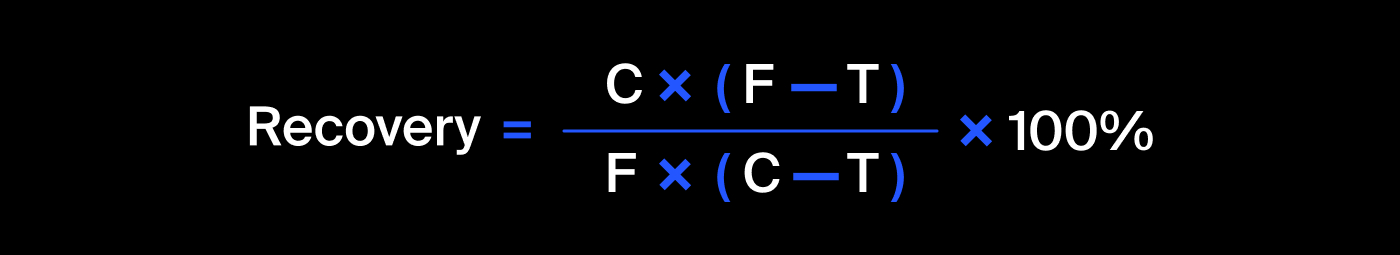
</div>

где:
C — доля золота в концентрате после флотации/очистки;
F — доля золота в сырье/концентрате до флотации/очистки;
T — доля золота в отвальных хвостах после флотации/очистки.

Метрика качества для решения задачи — sMAPE (англ. Symmetric Mean Absolute Percentage Error, «симметричное среднее абсолютное процентное отклонение»):

<div>
    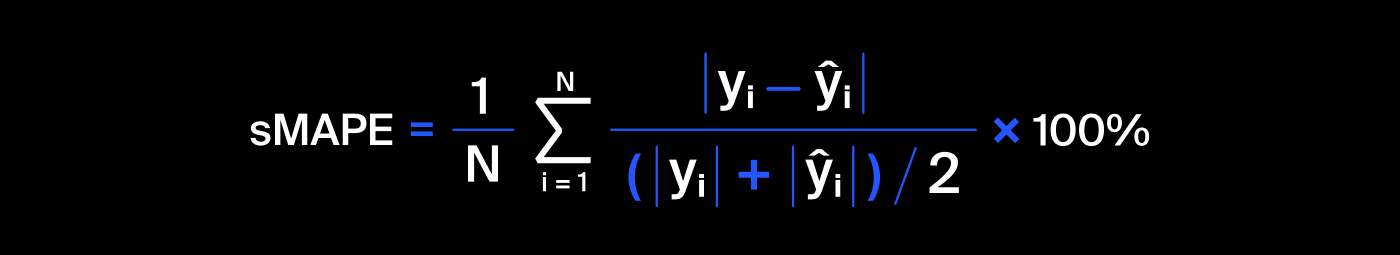
</div>

Нужно спрогнозировать две величины:
    - эффективность обогащения чернового концентрата 'rougher.output.recovery';
    - эффективность обогащения финального концентрата 'final.output.recovery'.
Итоговая метрика складывается из двух величин:

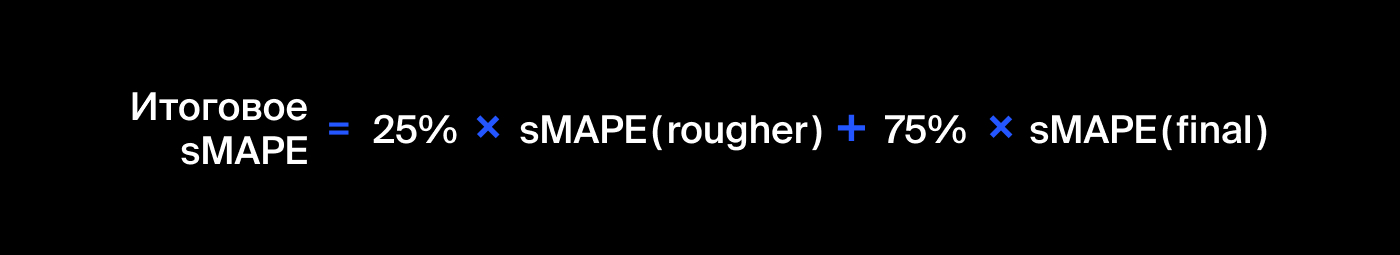

## Подготовка данных

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import time

import scipy.stats as stats

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error

from catboost import CatBoostRegressor

### Импорт данных, проверка пропусков и типов данных

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# df_full = pd.read_csv('datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
# df_train = pd.read_csv('datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
# df_test = pd.read_csv('datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)

In [6]:
display(df_full.head())
df_full.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                     

In [7]:
df_full.describe().loc[['count', 'mean', '50%', 'min', 'max'],:]

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,19402.000000,19439.000000,19335.000000,19439.000000,19323.000000,19069.000000,19439.000000,19435.000000,19418.000000,19377.000000,19439.000000,1.943500e+04,19438.000000,1.943500e+04,19438.000000,1.943700e+04,19438.000000,1.943600e+04,19438.000000,1.943700e+04,19437.000000,19437.000000,19439.000000,19439.000000,19339.000000,19428.000000,19294.000000,19340.000000,19439.000000,19405.000000,19431.000000,19395.000000,18986.000000,19439.000000,19439.000000,19416.000000,19439.000000,19439.000000,19438.000000,19439.000000,19439.000000,19439.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19439.000000,19439.000000,19003.000000,19439.000000,19439.000000,19439.000000,19437.000000,19427.000000,17691.000000,19439.000000,19219.000000,19438.000000,19416.000000,19438.000000,19426.000000,19438.000000,19438.000000,19438.000000,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438

In [8]:
display(df_train.head())
display(df_train.describe().loc[['count', 'mean', '50%', 'min', 'max'],:])
df_train.info()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,14117.000000,14149.00000,14049.000000,14149.000000,14063.000000,13863.000000,14149.000000,14148.000000,14134.000000,14103.000000,14149.000000,14145.000000,14148.000000,14145.000000,14148.000000,14147.000000,14148.000000,14146.000000,14148.000000,1.414800e+04,14148.000000,14148.000000,14149.000000,14149.000000,14049.000000,14141.000000,14005.000000,14071.000000,14149.000000,14120.000000,14141.000000,14113.000000,13721.000000,14149.000000,14149.000000,14127.000000,14149.000000,14149.000000,14148.000000,14149.000000,14149.000000,14149.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14149.000000,14149.000000,13713.000000,14149.000000,14149.000000,14149.000000,14147.000000,14139.000000,12544.000000,14149.000000,13932.000000,14148.000000,14128.000000,14148.000000,14145.000000,14148.000000,14148.000000,14148.000000,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                     

In [9]:
#adding targets to the test dataset
df_test['rougher.output.recovery'] = df_full.loc[df_test.index, 'rougher.output.recovery']
df_test['final.output.recovery'] = df_full.loc[df_test.index, 'final.output.recovery']

In [10]:
#filling missing values with the previous values
df_train.fillna(method='ffill', inplace=True)
df_test.fillna(method='ffill', inplace=True)

### Рачет эффективности обогащения

In [11]:
C = df_train['rougher.output.concentrate_au'] 
F = df_train['rougher.input.feed_au'] 
T = df_train['rougher.output.tail_au'] 

df_train_check_recovery = pd.DataFrame(df_train['rougher.output.recovery'])
df_train_check_recovery['recovery_check'] = 100*C*(F-T)/F/(C-T) 

print('Mean absolute error:', mean_absolute_error(df_train_check_recovery['rougher.output.recovery'], df_train_check_recovery['recovery_check']))

Mean absolute error: 1.1766465170843896e-14


<b> Вывод: </b> Эффективность обогащения для стадии флотации рассчитана правильно.

### Признаки, недоступные в тестовой выборке

In [12]:
df_full.shape,  df_train.shape, df_test.shape 

((19439, 86), (14149, 86), (5290, 54))

In [13]:
#what columns are not included in the test dataset
print(df_train.shape[1] - df_test.shape[1], "features are missing in test dataframe:\n")
print('\n'.join(sorted(np.setdiff1d(df_train.columns, df_test.columns))))

32 features are missing in test dataframe:

final.output.concentrate_ag
final.output.concentrate_au
final.output.concentrate_pb
final.output.concentrate_sol
final.output.tail_ag
final.output.tail_au
final.output.tail_pb
final.output.tail_sol
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_au
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_au
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
rougher.calculation.au_pb_ratio
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.sulfate_to_au_concentrate
rougher.output.concentrate_ag
rougher.output.concentrate_au
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.tail_ag
rougher.output.tail_au
rougher.output.tail_pb
rougher.output.tail_sol
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_au
secondary_cleaner.ou

<b> Вывод: </b> В тестовой выборке не хватает информации о доле элементов в хвосте и концентрате после флотации, а также первичной и вторичной очисток. Кроме того нет величин, получаемых расчетом из вышеперечисленных (au_pb_ratio, recovery, количество необходимого сульфата)

## Анализ данных
### Изменение концентраций металлов на разных степенях очистки

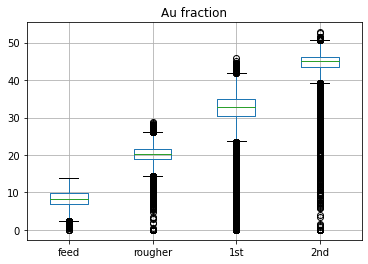

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


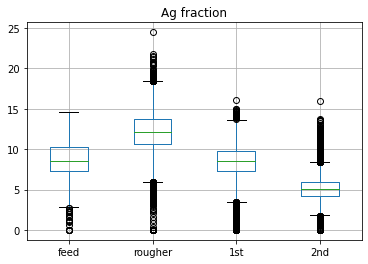

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


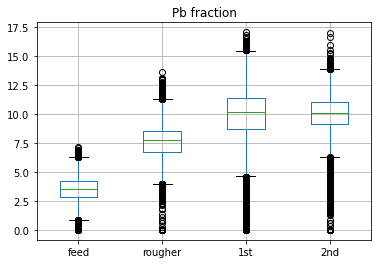

In [14]:
au_conc = ['rougher.input.feed_au'] + [col for col in df_full.columns if 'concentrate_au' in col][::-1]
df_full.boxplot(column=au_conc)
plt.title('Au fraction')
plt.xticks(ticks=[1, 2, 3, 4], labels=['feed', 'rougher', '1st', '2nd'])
plt.show()

ag_conc = ['rougher.input.feed_ag'] + [col for col in df_full.columns if 'concentrate_ag' in col][::-1]
df_full.boxplot(column=ag_conc)
plt.title('Ag fraction')
plt.xticks(ticks=[1, 2, 3], labels=['rougher', '1st', '2nd'])
plt.xticks(ticks=[1, 2, 3, 4], labels=['feed', 'rougher', '1st', '2nd'])
plt.show()

pb_conc = ['rougher.input.feed_pb'] + [col for col in df_full.columns if 'concentrate_pb' in col][::-1]
df_full.boxplot(column=pb_conc)
plt.title('Pb fraction')
plt.xticks(ticks=[1, 2, 3], labels=['rougher', '1st', '2nd'])
plt.xticks(ticks=[1, 2, 3, 4], labels=['feed', 'rougher', '1st', '2nd'])
plt.show()

<b> Вывод: </b> Концентрация золота увеличивается в 5 раз (в среднем с 8 до 45%). Концентрация серебра после флотации растет в 1.5 раза, а после дополнительных очисток падает до 5%. Доля свинца увеличивается в среднем с 3 до 10%.


### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках. 

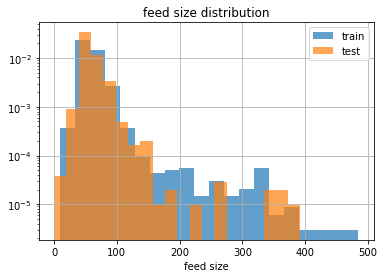

,train,test
count,14149.000000,5290.000000
mean,60.239856,55.952754
std,23.005310,19.080334
min,9.659576,0.046369
25%,48.966751,43.906504
50%,55.269784,50.846843
75%,66.007526,62.451165
max,484.967466,392.494040


In [15]:
df_train['rougher.input.feed_size'].hist(log=True, bins=20, density=True, alpha=.7)
df_test['rougher.input.feed_size'].hist(log=True, bins=20, density=True, alpha=.7)
plt.xlabel('feed size')
plt.title('feed size distribution')
plt.legend(['train', 'test'])
plt.show()

df_to_compare = pd.concat([df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']], axis=1, keys=['train', 'test'])
df_to_compare.describe()

In [16]:
#statistical check if the averages differ

alpha = .05 #  задайте критический уровень статистической значимости

result = stats.ttest_ind(df_train['rougher.input.feed_size'].dropna(), df_test['rougher.input.feed_size'].dropna())
print('Нулевая гипотеза: средние равны \np-значение:', result.pvalue) 

if  result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нулевая гипотеза: средние равны 
p-значение: 1.6081245670851188e-33
Отвергаем нулевую гипотезу


<b> Вывод: </b> Cредние значения гранул для тренировочной и тестовой выборок отличаются. Однако отличие составляет не более 10%,  распределения похожи, можно использовать для дальнейших вычислений. 

### Суммарная концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [17]:
df_full['feed_sum'] = df_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 
                                 'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)
df_full['rougher_sum'] = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 
                                    'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)
df_full['primary_cleaner_sum'] = df_full[['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                                            'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au']].sum(axis=1)
df_full['final_sum'] = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol',
                                  'final.output.concentrate_au']].sum(axis=1)

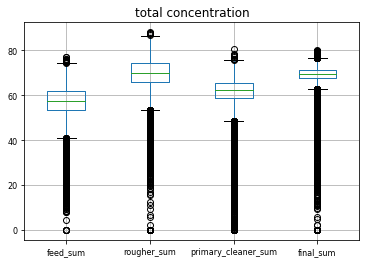

In [18]:
df_full[['feed_sum', 'rougher_sum', 'primary_cleaner_sum', 'final_sum']].boxplot(fontsize=8)
plt.title('total concentration')
plt.show()

In [19]:
#how many sum concetrations are zeroes 
((df_full['feed_sum']==0).sum(), 
(df_full['rougher_sum']==0).sum(),
(df_full['primary_cleaner_sum']==0).sum(),
(df_full['final_sum']==0).sum())

(0, 394, 108, 98)

In [20]:
#saving indices to delete
rougher_to_delete = df_full[df_full['rougher_sum']==0].index
primary_cleaner_to_delete = df_full[df_full['primary_cleaner_sum']==0].index
final_to_delete = df_full[df_full['final_sum']==0].index

indices_to_delete = rougher_to_delete.union(primary_cleaner_to_delete)
indices_to_delete = indices_to_delete.union(final_to_delete)

In [21]:
#deleting those rows
df_full.drop(index=indices_to_delete, inplace=True)
df_train.drop(index=indices_to_delete, inplace=True, errors='ignore')
df_test.drop(index=indices_to_delete, inplace=True, errors='ignore')

In [22]:
#check that there are no 0 concetrations 
((df_full['feed_sum']==0).sum(), 
(df_full['rougher_sum']==0).sum(),
(df_full['primary_cleaner_sum']==0).sum(),
(df_full['final_sum']==0).sum())

(0, 0, 0, 0)

<b> Вывод: </b> Просуммировали концентрации всех веществ на каждом этапе. Из тренировочного и тестового датасетов удалили строки, где суммарная концентрация веществ равна 0, так как эти породы не содержат золота и анализировать их не имеет смысла.

0.06369449425407338

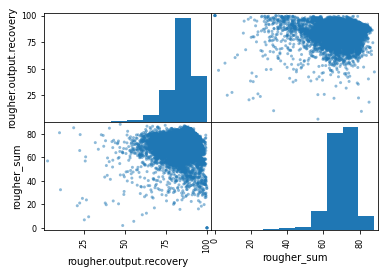

In [23]:
pd.plotting.scatter_matrix(df_full[['rougher.output.recovery','rougher_sum']])
df_full['rougher.output.recovery'].corr(df_full['rougher_sum'])

In [24]:
df_full[['feed_sum', 'rougher_sum', 'primary_cleaner_sum', 'final_sum']].corr()

,feed_sum,rougher_sum,primary_cleaner_sum,final_sum
feed_sum,1.000000,0.321008,0.310726,0.345490
rougher_sum,0.321008,1.000000,0.209554,0.340562
primary_cleaner_sum,0.310726,0.209554,1.000000,0.236874
final_sum,0.345490,0.340562,0.236874,1.000000


correlation coefficient for rougher recovery:
feed_sum: 0.5352532889515847


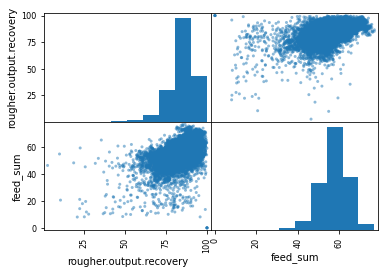

correlation coefficients for final recovery:
feed_sum: 0.38886958859593374
rougher_sum: 0.06795199354500926
primary_cleaner_sum: 0.12391688932744632
final_sum: 0.12428330464919828


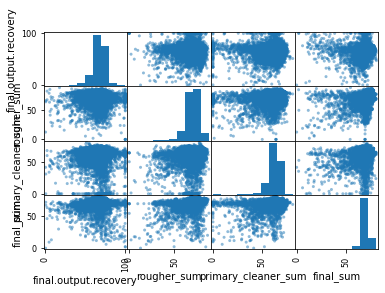

In [25]:
print('correlation coefficient for rougher recovery:')
print('feed_sum:', df_full['rougher.output.recovery'].corr(df_full['feed_sum']))
pd.plotting.scatter_matrix(df_full[['rougher.output.recovery', 'feed_sum']])
plt.show()

print('correlation coefficients for final recovery:')
print('feed_sum:', df_full['final.output.recovery'].corr(df_full['feed_sum']))
print('rougher_sum:', df_full['final.output.recovery'].corr(df_full['rougher_sum']))
print('primary_cleaner_sum:', df_full['final.output.recovery'].corr(df_full['primary_cleaner_sum']))
print('final_sum:', df_full['final.output.recovery'].corr(df_full['final_sum']))
pd.plotting.scatter_matrix(df_full[['final.output.recovery', 'rougher_sum', 'primary_cleaner_sum', 'final_sum']])
plt.show()

<b> Вывод: </b> Наблюдается корреляция между суммарной концентрацией веществ и эффективностью для стадии флотации (0.53), а также более слабая корелляция между суммарной концентрацией после всех стадий очиски и соответствующей эффективностью.

## Модель

Функция для вычисления итоговой sMAPE:

In [26]:
def sMAPE(rough_target, rough_predicitons, **kwargs):
    rough_target = rough_target.values
    a = np.mean([abs(a - b) / (abs(a) + abs(b)) * 2 for (a,b) in zip(rough_target, rough_predicitons)]) * 100
    return a

my_scorer = make_scorer(sMAPE, greater_is_better=False)

Обучаем модель <b> линенйной регрессии</b> 

In [27]:
#choosing targets and features
features_columns = np.setdiff1d(df_test.columns, ['rougher.output.recovery', 'final.output.recovery'])

X_train = df_train[features_columns] 
y_train = df_train[['rougher.output.recovery', 'final.output.recovery']]
model = LinearRegression()

model.fit(X_train, y_train['rougher.output.recovery'])
rougher = -cross_val_score(model, X_train, y_train['rougher.output.recovery'], cv=5, scoring=my_scorer).mean()

model.fit(X_train, y_train['final.output.recovery'])
final = -cross_val_score(model, X_train, y_train['final.output.recovery'], cv=5, scoring=my_scorer).mean()

smape_total = 0.25 * rougher + 0.75 * final
print("\nВзвешенное качество модели: {:.2f}".format(smape_total))


Взвешенное качество модели: 10.03


Расматриваем качество для моделей <b>  решающего дерева</b> , меняем гиперпараметры

In [47]:
params = {'max_depth': list(range(1, 21, 1))}
regressor  = DecisionTreeRegressor(random_state=123)
model = GridSearchCV(regressor, params, scoring=my_scorer, n_jobs=4, cv=5)

model.fit(X_train, y_train['rougher.output.recovery'])
rougher = -model.best_score_
print("Обучение модели для rougher\nЛучшее качество: {:.2f} при глубине дерева {}"
      .format(rougher, model.best_params_.get('max_depth')))

model.fit(X_train, y_train['final.output.recovery'])
final = -model.best_score_
print("Обучение модели для final\nЛучшее качество: {:.2f} при глубине дерева {}"
      .format(final, model.best_params_.get('max_depth')))

smape_total = 0.25 * rougher + 0.75 * final
print("\nВзвешенное качество модели: {:.2f}".format(smape_total))

Обучение модели для rougher
Лучшее качество: 7.31 при глубине дерева 4
Обучение модели для final
Лучшее качество: 9.44 при глубине дерева 3

Взвешенное качество модели: 8.91


Расматриваем качество для моделей <b> случайного леса</b> , меняем гиперпараметры

In [38]:
%%time
params = {'n_estimators': range(1, 102, 10), 'max_depth': list(range(1, 21, 1))}
regressor  = RandomForestRegressor(random_state=123)
model = GridSearchCV(regressor, params, scoring=my_scorer, n_jobs=7, cv=5)

model.fit(X_train, y_train['rougher.output.recovery'])
rougher = -model.best_score_
print("Обучение модели для rougher\nЛучшее качество: {:.2f} при {} деревьев и  глубине дерева {}"
      .format(rougher, model.best_params_.get('n_estimators'), model.best_params_.get('max_depth')))

model.fit(X_train, y_train['final.output.recovery'])
final = -model.best_score_
print("Обучение модели для final\nЛучшее качество: {:.2f} при {} деревьев и глубине дерева {}"
      .format(final, model.best_params_.get('n_estimators'), model.best_params_.get('max_depth')))

smape_total = 0.25 * rougher + 0.75 * final
print("\nВзвешенное качество модели: {:.2f}".format(smape_total))

Обучение модели для rougher
Лучшее качество: 6.50 при 1 деревьев и  глубине дерева 3
Обучение модели для final
Лучшее качество: 9.01 при 21 деревьев и глубине дерева 4

Взвешенное качество модели: 8.38
Wall time: 1h 25min 56s


Расматриваем качество для моделей <b>catboost </b> с разными гипепараметрами

In [32]:
%%time

grid = {'max_depth': range(6)}

regressor  = CatBoostRegressor(random_state=123)
grid_search_result = regressor.grid_search(grid, X=X_train, y=y_train['rougher.output.recovery'], plot=False)
best_depth_rouher = grid_search_result['params']['depth']
regressor  = CatBoostRegressor(random_state=123, max_depth=best_depth_rouher)
regressor.fit(X_train, y_train['rougher.output.recovery'])
rougher = sMAPE(y_train['rougher.output.recovery'], regressor.predict(X_train))

regressor  = CatBoostRegressor(random_state=123)
grid_search_result = regressor.grid_search(grid, X=X_train, y=y_train['final.output.recovery'], plot=False)
best_depth_final = grid_search_result['params']['depth']
regressor  = CatBoostRegressor(random_state=123, max_depth=best_depth_final)
regressor.fit(X_train, y_train['final.output.recovery'])
final = sMAPE(y_train['final.output.recovery'], regressor.predict(X_train))

0:	learn: 82.3566632	test: 82.3785914	best: 82.3785914 (0)	total: 1.46ms	remaining: 1.46s
1:	learn: 79.9103563	test: 79.9317127	best: 79.9317127 (1)	total: 3.2ms	remaining: 1.6s
2:	learn: 77.5381444	test: 77.5589114	best: 77.5589114 (2)	total: 5.15ms	remaining: 1.71s
3:	learn: 75.2378271	test: 75.2579866	best: 75.2579866 (3)	total: 6.69ms	remaining: 1.67s
4:	learn: 73.0072703	test: 73.0268038	best: 73.0268038 (4)	total: 7.99ms	remaining: 1.59s
5:	learn: 70.8444049	test: 70.8632933	best: 70.8632933 (5)	total: 9.13ms	remaining: 1.51s
6:	learn: 68.7472242	test: 68.7654478	best: 68.7654478 (6)	total: 10.2ms	remaining: 1.45s
7:	learn: 66.7137824	test: 66.7313211	best: 66.7313211 (7)	total: 11.8ms	remaining: 1.46s
8:	learn: 64.7421928	test: 64.7590258	best: 64.7590258 (8)	total: 13.1ms	remaining: 1.45s
9:	learn: 62.8306259	test: 62.8467318	best: 62.8467318 (9)	total: 14.4ms	remaining: 1.43s
10:	learn: 60.9773078	test: 60.9926645	best: 60.9926645 (10)	total: 15.7ms	remaining: 1.41s
11:	learn:

107:	learn: 8.6071529	test: 8.4453942	best: 8.4453942 (107)	total: 157ms	remaining: 1.3s
108:	learn: 8.5729824	test: 8.4101122	best: 8.4101122 (108)	total: 159ms	remaining: 1.3s
109:	learn: 8.5407061	test: 8.3767659	best: 8.3767659 (109)	total: 160ms	remaining: 1.29s
110:	learn: 8.5102249	test: 8.3452553	best: 8.3452553 (110)	total: 161ms	remaining: 1.29s
111:	learn: 8.4814447	test: 8.3154848	best: 8.3154848 (111)	total: 163ms	remaining: 1.29s
112:	learn: 8.4542755	test: 8.2873634	best: 8.2873634 (112)	total: 164ms	remaining: 1.29s
113:	learn: 8.4286316	test: 8.2608042	best: 8.2608042 (113)	total: 166ms	remaining: 1.29s
114:	learn: 8.4044314	test: 8.2357244	best: 8.2357244 (114)	total: 167ms	remaining: 1.29s
115:	learn: 8.3815972	test: 8.2120452	best: 8.2120452 (115)	total: 169ms	remaining: 1.28s
116:	learn: 8.3600552	test: 8.1896916	best: 8.1896916 (116)	total: 170ms	remaining: 1.28s
117:	learn: 8.3397352	test: 8.1685922	best: 8.1685922 (117)	total: 172ms	remaining: 1.28s
118:	learn: 

219:	learn: 8.0098705	test: 7.8200541	best: 7.8200541 (219)	total: 319ms	remaining: 1.13s
220:	learn: 8.0098305	test: 7.8199971	best: 7.8199971 (220)	total: 320ms	remaining: 1.13s
221:	learn: 8.0097929	test: 7.8199429	best: 7.8199429 (221)	total: 322ms	remaining: 1.13s
222:	learn: 8.0097575	test: 7.8198915	best: 7.8198915 (222)	total: 323ms	remaining: 1.13s
223:	learn: 8.0097242	test: 7.8198426	best: 7.8198426 (223)	total: 325ms	remaining: 1.12s
224:	learn: 8.0096929	test: 7.8197963	best: 7.8197963 (224)	total: 326ms	remaining: 1.12s
225:	learn: 8.0096634	test: 7.8197522	best: 7.8197522 (225)	total: 327ms	remaining: 1.12s
226:	learn: 8.0096357	test: 7.8197104	best: 7.8197104 (226)	total: 329ms	remaining: 1.12s
227:	learn: 8.0096096	test: 7.8196706	best: 7.8196706 (227)	total: 331ms	remaining: 1.12s
228:	learn: 8.0095850	test: 7.8196328	best: 7.8196328 (228)	total: 332ms	remaining: 1.12s
229:	learn: 8.0095619	test: 7.8195969	best: 7.8195969 (229)	total: 333ms	remaining: 1.12s
230:	learn

331:	learn: 8.0091947	test: 7.8188417	best: 7.8188417 (331)	total: 483ms	remaining: 971ms
332:	learn: 8.0091947	test: 7.8188411	best: 7.8188411 (332)	total: 484ms	remaining: 970ms
333:	learn: 8.0091946	test: 7.8188405	best: 7.8188405 (333)	total: 486ms	remaining: 969ms
334:	learn: 8.0091946	test: 7.8188400	best: 7.8188400 (334)	total: 487ms	remaining: 967ms
335:	learn: 8.0091946	test: 7.8188395	best: 7.8188395 (335)	total: 489ms	remaining: 966ms
336:	learn: 8.0091945	test: 7.8188390	best: 7.8188390 (336)	total: 490ms	remaining: 964ms
337:	learn: 8.0091945	test: 7.8188385	best: 7.8188385 (337)	total: 492ms	remaining: 963ms
338:	learn: 8.0091945	test: 7.8188380	best: 7.8188380 (338)	total: 493ms	remaining: 961ms
339:	learn: 8.0091944	test: 7.8188375	best: 7.8188375 (339)	total: 494ms	remaining: 959ms
340:	learn: 8.0091944	test: 7.8188371	best: 7.8188371 (340)	total: 496ms	remaining: 958ms
341:	learn: 8.0091944	test: 7.8188367	best: 7.8188367 (341)	total: 497ms	remaining: 956ms
342:	learn

439:	learn: 8.0091940	test: 7.8188238	best: 7.8188238 (439)	total: 645ms	remaining: 822ms
440:	learn: 8.0091940	test: 7.8188238	best: 7.8188238 (440)	total: 647ms	remaining: 821ms
441:	learn: 8.0091940	test: 7.8188238	best: 7.8188238 (441)	total: 649ms	remaining: 819ms
442:	learn: 8.0091940	test: 7.8188238	best: 7.8188238 (442)	total: 651ms	remaining: 818ms
443:	learn: 8.0091940	test: 7.8188237	best: 7.8188237 (443)	total: 652ms	remaining: 817ms
444:	learn: 8.0091940	test: 7.8188237	best: 7.8188237 (444)	total: 654ms	remaining: 815ms
445:	learn: 8.0091940	test: 7.8188237	best: 7.8188237 (445)	total: 655ms	remaining: 814ms
446:	learn: 8.0091940	test: 7.8188237	best: 7.8188237 (446)	total: 657ms	remaining: 812ms
447:	learn: 8.0091940	test: 7.8188237	best: 7.8188237 (447)	total: 658ms	remaining: 811ms
448:	learn: 8.0091940	test: 7.8188237	best: 7.8188237 (448)	total: 659ms	remaining: 809ms
449:	learn: 8.0091940	test: 7.8188236	best: 7.8188236 (449)	total: 661ms	remaining: 808ms
450:	learn

631:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (631)	total: 951ms	remaining: 554ms
632:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (632)	total: 953ms	remaining: 552ms
633:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (633)	total: 955ms	remaining: 551ms
634:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (634)	total: 956ms	remaining: 550ms
635:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (635)	total: 957ms	remaining: 548ms
636:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (636)	total: 959ms	remaining: 547ms
637:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (637)	total: 961ms	remaining: 545ms
638:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (638)	total: 963ms	remaining: 544ms
639:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (639)	total: 964ms	remaining: 542ms
640:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (640)	total: 966ms	remaining: 541ms
641:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (641)	total: 967ms	remaining: 539ms
642:	learn

730:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (730)	total: 1.11s	remaining: 408ms
731:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (731)	total: 1.11s	remaining: 407ms
732:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (732)	total: 1.11s	remaining: 405ms
733:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (733)	total: 1.11s	remaining: 404ms
734:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (734)	total: 1.11s	remaining: 402ms
735:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (735)	total: 1.12s	remaining: 401ms
736:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (736)	total: 1.12s	remaining: 399ms
737:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (737)	total: 1.12s	remaining: 398ms
738:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (738)	total: 1.12s	remaining: 396ms
739:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (739)	total: 1.12s	remaining: 395ms
740:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (740)	total: 1.12s	remaining: 393ms
741:	learn

828:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (828)	total: 1.27s	remaining: 261ms
829:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (829)	total: 1.27s	remaining: 260ms
830:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (830)	total: 1.27s	remaining: 258ms
831:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (831)	total: 1.27s	remaining: 257ms
832:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (832)	total: 1.27s	remaining: 255ms
833:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (833)	total: 1.27s	remaining: 254ms
834:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (834)	total: 1.28s	remaining: 252ms
835:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (835)	total: 1.28s	remaining: 251ms
836:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (836)	total: 1.28s	remaining: 249ms
837:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (837)	total: 1.28s	remaining: 248ms
838:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (838)	total: 1.28s	remaining: 246ms
839:	learn

930:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (930)	total: 1.42s	remaining: 105ms
931:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (931)	total: 1.42s	remaining: 104ms
932:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (932)	total: 1.42s	remaining: 102ms
933:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (932)	total: 1.43s	remaining: 101ms
934:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (934)	total: 1.43s	remaining: 99.2ms
935:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (935)	total: 1.43s	remaining: 97.7ms
936:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (935)	total: 1.43s	remaining: 96.1ms
937:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (937)	total: 1.43s	remaining: 94.6ms
938:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (937)	total: 1.43s	remaining: 93.1ms
939:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (937)	total: 1.43s	remaining: 91.5ms
940:	learn: 8.0091940	test: 7.8188232	best: 7.8188232 (940)	total: 1.44s	remaining: 90ms
941:	

24:	learn: 40.2269740	test: 40.2244752	best: 40.2244752 (24)	total: 53.8ms	remaining: 2.1s
25:	learn: 39.0632836	test: 39.0619352	best: 39.0619352 (25)	total: 56.1ms	remaining: 2.1s
26:	learn: 37.9384642	test: 37.9359410	best: 37.9359410 (26)	total: 58.2ms	remaining: 2.1s
27:	learn: 36.8487378	test: 36.8451249	best: 36.8451249 (27)	total: 60.2ms	remaining: 2.09s
28:	learn: 35.7922527	test: 35.7874772	best: 35.7874772 (28)	total: 62.4ms	remaining: 2.09s
29:	learn: 34.7673801	test: 34.7592008	best: 34.7592008 (29)	total: 64.7ms	remaining: 2.09s
30:	learn: 33.7768518	test: 33.7673203	best: 33.7673203 (30)	total: 67.2ms	remaining: 2.1s
31:	learn: 32.8123263	test: 32.8019372	best: 32.8019372 (31)	total: 69.4ms	remaining: 2.1s
32:	learn: 31.8770051	test: 31.8680597	best: 31.8680597 (32)	total: 71.8ms	remaining: 2.1s
33:	learn: 30.9770772	test: 30.9667772	best: 30.9667772 (33)	total: 74ms	remaining: 2.1s
34:	learn: 30.1029033	test: 30.0905512	best: 30.0905512 (34)	total: 76.1ms	remaining: 2.1

160:	learn: 6.1121378	test: 5.9418554	best: 5.9418554 (160)	total: 374ms	remaining: 1.95s
161:	learn: 6.1042623	test: 5.9338161	best: 5.9338161 (161)	total: 376ms	remaining: 1.95s
162:	learn: 6.0967382	test: 5.9265154	best: 5.9265154 (162)	total: 378ms	remaining: 1.94s
163:	learn: 6.0887158	test: 5.9180968	best: 5.9180968 (163)	total: 381ms	remaining: 1.94s
164:	learn: 6.0813763	test: 5.9102565	best: 5.9102565 (164)	total: 383ms	remaining: 1.94s
165:	learn: 6.0736564	test: 5.9028032	best: 5.9028032 (165)	total: 386ms	remaining: 1.94s
166:	learn: 6.0653973	test: 5.8977602	best: 5.8977602 (166)	total: 388ms	remaining: 1.94s
167:	learn: 6.0582079	test: 5.8907361	best: 5.8907361 (167)	total: 390ms	remaining: 1.93s
168:	learn: 6.0503429	test: 5.8825853	best: 5.8825853 (168)	total: 393ms	remaining: 1.93s
169:	learn: 6.0429315	test: 5.8749134	best: 5.8749134 (169)	total: 396ms	remaining: 1.93s
170:	learn: 6.0363025	test: 5.8681209	best: 5.8681209 (170)	total: 398ms	remaining: 1.93s
171:	learn

311:	learn: 5.5912082	test: 5.4424511	best: 5.4424511 (311)	total: 698ms	remaining: 1.54s
312:	learn: 5.5894698	test: 5.4410563	best: 5.4410563 (312)	total: 701ms	remaining: 1.54s
313:	learn: 5.5877814	test: 5.4394364	best: 5.4394364 (313)	total: 703ms	remaining: 1.53s
314:	learn: 5.5860754	test: 5.4372316	best: 5.4372316 (314)	total: 705ms	remaining: 1.53s
315:	learn: 5.5843916	test: 5.4357283	best: 5.4357283 (315)	total: 707ms	remaining: 1.53s
316:	learn: 5.5827119	test: 5.4342201	best: 5.4342201 (316)	total: 709ms	remaining: 1.53s
317:	learn: 5.5811501	test: 5.4326221	best: 5.4326221 (317)	total: 712ms	remaining: 1.53s
318:	learn: 5.5794325	test: 5.4307218	best: 5.4307218 (318)	total: 714ms	remaining: 1.52s
319:	learn: 5.5776651	test: 5.4291191	best: 5.4291191 (319)	total: 716ms	remaining: 1.52s
320:	learn: 5.5760071	test: 5.4274158	best: 5.4274158 (320)	total: 719ms	remaining: 1.52s
321:	learn: 5.5741991	test: 5.4244372	best: 5.4244372 (321)	total: 721ms	remaining: 1.52s
322:	learn

494:	learn: 5.3657528	test: 5.2166142	best: 5.2166142 (494)	total: 1.02s	remaining: 1.04s
495:	learn: 5.3648938	test: 5.2157636	best: 5.2157636 (495)	total: 1.03s	remaining: 1.04s
496:	learn: 5.3640314	test: 5.2152661	best: 5.2152661 (496)	total: 1.03s	remaining: 1.04s
497:	learn: 5.3631258	test: 5.2140833	best: 5.2140833 (497)	total: 1.03s	remaining: 1.04s
498:	learn: 5.3622881	test: 5.2132589	best: 5.2132589 (498)	total: 1.03s	remaining: 1.03s
499:	learn: 5.3613884	test: 5.2123379	best: 5.2123379 (499)	total: 1.03s	remaining: 1.03s
500:	learn: 5.3604635	test: 5.2115769	best: 5.2115769 (500)	total: 1.03s	remaining: 1.03s
501:	learn: 5.3595871	test: 5.2104777	best: 5.2104777 (501)	total: 1.04s	remaining: 1.03s
502:	learn: 5.3587458	test: 5.2097272	best: 5.2097272 (502)	total: 1.04s	remaining: 1.03s
503:	learn: 5.3578284	test: 5.2089692	best: 5.2089692 (503)	total: 1.04s	remaining: 1.02s
504:	learn: 5.3570225	test: 5.2079795	best: 5.2079795 (504)	total: 1.04s	remaining: 1.02s
505:	learn

593:	learn: 5.2882979	test: 5.1424693	best: 5.1424693 (593)	total: 1.19s	remaining: 813ms
594:	learn: 5.2875739	test: 5.1417290	best: 5.1417290 (594)	total: 1.19s	remaining: 811ms
595:	learn: 5.2868423	test: 5.1410183	best: 5.1410183 (595)	total: 1.19s	remaining: 809ms
596:	learn: 5.2861302	test: 5.1395164	best: 5.1395164 (596)	total: 1.2s	remaining: 807ms
597:	learn: 5.2853975	test: 5.1387710	best: 5.1387710 (597)	total: 1.2s	remaining: 804ms
598:	learn: 5.2846719	test: 5.1378775	best: 5.1378775 (598)	total: 1.2s	remaining: 802ms
599:	learn: 5.2840541	test: 5.1372520	best: 5.1372520 (599)	total: 1.2s	remaining: 800ms
600:	learn: 5.2833604	test: 5.1365859	best: 5.1365859 (600)	total: 1.2s	remaining: 798ms
601:	learn: 5.2826981	test: 5.1360007	best: 5.1360007 (601)	total: 1.2s	remaining: 796ms
602:	learn: 5.2820457	test: 5.1353050	best: 5.1353050 (602)	total: 1.21s	remaining: 794ms
603:	learn: 5.2812961	test: 5.1347032	best: 5.1347032 (603)	total: 1.21s	remaining: 791ms
604:	learn: 5.28

692:	learn: 5.2242133	test: 5.0781269	best: 5.0781269 (692)	total: 1.35s	remaining: 600ms
693:	learn: 5.2236034	test: 5.0775047	best: 5.0775047 (693)	total: 1.36s	remaining: 598ms
694:	learn: 5.2229704	test: 5.0766574	best: 5.0766574 (694)	total: 1.36s	remaining: 596ms
695:	learn: 5.2223539	test: 5.0760531	best: 5.0760531 (695)	total: 1.36s	remaining: 594ms
696:	learn: 5.2217238	test: 5.0755599	best: 5.0755599 (696)	total: 1.36s	remaining: 592ms
697:	learn: 5.2211328	test: 5.0749400	best: 5.0749400 (697)	total: 1.36s	remaining: 590ms
698:	learn: 5.2205177	test: 5.0746201	best: 5.0746201 (698)	total: 1.36s	remaining: 588ms
699:	learn: 5.2199854	test: 5.0743088	best: 5.0743088 (699)	total: 1.37s	remaining: 586ms
700:	learn: 5.2194385	test: 5.0738240	best: 5.0738240 (700)	total: 1.37s	remaining: 584ms
701:	learn: 5.2188390	test: 5.0724854	best: 5.0724854 (701)	total: 1.37s	remaining: 582ms
702:	learn: 5.2182454	test: 5.0718687	best: 5.0718687 (702)	total: 1.37s	remaining: 580ms
703:	learn

792:	learn: 5.1691965	test: 5.0240679	best: 5.0240679 (792)	total: 1.52s	remaining: 397ms
793:	learn: 5.1687585	test: 5.0234848	best: 5.0234848 (793)	total: 1.52s	remaining: 395ms
794:	learn: 5.1682608	test: 5.0227983	best: 5.0227983 (794)	total: 1.52s	remaining: 393ms
795:	learn: 5.1677305	test: 5.0224655	best: 5.0224655 (795)	total: 1.52s	remaining: 391ms
796:	learn: 5.1672057	test: 5.0218742	best: 5.0218742 (796)	total: 1.53s	remaining: 389ms
797:	learn: 5.1666915	test: 5.0213944	best: 5.0213944 (797)	total: 1.53s	remaining: 387ms
798:	learn: 5.1661411	test: 5.0208487	best: 5.0208487 (798)	total: 1.53s	remaining: 385ms
799:	learn: 5.1656390	test: 5.0203078	best: 5.0203078 (799)	total: 1.53s	remaining: 383ms
800:	learn: 5.1651079	test: 5.0198323	best: 5.0198323 (800)	total: 1.53s	remaining: 381ms
801:	learn: 5.1645804	test: 5.0193100	best: 5.0193100 (801)	total: 1.54s	remaining: 379ms
802:	learn: 5.1640843	test: 5.0186588	best: 5.0186588 (802)	total: 1.54s	remaining: 377ms
803:	learn

890:	learn: 5.1218280	test: 4.9791085	best: 4.9791085 (890)	total: 1.68s	remaining: 206ms
891:	learn: 5.1213615	test: 4.9786468	best: 4.9786468 (891)	total: 1.69s	remaining: 204ms
892:	learn: 5.1208930	test: 4.9781798	best: 4.9781798 (892)	total: 1.69s	remaining: 202ms
893:	learn: 5.1204456	test: 4.9776575	best: 4.9776575 (893)	total: 1.69s	remaining: 200ms
894:	learn: 5.1200310	test: 4.9773414	best: 4.9773414 (894)	total: 1.69s	remaining: 198ms
895:	learn: 5.1195664	test: 4.9769984	best: 4.9769984 (895)	total: 1.69s	remaining: 196ms
896:	learn: 5.1190864	test: 4.9764972	best: 4.9764972 (896)	total: 1.69s	remaining: 194ms
897:	learn: 5.1186526	test: 4.9754179	best: 4.9754179 (897)	total: 1.7s	remaining: 193ms
898:	learn: 5.1181797	test: 4.9749093	best: 4.9749093 (898)	total: 1.7s	remaining: 191ms
899:	learn: 5.1176925	test: 4.9744628	best: 4.9744628 (899)	total: 1.7s	remaining: 189ms
900:	learn: 5.1172242	test: 4.9738662	best: 4.9738662 (900)	total: 1.7s	remaining: 187ms
901:	learn: 5.

991:	learn: 5.0780662	test: 4.9389869	best: 4.9389869 (991)	total: 1.85s	remaining: 14.9ms
992:	learn: 5.0776727	test: 4.9384197	best: 4.9384197 (992)	total: 1.85s	remaining: 13ms
993:	learn: 5.0773027	test: 4.9383004	best: 4.9383004 (993)	total: 1.85s	remaining: 11.2ms
994:	learn: 5.0769402	test: 4.9381244	best: 4.9381244 (994)	total: 1.85s	remaining: 9.32ms
995:	learn: 5.0765396	test: 4.9376683	best: 4.9376683 (995)	total: 1.85s	remaining: 7.45ms
996:	learn: 5.0761149	test: 4.9372487	best: 4.9372487 (996)	total: 1.86s	remaining: 5.59ms
997:	learn: 5.0757327	test: 4.9368540	best: 4.9368540 (997)	total: 1.86s	remaining: 3.73ms
998:	learn: 5.0753272	test: 4.9363017	best: 4.9363017 (998)	total: 1.86s	remaining: 1.86ms
999:	learn: 5.0748998	test: 4.9359276	best: 4.9359276 (999)	total: 1.86s	remaining: 0us

bestTest = 4.935927568
bestIteration = 999

1:	loss: 4.9359276	best: 4.9359276 (1)	total: 4.01s	remaining: 8.03s
0:	learn: 82.3563242	test: 82.3732244	best: 82.3732244 (0)	total: 16.6ms

137:	learn: 5.9067214	test: 5.7288394	best: 5.7288394 (137)	total: 315ms	remaining: 1.97s
138:	learn: 5.8900276	test: 5.7136259	best: 5.7136259 (138)	total: 318ms	remaining: 1.97s
139:	learn: 5.8742711	test: 5.6993107	best: 5.6993107 (139)	total: 320ms	remaining: 1.96s
140:	learn: 5.8601719	test: 5.6854518	best: 5.6854518 (140)	total: 322ms	remaining: 1.96s
141:	learn: 5.8449569	test: 5.6726539	best: 5.6726539 (141)	total: 324ms	remaining: 1.96s
142:	learn: 5.8305543	test: 5.6604335	best: 5.6604335 (142)	total: 326ms	remaining: 1.96s
143:	learn: 5.8167348	test: 5.6492697	best: 5.6492697 (143)	total: 329ms	remaining: 1.95s
144:	learn: 5.8042624	test: 5.6362635	best: 5.6362635 (144)	total: 331ms	remaining: 1.95s
145:	learn: 5.7913837	test: 5.6240469	best: 5.6240469 (145)	total: 333ms	remaining: 1.95s
146:	learn: 5.7797964	test: 5.6119074	best: 5.6119074 (146)	total: 336ms	remaining: 1.95s
147:	learn: 5.7686662	test: 5.6010008	best: 5.6010008 (147)	total: 338ms	remaining: 1.94s
148:	learn

292:	learn: 5.1664185	test: 5.0345442	best: 5.0345442 (292)	total: 651ms	remaining: 1.57s
293:	learn: 5.1638325	test: 5.0318681	best: 5.0318681 (293)	total: 653ms	remaining: 1.57s
294:	learn: 5.1620699	test: 5.0301944	best: 5.0301944 (294)	total: 656ms	remaining: 1.57s
295:	learn: 5.1601902	test: 5.0276804	best: 5.0276804 (295)	total: 658ms	remaining: 1.56s
296:	learn: 5.1583408	test: 5.0257748	best: 5.0257748 (296)	total: 661ms	remaining: 1.56s
297:	learn: 5.1566840	test: 5.0244953	best: 5.0244953 (297)	total: 663ms	remaining: 1.56s
298:	learn: 5.1547075	test: 5.0230358	best: 5.0230358 (298)	total: 665ms	remaining: 1.56s
299:	learn: 5.1529344	test: 5.0222348	best: 5.0222348 (299)	total: 667ms	remaining: 1.56s
300:	learn: 5.1509358	test: 5.0201951	best: 5.0201951 (300)	total: 670ms	remaining: 1.55s
301:	learn: 5.1475504	test: 5.0166829	best: 5.0166829 (301)	total: 672ms	remaining: 1.55s
302:	learn: 5.1451653	test: 5.0127969	best: 5.0127969 (302)	total: 674ms	remaining: 1.55s
303:	learn

447:	learn: 4.8623264	test: 4.7711875	best: 4.7711875 (447)	total: 987ms	remaining: 1.22s
448:	learn: 4.8605315	test: 4.7691795	best: 4.7691795 (448)	total: 989ms	remaining: 1.21s
449:	learn: 4.8589323	test: 4.7686167	best: 4.7686167 (449)	total: 991ms	remaining: 1.21s
450:	learn: 4.8572190	test: 4.7670975	best: 4.7670975 (450)	total: 994ms	remaining: 1.21s
451:	learn: 4.8559408	test: 4.7661712	best: 4.7661712 (451)	total: 996ms	remaining: 1.21s
452:	learn: 4.8534828	test: 4.7637303	best: 4.7637303 (452)	total: 999ms	remaining: 1.21s
453:	learn: 4.8521458	test: 4.7630160	best: 4.7630160 (453)	total: 1s	remaining: 1.2s
454:	learn: 4.8507872	test: 4.7612192	best: 4.7612192 (454)	total: 1s	remaining: 1.2s
455:	learn: 4.8497752	test: 4.7604479	best: 4.7604479 (455)	total: 1s	remaining: 1.2s
456:	learn: 4.8485639	test: 4.7593132	best: 4.7593132 (456)	total: 1.01s	remaining: 1.2s
457:	learn: 4.8472494	test: 4.7588294	best: 4.7588294 (457)	total: 1.01s	remaining: 1.2s
458:	learn: 4.8460607	te

600:	learn: 4.6637870	test: 4.6119513	best: 4.6119513 (600)	total: 1.32s	remaining: 877ms
601:	learn: 4.6631069	test: 4.6119026	best: 4.6119026 (601)	total: 1.32s	remaining: 875ms
602:	learn: 4.6618307	test: 4.6101821	best: 4.6101821 (602)	total: 1.33s	remaining: 873ms
603:	learn: 4.6608351	test: 4.6101730	best: 4.6101730 (603)	total: 1.33s	remaining: 871ms
604:	learn: 4.6591240	test: 4.6084936	best: 4.6084936 (604)	total: 1.33s	remaining: 869ms
605:	learn: 4.6576865	test: 4.6074803	best: 4.6074803 (605)	total: 1.33s	remaining: 867ms
606:	learn: 4.6568096	test: 4.6072160	best: 4.6072160 (606)	total: 1.33s	remaining: 865ms
607:	learn: 4.6555759	test: 4.6058889	best: 4.6058889 (607)	total: 1.34s	remaining: 862ms
608:	learn: 4.6546298	test: 4.6053800	best: 4.6053800 (608)	total: 1.34s	remaining: 860ms
609:	learn: 4.6533805	test: 4.6042745	best: 4.6042745 (609)	total: 1.34s	remaining: 858ms
610:	learn: 4.6522002	test: 4.6039045	best: 4.6039045 (610)	total: 1.34s	remaining: 856ms
611:	learn

752:	learn: 4.5060585	test: 4.4950384	best: 4.4950384 (752)	total: 1.66s	remaining: 543ms
753:	learn: 4.5053078	test: 4.4947948	best: 4.4947948 (753)	total: 1.66s	remaining: 541ms
754:	learn: 4.5041235	test: 4.4933086	best: 4.4933086 (754)	total: 1.66s	remaining: 539ms
755:	learn: 4.5034548	test: 4.4929525	best: 4.4929525 (755)	total: 1.66s	remaining: 537ms
756:	learn: 4.5017529	test: 4.4912808	best: 4.4912808 (756)	total: 1.67s	remaining: 535ms
757:	learn: 4.5011760	test: 4.4912946	best: 4.4912808 (756)	total: 1.67s	remaining: 532ms
758:	learn: 4.5001998	test: 4.4901373	best: 4.4901373 (758)	total: 1.67s	remaining: 530ms
759:	learn: 4.4995151	test: 4.4899840	best: 4.4899840 (759)	total: 1.67s	remaining: 528ms
760:	learn: 4.4989521	test: 4.4899981	best: 4.4899840 (759)	total: 1.67s	remaining: 526ms
761:	learn: 4.4982840	test: 4.4895401	best: 4.4895401 (761)	total: 1.68s	remaining: 524ms
762:	learn: 4.4972298	test: 4.4881081	best: 4.4881081 (762)	total: 1.68s	remaining: 522ms
763:	learn

904:	learn: 4.3727495	test: 4.4027932	best: 4.4027932 (904)	total: 1.99s	remaining: 209ms
905:	learn: 4.3720549	test: 4.4019410	best: 4.4019410 (905)	total: 1.99s	remaining: 207ms
906:	learn: 4.3707628	test: 4.4019312	best: 4.4019312 (906)	total: 2s	remaining: 205ms
907:	learn: 4.3702325	test: 4.4012608	best: 4.4012608 (907)	total: 2s	remaining: 202ms
908:	learn: 4.3689758	test: 4.4003289	best: 4.4003289 (908)	total: 2s	remaining: 200ms
909:	learn: 4.3681787	test: 4.3992565	best: 4.3992565 (909)	total: 2s	remaining: 198ms
910:	learn: 4.3671151	test: 4.3979726	best: 4.3979726 (910)	total: 2s	remaining: 196ms
911:	learn: 4.3661071	test: 4.3968810	best: 4.3968810 (911)	total: 2.01s	remaining: 194ms
912:	learn: 4.3653338	test: 4.3962194	best: 4.3962194 (912)	total: 2.01s	remaining: 191ms
913:	learn: 4.3644893	test: 4.3953071	best: 4.3953071 (913)	total: 2.01s	remaining: 189ms
914:	learn: 4.3635598	test: 4.3943453	best: 4.3943453 (914)	total: 2.01s	remaining: 187ms
915:	learn: 4.3628249	tes

36:	learn: 28.3668829	test: 28.3568950	best: 28.3568950 (36)	total: 113ms	remaining: 2.95s
37:	learn: 27.5672028	test: 27.5580377	best: 27.5580377 (37)	total: 117ms	remaining: 2.95s
38:	learn: 26.7929006	test: 26.7809643	best: 26.7809643 (38)	total: 119ms	remaining: 2.94s
39:	learn: 26.0413256	test: 26.0264064	best: 26.0264064 (39)	total: 122ms	remaining: 2.93s
40:	learn: 25.3162805	test: 25.3008522	best: 25.3008522 (40)	total: 125ms	remaining: 2.93s
41:	learn: 24.6160142	test: 24.6005220	best: 24.6005220 (41)	total: 128ms	remaining: 2.93s
42:	learn: 23.9298596	test: 23.9140269	best: 23.9140269 (42)	total: 132ms	remaining: 2.93s
43:	learn: 23.2707937	test: 23.2528187	best: 23.2528187 (43)	total: 135ms	remaining: 2.93s
44:	learn: 22.6379519	test: 22.6181461	best: 22.6181461 (44)	total: 138ms	remaining: 2.93s
45:	learn: 22.0170876	test: 21.9954738	best: 21.9954738 (45)	total: 141ms	remaining: 2.92s
46:	learn: 21.4150100	test: 21.3882677	best: 21.3882677 (46)	total: 144ms	remaining: 2.93s

142:	learn: 5.5808234	test: 5.4340833	best: 5.4340833 (142)	total: 459ms	remaining: 2.75s
143:	learn: 5.5681443	test: 5.4228108	best: 5.4228108 (143)	total: 462ms	remaining: 2.75s
144:	learn: 5.5528135	test: 5.4078422	best: 5.4078422 (144)	total: 465ms	remaining: 2.74s
145:	learn: 5.5405148	test: 5.3970014	best: 5.3970014 (145)	total: 468ms	remaining: 2.73s
146:	learn: 5.5269480	test: 5.3831482	best: 5.3831482 (146)	total: 470ms	remaining: 2.73s
147:	learn: 5.5152102	test: 5.3740813	best: 5.3740813 (147)	total: 474ms	remaining: 2.73s
148:	learn: 5.5025862	test: 5.3634606	best: 5.3634606 (148)	total: 477ms	remaining: 2.72s
149:	learn: 5.4908338	test: 5.3517086	best: 5.3517086 (149)	total: 480ms	remaining: 2.72s
150:	learn: 5.4794617	test: 5.3400872	best: 5.3400872 (150)	total: 483ms	remaining: 2.71s
151:	learn: 5.4660822	test: 5.3263279	best: 5.3263279 (151)	total: 486ms	remaining: 2.71s
152:	learn: 5.4558606	test: 5.3200318	best: 5.3200318 (152)	total: 490ms	remaining: 2.71s
153:	learn

254:	learn: 4.9224661	test: 4.8436666	best: 4.8436666 (254)	total: 789ms	remaining: 2.31s
255:	learn: 4.9197752	test: 4.8411386	best: 4.8411386 (255)	total: 792ms	remaining: 2.3s
256:	learn: 4.9168220	test: 4.8384800	best: 4.8384800 (256)	total: 795ms	remaining: 2.3s
257:	learn: 4.9134245	test: 4.8359955	best: 4.8359955 (257)	total: 798ms	remaining: 2.29s
258:	learn: 4.9095917	test: 4.8326770	best: 4.8326770 (258)	total: 801ms	remaining: 2.29s
259:	learn: 4.9051280	test: 4.8284378	best: 4.8284378 (259)	total: 805ms	remaining: 2.29s
260:	learn: 4.9022396	test: 4.8252685	best: 4.8252685 (260)	total: 808ms	remaining: 2.29s
261:	learn: 4.9000683	test: 4.8238712	best: 4.8238712 (261)	total: 811ms	remaining: 2.28s
262:	learn: 4.8963752	test: 4.8203261	best: 4.8203261 (262)	total: 814ms	remaining: 2.28s
263:	learn: 4.8924560	test: 4.8165722	best: 4.8165722 (263)	total: 816ms	remaining: 2.28s
264:	learn: 4.8894992	test: 4.8139013	best: 4.8139013 (264)	total: 820ms	remaining: 2.27s
265:	learn: 

369:	learn: 4.6117259	test: 4.5839917	best: 4.5839917 (369)	total: 1.13s	remaining: 1.92s
370:	learn: 4.6095835	test: 4.5825269	best: 4.5825269 (370)	total: 1.13s	remaining: 1.92s
371:	learn: 4.6069016	test: 4.5800066	best: 4.5800066 (371)	total: 1.13s	remaining: 1.92s
372:	learn: 4.6043692	test: 4.5787417	best: 4.5787417 (372)	total: 1.14s	remaining: 1.91s
373:	learn: 4.6022890	test: 4.5770870	best: 4.5770870 (373)	total: 1.14s	remaining: 1.91s
374:	learn: 4.5998781	test: 4.5760055	best: 4.5760055 (374)	total: 1.14s	remaining: 1.91s
375:	learn: 4.5973794	test: 4.5753611	best: 4.5753611 (375)	total: 1.15s	remaining: 1.9s
376:	learn: 4.5953331	test: 4.5736028	best: 4.5736028 (376)	total: 1.15s	remaining: 1.9s
377:	learn: 4.5925612	test: 4.5721988	best: 4.5721988 (377)	total: 1.15s	remaining: 1.9s
378:	learn: 4.5895546	test: 4.5691812	best: 4.5691812 (378)	total: 1.16s	remaining: 1.9s
379:	learn: 4.5874703	test: 4.5667325	best: 4.5667325 (379)	total: 1.16s	remaining: 1.89s
380:	learn: 4.

477:	learn: 4.3827233	test: 4.4167968	best: 4.4167968 (477)	total: 1.46s	remaining: 1.6s
478:	learn: 4.3801478	test: 4.4141282	best: 4.4141282 (478)	total: 1.47s	remaining: 1.6s
479:	learn: 4.3783942	test: 4.4122441	best: 4.4122441 (479)	total: 1.47s	remaining: 1.59s
480:	learn: 4.3768118	test: 4.4116743	best: 4.4116743 (480)	total: 1.47s	remaining: 1.59s
481:	learn: 4.3759520	test: 4.4114728	best: 4.4114728 (481)	total: 1.48s	remaining: 1.59s
482:	learn: 4.3733646	test: 4.4089780	best: 4.4089780 (482)	total: 1.48s	remaining: 1.59s
483:	learn: 4.3707445	test: 4.4066353	best: 4.4066353 (483)	total: 1.49s	remaining: 1.58s
484:	learn: 4.3696105	test: 4.4056534	best: 4.4056534 (484)	total: 1.49s	remaining: 1.58s
485:	learn: 4.3680255	test: 4.4037437	best: 4.4037437 (485)	total: 1.49s	remaining: 1.58s
486:	learn: 4.3663418	test: 4.4035518	best: 4.4035518 (486)	total: 1.49s	remaining: 1.57s
487:	learn: 4.3646308	test: 4.4028253	best: 4.4028253 (487)	total: 1.5s	remaining: 1.57s
488:	learn: 4

587:	learn: 4.2032521	test: 4.2923282	best: 4.2923282 (587)	total: 1.8s	remaining: 1.26s
588:	learn: 4.2017141	test: 4.2904116	best: 4.2904116 (588)	total: 1.81s	remaining: 1.26s
589:	learn: 4.2004933	test: 4.2901403	best: 4.2901403 (589)	total: 1.81s	remaining: 1.26s
590:	learn: 4.1985724	test: 4.2883885	best: 4.2883885 (590)	total: 1.81s	remaining: 1.25s
591:	learn: 4.1967447	test: 4.2871598	best: 4.2871598 (591)	total: 1.82s	remaining: 1.25s
592:	learn: 4.1952850	test: 4.2855466	best: 4.2855466 (592)	total: 1.82s	remaining: 1.25s
593:	learn: 4.1940014	test: 4.2842114	best: 4.2842114 (593)	total: 1.82s	remaining: 1.25s
594:	learn: 4.1929661	test: 4.2836233	best: 4.2836233 (594)	total: 1.83s	remaining: 1.24s
595:	learn: 4.1912468	test: 4.2827721	best: 4.2827721 (595)	total: 1.83s	remaining: 1.24s
596:	learn: 4.1903485	test: 4.2826368	best: 4.2826368 (596)	total: 1.83s	remaining: 1.24s
597:	learn: 4.1890873	test: 4.2818411	best: 4.2818411 (597)	total: 1.84s	remaining: 1.23s
598:	learn:

697:	learn: 4.0528141	test: 4.1937142	best: 4.1937142 (697)	total: 2.14s	remaining: 926ms
698:	learn: 4.0518280	test: 4.1931319	best: 4.1931319 (698)	total: 2.14s	remaining: 923ms
699:	learn: 4.0507006	test: 4.1928979	best: 4.1928979 (699)	total: 2.15s	remaining: 920ms
700:	learn: 4.0498064	test: 4.1928971	best: 4.1928971 (700)	total: 2.15s	remaining: 917ms
701:	learn: 4.0481750	test: 4.1913798	best: 4.1913798 (701)	total: 2.15s	remaining: 914ms
702:	learn: 4.0470138	test: 4.1911331	best: 4.1911331 (702)	total: 2.15s	remaining: 911ms
703:	learn: 4.0459289	test: 4.1903956	best: 4.1903956 (703)	total: 2.16s	remaining: 908ms
704:	learn: 4.0444829	test: 4.1893731	best: 4.1893731 (704)	total: 2.16s	remaining: 905ms
705:	learn: 4.0436368	test: 4.1894043	best: 4.1893731 (704)	total: 2.17s	remaining: 902ms
706:	learn: 4.0424538	test: 4.1892561	best: 4.1892561 (706)	total: 2.17s	remaining: 899ms
707:	learn: 4.0409573	test: 4.1879230	best: 4.1879230 (707)	total: 2.17s	remaining: 896ms
708:	learn

814:	learn: 3.9194012	test: 4.1143474	best: 4.1143474 (814)	total: 2.48s	remaining: 562ms
815:	learn: 3.9182957	test: 4.1140226	best: 4.1140226 (815)	total: 2.48s	remaining: 559ms
816:	learn: 3.9174160	test: 4.1134977	best: 4.1134977 (816)	total: 2.48s	remaining: 556ms
817:	learn: 3.9162296	test: 4.1135382	best: 4.1134977 (816)	total: 2.48s	remaining: 553ms
818:	learn: 3.9149792	test: 4.1124483	best: 4.1124483 (818)	total: 2.49s	remaining: 550ms
819:	learn: 3.9138648	test: 4.1114693	best: 4.1114693 (819)	total: 2.49s	remaining: 547ms
820:	learn: 3.9122162	test: 4.1093405	best: 4.1093405 (820)	total: 2.49s	remaining: 544ms
821:	learn: 3.9114956	test: 4.1091977	best: 4.1091977 (821)	total: 2.5s	remaining: 540ms
822:	learn: 3.9101451	test: 4.1076909	best: 4.1076909 (822)	total: 2.5s	remaining: 537ms
823:	learn: 3.9087673	test: 4.1069868	best: 4.1069868 (823)	total: 2.5s	remaining: 534ms
824:	learn: 3.9077529	test: 4.1063358	best: 4.1063358 (824)	total: 2.5s	remaining: 531ms
825:	learn: 3.

960:	learn: 3.7693501	test: 4.0308024	best: 4.0308024 (960)	total: 2.81s	remaining: 114ms
961:	learn: 3.7684858	test: 4.0305958	best: 4.0305958 (961)	total: 2.81s	remaining: 111ms
962:	learn: 3.7677750	test: 4.0303330	best: 4.0303330 (962)	total: 2.82s	remaining: 108ms
963:	learn: 3.7664604	test: 4.0293682	best: 4.0293682 (963)	total: 2.82s	remaining: 105ms
964:	learn: 3.7658038	test: 4.0292059	best: 4.0292059 (964)	total: 2.82s	remaining: 102ms
965:	learn: 3.7651246	test: 4.0288145	best: 4.0288145 (965)	total: 2.82s	remaining: 99.4ms
966:	learn: 3.7644449	test: 4.0282077	best: 4.0282077 (966)	total: 2.83s	remaining: 96.5ms
967:	learn: 3.7635176	test: 4.0279413	best: 4.0279413 (967)	total: 2.83s	remaining: 93.5ms
968:	learn: 3.7624606	test: 4.0281322	best: 4.0279413 (967)	total: 2.83s	remaining: 90.6ms
969:	learn: 3.7617888	test: 4.0278368	best: 4.0278368 (969)	total: 2.83s	remaining: 87.6ms
970:	learn: 3.7608816	test: 4.0269981	best: 4.0269981 (970)	total: 2.84s	remaining: 84.7ms
971:

64:	learn: 13.3886468	test: 13.3205134	best: 13.3205134 (64)	total: 225ms	remaining: 3.23s
65:	learn: 13.0725629	test: 13.0034015	best: 13.0034015 (65)	total: 228ms	remaining: 3.23s
66:	learn: 12.7630736	test: 12.6902913	best: 12.6902913 (66)	total: 231ms	remaining: 3.22s
67:	learn: 12.4700333	test: 12.3948287	best: 12.3948287 (67)	total: 234ms	remaining: 3.21s
68:	learn: 12.1804560	test: 12.1019106	best: 12.1019106 (68)	total: 237ms	remaining: 3.19s
69:	learn: 11.8985562	test: 11.8158226	best: 11.8158226 (69)	total: 240ms	remaining: 3.18s
70:	learn: 11.6307713	test: 11.5443455	best: 11.5443455 (70)	total: 242ms	remaining: 3.17s
71:	learn: 11.3732589	test: 11.2815503	best: 11.2815503 (71)	total: 245ms	remaining: 3.16s
72:	learn: 11.1273210	test: 11.0314213	best: 11.0314213 (72)	total: 249ms	remaining: 3.17s
73:	learn: 10.8912381	test: 10.7938533	best: 10.7938533 (73)	total: 253ms	remaining: 3.16s
74:	learn: 10.6627965	test: 10.5634618	best: 10.5634618 (74)	total: 255ms	remaining: 3.15s

172:	learn: 5.0611079	test: 4.9608648	best: 4.9608648 (172)	total: 562ms	remaining: 2.69s
173:	learn: 5.0535632	test: 4.9544298	best: 4.9544298 (173)	total: 566ms	remaining: 2.69s
174:	learn: 5.0475010	test: 4.9506236	best: 4.9506236 (174)	total: 569ms	remaining: 2.68s
175:	learn: 5.0412172	test: 4.9449926	best: 4.9449926 (175)	total: 572ms	remaining: 2.68s
176:	learn: 5.0357076	test: 4.9391213	best: 4.9391213 (176)	total: 575ms	remaining: 2.67s
177:	learn: 5.0293608	test: 4.9331621	best: 4.9331621 (177)	total: 578ms	remaining: 2.67s
178:	learn: 5.0231583	test: 4.9273705	best: 4.9273705 (178)	total: 581ms	remaining: 2.66s
179:	learn: 5.0165532	test: 4.9225740	best: 4.9225740 (179)	total: 583ms	remaining: 2.66s
180:	learn: 5.0095308	test: 4.9178318	best: 4.9178318 (180)	total: 586ms	remaining: 2.65s
181:	learn: 5.0030795	test: 4.9110057	best: 4.9110057 (181)	total: 589ms	remaining: 2.65s
182:	learn: 4.9963296	test: 4.9054336	best: 4.9054336 (182)	total: 591ms	remaining: 2.64s
183:	learn

291:	learn: 4.5197095	test: 4.5307883	best: 4.5307883 (291)	total: 902ms	remaining: 2.19s
292:	learn: 4.5149446	test: 4.5278219	best: 4.5278219 (292)	total: 905ms	remaining: 2.18s
293:	learn: 4.5118861	test: 4.5255395	best: 4.5255395 (293)	total: 907ms	remaining: 2.18s
294:	learn: 4.5084975	test: 4.5244313	best: 4.5244313 (294)	total: 910ms	remaining: 2.17s
295:	learn: 4.5053861	test: 4.5215606	best: 4.5215606 (295)	total: 913ms	remaining: 2.17s
296:	learn: 4.5027654	test: 4.5210360	best: 4.5210360 (296)	total: 915ms	remaining: 2.17s
297:	learn: 4.5002150	test: 4.5193656	best: 4.5193656 (297)	total: 918ms	remaining: 2.16s
298:	learn: 4.4966154	test: 4.5151893	best: 4.5151893 (298)	total: 921ms	remaining: 2.16s
299:	learn: 4.4929480	test: 4.5124084	best: 4.5124084 (299)	total: 924ms	remaining: 2.15s
300:	learn: 4.4880900	test: 4.5094335	best: 4.5094335 (300)	total: 927ms	remaining: 2.15s
301:	learn: 4.4850104	test: 4.5080944	best: 4.5080944 (301)	total: 930ms	remaining: 2.15s
302:	learn

406:	learn: 4.1896256	test: 4.3031192	best: 4.3031192 (406)	total: 1.24s	remaining: 1.81s
407:	learn: 4.1861344	test: 4.3000578	best: 4.3000578 (407)	total: 1.25s	remaining: 1.81s
408:	learn: 4.1835277	test: 4.2986576	best: 4.2986576 (408)	total: 1.25s	remaining: 1.8s
409:	learn: 4.1809863	test: 4.2975978	best: 4.2975978 (409)	total: 1.25s	remaining: 1.8s
410:	learn: 4.1790561	test: 4.2964245	best: 4.2964245 (410)	total: 1.25s	remaining: 1.8s
411:	learn: 4.1765617	test: 4.2948366	best: 4.2948366 (411)	total: 1.26s	remaining: 1.79s
412:	learn: 4.1745220	test: 4.2937269	best: 4.2937269 (412)	total: 1.26s	remaining: 1.79s
413:	learn: 4.1724060	test: 4.2930532	best: 4.2930532 (413)	total: 1.26s	remaining: 1.78s
414:	learn: 4.1690808	test: 4.2910338	best: 4.2910338 (414)	total: 1.26s	remaining: 1.78s
415:	learn: 4.1667643	test: 4.2888278	best: 4.2888278 (415)	total: 1.27s	remaining: 1.78s
416:	learn: 4.1641988	test: 4.2867805	best: 4.2867805 (416)	total: 1.27s	remaining: 1.77s
417:	learn: 4

515:	learn: 3.9393220	test: 4.1528824	best: 4.1528824 (515)	total: 1.58s	remaining: 1.49s
516:	learn: 3.9376279	test: 4.1519762	best: 4.1519762 (516)	total: 1.59s	remaining: 1.48s
517:	learn: 3.9357659	test: 4.1515709	best: 4.1515709 (517)	total: 1.59s	remaining: 1.48s
518:	learn: 3.9336153	test: 4.1484650	best: 4.1484650 (518)	total: 1.59s	remaining: 1.48s
519:	learn: 3.9322610	test: 4.1480846	best: 4.1480846 (519)	total: 1.6s	remaining: 1.48s
520:	learn: 3.9302521	test: 4.1466903	best: 4.1466903 (520)	total: 1.6s	remaining: 1.47s
521:	learn: 3.9284266	test: 4.1452298	best: 4.1452298 (521)	total: 1.6s	remaining: 1.47s
522:	learn: 3.9258437	test: 4.1443386	best: 4.1443386 (522)	total: 1.61s	remaining: 1.47s
523:	learn: 3.9239048	test: 4.1446285	best: 4.1443386 (522)	total: 1.61s	remaining: 1.46s
524:	learn: 3.9226805	test: 4.1445048	best: 4.1443386 (522)	total: 1.61s	remaining: 1.46s
525:	learn: 3.9207666	test: 4.1433223	best: 4.1433223 (525)	total: 1.62s	remaining: 1.46s
526:	learn: 3

634:	learn: 3.7223964	test: 4.0157460	best: 4.0157460 (634)	total: 1.93s	remaining: 1.11s
635:	learn: 3.7205753	test: 4.0135547	best: 4.0135547 (635)	total: 1.93s	remaining: 1.1s
636:	learn: 3.7189018	test: 4.0124584	best: 4.0124584 (636)	total: 1.93s	remaining: 1.1s
637:	learn: 3.7178926	test: 4.0117913	best: 4.0117913 (637)	total: 1.94s	remaining: 1.1s
638:	learn: 3.7166911	test: 4.0105313	best: 4.0105313 (638)	total: 1.94s	remaining: 1.09s
639:	learn: 3.7154425	test: 4.0103255	best: 4.0103255 (639)	total: 1.94s	remaining: 1.09s
640:	learn: 3.7139081	test: 4.0101322	best: 4.0101322 (640)	total: 1.94s	remaining: 1.09s
641:	learn: 3.7126746	test: 4.0095536	best: 4.0095536 (641)	total: 1.95s	remaining: 1.09s
642:	learn: 3.7104638	test: 4.0081673	best: 4.0081673 (642)	total: 1.96s	remaining: 1.09s
643:	learn: 3.7092367	test: 4.0080042	best: 4.0080042 (643)	total: 1.96s	remaining: 1.08s
644:	learn: 3.7082447	test: 4.0079076	best: 4.0079076 (644)	total: 1.96s	remaining: 1.08s
645:	learn: 3

758:	learn: 3.5461300	test: 3.9204628	best: 3.9204628 (758)	total: 2.27s	remaining: 720ms
759:	learn: 3.5450583	test: 3.9200288	best: 3.9200288 (759)	total: 2.27s	remaining: 717ms
760:	learn: 3.5435370	test: 3.9188483	best: 3.9188483 (760)	total: 2.27s	remaining: 713ms
761:	learn: 3.5424232	test: 3.9180213	best: 3.9180213 (761)	total: 2.27s	remaining: 710ms
762:	learn: 3.5409417	test: 3.9171366	best: 3.9171366 (762)	total: 2.28s	remaining: 707ms
763:	learn: 3.5390240	test: 3.9175398	best: 3.9171366 (762)	total: 2.28s	remaining: 704ms
764:	learn: 3.5376254	test: 3.9169471	best: 3.9169471 (764)	total: 2.28s	remaining: 701ms
765:	learn: 3.5366435	test: 3.9162509	best: 3.9162509 (765)	total: 2.28s	remaining: 698ms
766:	learn: 3.5353508	test: 3.9149711	best: 3.9149711 (766)	total: 2.29s	remaining: 695ms
767:	learn: 3.5344886	test: 3.9144956	best: 3.9144956 (767)	total: 2.29s	remaining: 691ms
768:	learn: 3.5332197	test: 3.9142768	best: 3.9142768 (768)	total: 2.29s	remaining: 688ms
769:	learn

890:	learn: 3.3989489	test: 3.8491698	best: 3.8491698 (890)	total: 2.61s	remaining: 319ms
891:	learn: 3.3978214	test: 3.8489214	best: 3.8489214 (891)	total: 2.61s	remaining: 316ms
892:	learn: 3.3965719	test: 3.8477746	best: 3.8477746 (892)	total: 2.61s	remaining: 313ms
893:	learn: 3.3953746	test: 3.8468668	best: 3.8468668 (893)	total: 2.62s	remaining: 310ms
894:	learn: 3.3936687	test: 3.8452058	best: 3.8452058 (894)	total: 2.62s	remaining: 307ms
895:	learn: 3.3927567	test: 3.8449145	best: 3.8449145 (895)	total: 2.62s	remaining: 304ms
896:	learn: 3.3913829	test: 3.8444834	best: 3.8444834 (896)	total: 2.62s	remaining: 301ms
897:	learn: 3.3900238	test: 3.8421158	best: 3.8421158 (897)	total: 2.63s	remaining: 298ms
898:	learn: 3.3892977	test: 3.8418233	best: 3.8418233 (898)	total: 2.63s	remaining: 295ms
899:	learn: 3.3882972	test: 3.8414915	best: 3.8414915 (899)	total: 2.63s	remaining: 292ms
900:	learn: 3.3864696	test: 3.8396757	best: 3.8396757 (900)	total: 2.63s	remaining: 289ms
901:	learn

2:	learn: 77.5708115	test: 77.5904709	best: 77.5904709 (2)	total: 38.2ms	remaining: 12.7s
3:	learn: 75.2730795	test: 75.2904645	best: 75.2904645 (3)	total: 41.9ms	remaining: 10.4s
4:	learn: 73.0511709	test: 73.0666064	best: 73.0666064 (4)	total: 45.3ms	remaining: 9.01s
5:	learn: 70.8919900	test: 70.9117207	best: 70.9117207 (5)	total: 49ms	remaining: 8.11s
6:	learn: 68.8058120	test: 68.8268532	best: 68.8268532 (6)	total: 52.5ms	remaining: 7.45s
7:	learn: 66.7780537	test: 66.8015588	best: 66.8015588 (7)	total: 56.3ms	remaining: 6.98s
8:	learn: 64.8106656	test: 64.8345203	best: 64.8345203 (8)	total: 59.9ms	remaining: 6.6s
9:	learn: 62.9011819	test: 62.9233412	best: 62.9233412 (9)	total: 63.7ms	remaining: 6.31s
10:	learn: 61.0506335	test: 61.0737656	best: 61.0737656 (10)	total: 67.3ms	remaining: 6.05s
11:	learn: 59.2588520	test: 59.2827179	best: 59.2827179 (11)	total: 70.8ms	remaining: 5.83s
12:	learn: 57.5173585	test: 57.5427037	best: 57.5427037 (12)	total: 74.5ms	remaining: 5.65s
13:	lea

125:	learn: 5.5713200	test: 5.4734548	best: 5.4734548 (125)	total: 554ms	remaining: 3.84s
126:	learn: 5.5433140	test: 5.4478756	best: 5.4478756 (126)	total: 559ms	remaining: 3.84s
127:	learn: 5.5129393	test: 5.4184002	best: 5.4184002 (127)	total: 562ms	remaining: 3.83s
128:	learn: 5.4848394	test: 5.3902778	best: 5.3902778 (128)	total: 566ms	remaining: 3.82s
129:	learn: 5.4578073	test: 5.3657148	best: 5.3657148 (129)	total: 570ms	remaining: 3.81s
130:	learn: 5.4331380	test: 5.3425743	best: 5.3425743 (130)	total: 574ms	remaining: 3.81s
131:	learn: 5.4149140	test: 5.3252057	best: 5.3252057 (131)	total: 578ms	remaining: 3.8s
132:	learn: 5.3919506	test: 5.3033877	best: 5.3033877 (132)	total: 581ms	remaining: 3.79s
133:	learn: 5.3670522	test: 5.2820738	best: 5.2820738 (133)	total: 585ms	remaining: 3.78s
134:	learn: 5.3477246	test: 5.2612977	best: 5.2612977 (134)	total: 589ms	remaining: 3.77s
135:	learn: 5.3252037	test: 5.2377690	best: 5.2377690 (135)	total: 592ms	remaining: 3.76s
136:	learn:

251:	learn: 4.4184083	test: 4.4879583	best: 4.4879583 (251)	total: 1.07s	remaining: 3.19s
252:	learn: 4.4135269	test: 4.4844839	best: 4.4844839 (252)	total: 1.08s	remaining: 3.19s
253:	learn: 4.4092046	test: 4.4823376	best: 4.4823376 (253)	total: 1.09s	remaining: 3.19s
254:	learn: 4.4044786	test: 4.4796517	best: 4.4796517 (254)	total: 1.09s	remaining: 3.19s
255:	learn: 4.4013401	test: 4.4766604	best: 4.4766604 (255)	total: 1.09s	remaining: 3.18s
256:	learn: 4.3971545	test: 4.4730987	best: 4.4730987 (256)	total: 1.1s	remaining: 3.18s
257:	learn: 4.3924194	test: 4.4686645	best: 4.4686645 (257)	total: 1.1s	remaining: 3.18s
258:	learn: 4.3873046	test: 4.4647010	best: 4.4647010 (258)	total: 1.11s	remaining: 3.18s
259:	learn: 4.3847994	test: 4.4637432	best: 4.4637432 (259)	total: 1.12s	remaining: 3.18s
260:	learn: 4.3808633	test: 4.4608323	best: 4.4608323 (260)	total: 1.12s	remaining: 3.17s
261:	learn: 4.3766565	test: 4.4571947	best: 4.4571947 (261)	total: 1.14s	remaining: 3.21s
262:	learn: 

376:	learn: 3.9609874	test: 4.1689657	best: 4.1689657 (376)	total: 1.77s	remaining: 2.93s
377:	learn: 3.9590279	test: 4.1686476	best: 4.1686476 (377)	total: 1.78s	remaining: 2.93s
378:	learn: 3.9564206	test: 4.1667253	best: 4.1667253 (378)	total: 1.78s	remaining: 2.92s
379:	learn: 3.9535266	test: 4.1638585	best: 4.1638585 (379)	total: 1.79s	remaining: 2.92s
380:	learn: 3.9506563	test: 4.1619307	best: 4.1619307 (380)	total: 1.79s	remaining: 2.91s
381:	learn: 3.9465907	test: 4.1582425	best: 4.1582425 (381)	total: 1.79s	remaining: 2.9s
382:	learn: 3.9448966	test: 4.1570946	best: 4.1570946 (382)	total: 1.8s	remaining: 2.9s
383:	learn: 3.9424244	test: 4.1563145	best: 4.1563145 (383)	total: 1.8s	remaining: 2.89s
384:	learn: 3.9379908	test: 4.1526633	best: 4.1526633 (384)	total: 1.81s	remaining: 2.89s
385:	learn: 3.9347633	test: 4.1493326	best: 4.1493326 (385)	total: 1.81s	remaining: 2.89s
386:	learn: 3.9317488	test: 4.1483103	best: 4.1483103 (386)	total: 1.82s	remaining: 2.88s
387:	learn: 3.

480:	learn: 3.6893010	test: 4.0108113	best: 4.0108113 (480)	total: 2.29s	remaining: 2.48s
481:	learn: 3.6872395	test: 4.0095506	best: 4.0095506 (481)	total: 2.3s	remaining: 2.47s
482:	learn: 3.6855359	test: 4.0084798	best: 4.0084798 (482)	total: 2.3s	remaining: 2.46s
483:	learn: 3.6827762	test: 4.0067607	best: 4.0067607 (483)	total: 2.31s	remaining: 2.46s
484:	learn: 3.6802222	test: 4.0047976	best: 4.0047976 (484)	total: 2.31s	remaining: 2.46s
485:	learn: 3.6788253	test: 4.0048631	best: 4.0047976 (484)	total: 2.32s	remaining: 2.45s
486:	learn: 3.6771360	test: 4.0036013	best: 4.0036013 (486)	total: 2.32s	remaining: 2.45s
487:	learn: 3.6751327	test: 4.0027576	best: 4.0027576 (487)	total: 2.33s	remaining: 2.44s
488:	learn: 3.6728681	test: 4.0002557	best: 4.0002557 (488)	total: 2.33s	remaining: 2.44s
489:	learn: 3.6705012	test: 3.9983391	best: 3.9983391 (489)	total: 2.34s	remaining: 2.43s
490:	learn: 3.6681791	test: 3.9973042	best: 3.9973042 (490)	total: 2.34s	remaining: 2.43s
491:	learn: 

585:	learn: 3.4791999	test: 3.8902227	best: 3.8902227 (585)	total: 2.82s	remaining: 1.99s
586:	learn: 3.4771926	test: 3.8892669	best: 3.8892669 (586)	total: 2.83s	remaining: 1.99s
587:	learn: 3.4749959	test: 3.8882398	best: 3.8882398 (587)	total: 2.83s	remaining: 1.98s
588:	learn: 3.4735012	test: 3.8864864	best: 3.8864864 (588)	total: 2.83s	remaining: 1.98s
589:	learn: 3.4712078	test: 3.8856294	best: 3.8856294 (589)	total: 2.84s	remaining: 1.97s
590:	learn: 3.4694587	test: 3.8847372	best: 3.8847372 (590)	total: 2.84s	remaining: 1.97s
591:	learn: 3.4676280	test: 3.8839941	best: 3.8839941 (591)	total: 2.85s	remaining: 1.96s
592:	learn: 3.4662263	test: 3.8823866	best: 3.8823866 (592)	total: 2.85s	remaining: 1.96s
593:	learn: 3.4641301	test: 3.8804059	best: 3.8804059 (593)	total: 2.86s	remaining: 1.95s
594:	learn: 3.4623854	test: 3.8797083	best: 3.8797083 (594)	total: 2.86s	remaining: 1.95s
595:	learn: 3.4599625	test: 3.8788729	best: 3.8788729 (595)	total: 2.87s	remaining: 1.95s
596:	learn

701:	learn: 3.2938285	test: 3.8015654	best: 3.8015654 (701)	total: 3.34s	remaining: 1.42s
702:	learn: 3.2929109	test: 3.8011516	best: 3.8011516 (702)	total: 3.34s	remaining: 1.41s
703:	learn: 3.2912346	test: 3.8000267	best: 3.8000267 (703)	total: 3.35s	remaining: 1.41s
704:	learn: 3.2899560	test: 3.7998915	best: 3.7998915 (704)	total: 3.35s	remaining: 1.4s
705:	learn: 3.2890661	test: 3.7995510	best: 3.7995510 (705)	total: 3.36s	remaining: 1.4s
706:	learn: 3.2876963	test: 3.7992253	best: 3.7992253 (706)	total: 3.36s	remaining: 1.39s
707:	learn: 3.2862449	test: 3.7982766	best: 3.7982766 (707)	total: 3.37s	remaining: 1.39s
708:	learn: 3.2845450	test: 3.7982525	best: 3.7982525 (708)	total: 3.37s	remaining: 1.38s
709:	learn: 3.2826193	test: 3.7970847	best: 3.7970847 (709)	total: 3.38s	remaining: 1.38s
710:	learn: 3.2808126	test: 3.7958540	best: 3.7958540 (710)	total: 3.38s	remaining: 1.38s
711:	learn: 3.2796955	test: 3.7948290	best: 3.7948290 (711)	total: 3.39s	remaining: 1.37s
712:	learn: 

807:	learn: 3.1538610	test: 3.7333155	best: 3.7333155 (807)	total: 3.86s	remaining: 917ms
808:	learn: 3.1528530	test: 3.7327806	best: 3.7327806 (808)	total: 3.86s	remaining: 912ms
809:	learn: 3.1519656	test: 3.7326033	best: 3.7326033 (809)	total: 3.87s	remaining: 908ms
810:	learn: 3.1509753	test: 3.7324868	best: 3.7324868 (810)	total: 3.87s	remaining: 903ms
811:	learn: 3.1491274	test: 3.7312594	best: 3.7312594 (811)	total: 3.88s	remaining: 898ms
812:	learn: 3.1474885	test: 3.7299696	best: 3.7299696 (812)	total: 3.88s	remaining: 893ms
813:	learn: 3.1464373	test: 3.7296410	best: 3.7296410 (813)	total: 3.89s	remaining: 889ms
814:	learn: 3.1445029	test: 3.7284458	best: 3.7284458 (814)	total: 3.9s	remaining: 884ms
815:	learn: 3.1435891	test: 3.7280938	best: 3.7280938 (815)	total: 3.9s	remaining: 879ms
816:	learn: 3.1417341	test: 3.7257615	best: 3.7257615 (816)	total: 3.9s	remaining: 875ms
817:	learn: 3.1404243	test: 3.7258720	best: 3.7257615 (816)	total: 3.91s	remaining: 870ms
818:	learn: 3

935:	learn: 3.0108335	test: 3.6667127	best: 3.6667127 (935)	total: 4.38s	remaining: 299ms
936:	learn: 3.0099997	test: 3.6664936	best: 3.6664936 (936)	total: 4.38s	remaining: 295ms
937:	learn: 3.0091083	test: 3.6657110	best: 3.6657110 (937)	total: 4.38s	remaining: 290ms
938:	learn: 3.0083027	test: 3.6660312	best: 3.6657110 (937)	total: 4.39s	remaining: 285ms
939:	learn: 3.0075030	test: 3.6655598	best: 3.6655598 (939)	total: 4.39s	remaining: 280ms
940:	learn: 3.0066082	test: 3.6653194	best: 3.6653194 (940)	total: 4.39s	remaining: 276ms
941:	learn: 3.0054575	test: 3.6645627	best: 3.6645627 (941)	total: 4.4s	remaining: 271ms
942:	learn: 3.0050309	test: 3.6644281	best: 3.6644281 (942)	total: 4.4s	remaining: 266ms
943:	learn: 3.0041600	test: 3.6640242	best: 3.6640242 (943)	total: 4.41s	remaining: 261ms
944:	learn: 3.0030352	test: 3.6634221	best: 3.6634221 (944)	total: 4.41s	remaining: 257ms
945:	learn: 3.0020071	test: 3.6628282	best: 3.6628282 (945)	total: 4.41s	remaining: 252ms
946:	learn: 

49:	learn: 19.7489048	test: 19.6772427	best: 19.6772427 (49)	total: 201ms	remaining: 3.81s
50:	learn: 19.2161931	test: 19.1480548	best: 19.1480548 (50)	total: 204ms	remaining: 3.8s
51:	learn: 18.7049371	test: 18.6416012	best: 18.6416012 (51)	total: 208ms	remaining: 3.79s
52:	learn: 18.2088999	test: 18.1517816	best: 18.1517816 (52)	total: 211ms	remaining: 3.77s
53:	learn: 17.7288522	test: 17.6764712	best: 17.6764712 (53)	total: 215ms	remaining: 3.77s
54:	learn: 17.2599988	test: 17.2113019	best: 17.2113019 (54)	total: 218ms	remaining: 3.75s
55:	learn: 16.8068298	test: 16.7645224	best: 16.7645224 (55)	total: 222ms	remaining: 3.74s
56:	learn: 16.3706157	test: 16.3320939	best: 16.3320939 (56)	total: 226ms	remaining: 3.73s
57:	learn: 15.9445986	test: 15.9115914	best: 15.9115914 (57)	total: 229ms	remaining: 3.72s
58:	learn: 15.5402636	test: 15.5116211	best: 15.5116211 (58)	total: 233ms	remaining: 3.71s
59:	learn: 15.1458074	test: 15.1234149	best: 15.1234149 (59)	total: 236ms	remaining: 3.69s


143:	learn: 5.0298301	test: 5.4646269	best: 5.4646269 (143)	total: 539ms	remaining: 3.2s
144:	learn: 5.0130589	test: 5.4532538	best: 5.4532538 (144)	total: 542ms	remaining: 3.2s
145:	learn: 4.9997724	test: 5.4420622	best: 5.4420622 (145)	total: 545ms	remaining: 3.19s
146:	learn: 4.9858552	test: 5.4302452	best: 5.4302452 (146)	total: 549ms	remaining: 3.19s
147:	learn: 4.9718806	test: 5.4213567	best: 5.4213567 (147)	total: 552ms	remaining: 3.18s
148:	learn: 4.9573593	test: 5.4092649	best: 5.4092649 (148)	total: 556ms	remaining: 3.17s
149:	learn: 4.9438626	test: 5.3995030	best: 5.3995030 (149)	total: 559ms	remaining: 3.17s
150:	learn: 4.9296996	test: 5.3922958	best: 5.3922958 (150)	total: 563ms	remaining: 3.16s
151:	learn: 4.9169073	test: 5.3860556	best: 5.3860556 (151)	total: 566ms	remaining: 3.16s
152:	learn: 4.9011140	test: 5.3718823	best: 5.3718823 (152)	total: 569ms	remaining: 3.15s
153:	learn: 4.8884462	test: 5.3611077	best: 5.3611077 (153)	total: 573ms	remaining: 3.15s
154:	learn: 

238:	learn: 4.2948499	test: 4.9669304	best: 4.9669304 (238)	total: 884ms	remaining: 2.81s
239:	learn: 4.2904215	test: 4.9662348	best: 4.9662348 (239)	total: 887ms	remaining: 2.81s
240:	learn: 4.2867588	test: 4.9644525	best: 4.9644525 (240)	total: 890ms	remaining: 2.8s
241:	learn: 4.2828938	test: 4.9620429	best: 4.9620429 (241)	total: 894ms	remaining: 2.8s
242:	learn: 4.2776843	test: 4.9576823	best: 4.9576823 (242)	total: 897ms	remaining: 2.79s
243:	learn: 4.2750520	test: 4.9562741	best: 4.9562741 (243)	total: 900ms	remaining: 2.79s
244:	learn: 4.2711397	test: 4.9534845	best: 4.9534845 (244)	total: 904ms	remaining: 2.78s
245:	learn: 4.2670579	test: 4.9506720	best: 4.9506720 (245)	total: 907ms	remaining: 2.78s
246:	learn: 4.2627481	test: 4.9465569	best: 4.9465569 (246)	total: 910ms	remaining: 2.77s
247:	learn: 4.2590075	test: 4.9465149	best: 4.9465149 (247)	total: 913ms	remaining: 2.77s
248:	learn: 4.2560510	test: 4.9434483	best: 4.9434483 (248)	total: 917ms	remaining: 2.77s
249:	learn: 

338:	learn: 3.9314143	test: 4.7485139	best: 4.7485139 (338)	total: 1.23s	remaining: 2.39s
339:	learn: 3.9284336	test: 4.7460287	best: 4.7460287 (339)	total: 1.23s	remaining: 2.38s
340:	learn: 3.9256275	test: 4.7457070	best: 4.7457070 (340)	total: 1.23s	remaining: 2.38s
341:	learn: 3.9221552	test: 4.7418384	best: 4.7418384 (341)	total: 1.24s	remaining: 2.38s
342:	learn: 3.9179790	test: 4.7393860	best: 4.7393860 (342)	total: 1.24s	remaining: 2.37s
343:	learn: 3.9157009	test: 4.7388538	best: 4.7388538 (343)	total: 1.24s	remaining: 2.37s
344:	learn: 3.9123829	test: 4.7368226	best: 4.7368226 (344)	total: 1.25s	remaining: 2.36s
345:	learn: 3.9095825	test: 4.7355365	best: 4.7355365 (345)	total: 1.25s	remaining: 2.36s
346:	learn: 3.9044885	test: 4.7340916	best: 4.7340916 (346)	total: 1.25s	remaining: 2.36s
347:	learn: 3.9017711	test: 4.7320896	best: 4.7320896 (347)	total: 1.25s	remaining: 2.35s
348:	learn: 3.8984540	test: 4.7302593	best: 4.7302593 (348)	total: 1.26s	remaining: 2.35s
349:	learn

436:	learn: 3.6405732	test: 4.5820277	best: 4.5820277 (436)	total: 1.57s	remaining: 2.02s
437:	learn: 3.6379888	test: 4.5810396	best: 4.5810396 (437)	total: 1.57s	remaining: 2.02s
438:	learn: 3.6357771	test: 4.5800570	best: 4.5800570 (438)	total: 1.57s	remaining: 2.01s
439:	learn: 3.6334607	test: 4.5789048	best: 4.5789048 (439)	total: 1.58s	remaining: 2.01s
440:	learn: 3.6305982	test: 4.5775768	best: 4.5775768 (440)	total: 1.58s	remaining: 2s
441:	learn: 3.6280940	test: 4.5743835	best: 4.5743835 (441)	total: 1.58s	remaining: 2s
442:	learn: 3.6267922	test: 4.5738165	best: 4.5738165 (442)	total: 1.59s	remaining: 2s
443:	learn: 3.6236028	test: 4.5712876	best: 4.5712876 (443)	total: 1.59s	remaining: 1.99s
444:	learn: 3.6211025	test: 4.5694135	best: 4.5694135 (444)	total: 1.59s	remaining: 1.99s
445:	learn: 3.6184724	test: 4.5671483	best: 4.5671483 (445)	total: 1.6s	remaining: 1.99s
446:	learn: 3.6164537	test: 4.5658399	best: 4.5658399 (446)	total: 1.6s	remaining: 1.98s
447:	learn: 3.6128388

529:	learn: 3.4294306	test: 4.4588658	best: 4.4588658 (529)	total: 1.91s	remaining: 1.69s
530:	learn: 3.4271349	test: 4.4584930	best: 4.4584930 (530)	total: 1.91s	remaining: 1.69s
531:	learn: 3.4252871	test: 4.4569956	best: 4.4569956 (531)	total: 1.92s	remaining: 1.68s
532:	learn: 3.4225166	test: 4.4556101	best: 4.4556101 (532)	total: 1.92s	remaining: 1.68s
533:	learn: 3.4208897	test: 4.4554272	best: 4.4554272 (533)	total: 1.92s	remaining: 1.68s
534:	learn: 3.4180493	test: 4.4537546	best: 4.4537546 (534)	total: 1.93s	remaining: 1.67s
535:	learn: 3.4171004	test: 4.4546366	best: 4.4537546 (534)	total: 1.93s	remaining: 1.67s
536:	learn: 3.4155016	test: 4.4535969	best: 4.4535969 (536)	total: 1.93s	remaining: 1.67s
537:	learn: 3.4142095	test: 4.4533343	best: 4.4533343 (537)	total: 1.94s	remaining: 1.66s
538:	learn: 3.4126505	test: 4.4531431	best: 4.4531431 (538)	total: 1.94s	remaining: 1.66s
539:	learn: 3.4107841	test: 4.4522576	best: 4.4522576 (539)	total: 1.94s	remaining: 1.65s
540:	learn

625:	learn: 3.2606553	test: 4.3823669	best: 4.3823669 (625)	total: 2.25s	remaining: 1.34s
626:	learn: 3.2595367	test: 4.3826839	best: 4.3823669 (625)	total: 2.25s	remaining: 1.34s
627:	learn: 3.2571478	test: 4.3813900	best: 4.3813900 (627)	total: 2.26s	remaining: 1.34s
628:	learn: 3.2559866	test: 4.3810052	best: 4.3810052 (628)	total: 2.26s	remaining: 1.33s
629:	learn: 3.2541101	test: 4.3788914	best: 4.3788914 (629)	total: 2.26s	remaining: 1.33s
630:	learn: 3.2525374	test: 4.3786384	best: 4.3786384 (630)	total: 2.27s	remaining: 1.32s
631:	learn: 3.2505376	test: 4.3772150	best: 4.3772150 (631)	total: 2.27s	remaining: 1.32s
632:	learn: 3.2486868	test: 4.3756837	best: 4.3756837 (632)	total: 2.27s	remaining: 1.32s
633:	learn: 3.2478355	test: 4.3750790	best: 4.3750790 (633)	total: 2.28s	remaining: 1.31s
634:	learn: 3.2458019	test: 4.3737817	best: 4.3737817 (634)	total: 2.28s	remaining: 1.31s
635:	learn: 3.2438966	test: 4.3730732	best: 4.3730732 (635)	total: 2.28s	remaining: 1.31s
636:	learn

722:	learn: 3.1243774	test: 4.3165217	best: 4.3165217 (722)	total: 2.59s	remaining: 994ms
723:	learn: 3.1230966	test: 4.3156071	best: 4.3156071 (723)	total: 2.6s	remaining: 990ms
724:	learn: 3.1220237	test: 4.3153789	best: 4.3153789 (724)	total: 2.6s	remaining: 987ms
725:	learn: 3.1212619	test: 4.3149887	best: 4.3149887 (725)	total: 2.6s	remaining: 983ms
726:	learn: 3.1199049	test: 4.3145391	best: 4.3145391 (726)	total: 2.61s	remaining: 979ms
727:	learn: 3.1184580	test: 4.3139094	best: 4.3139094 (727)	total: 2.61s	remaining: 976ms
728:	learn: 3.1165689	test: 4.3133241	best: 4.3133241 (728)	total: 2.62s	remaining: 972ms
729:	learn: 3.1156149	test: 4.3130874	best: 4.3130874 (729)	total: 2.62s	remaining: 969ms
730:	learn: 3.1144867	test: 4.3126648	best: 4.3126648 (730)	total: 2.62s	remaining: 965ms
731:	learn: 3.1134310	test: 4.3121823	best: 4.3121823 (731)	total: 2.63s	remaining: 962ms
732:	learn: 3.1115908	test: 4.3108566	best: 4.3108566 (732)	total: 2.63s	remaining: 958ms
733:	learn: 3

822:	learn: 3.0051470	test: 4.2588864	best: 4.2580015 (821)	total: 2.94s	remaining: 632ms
823:	learn: 3.0042422	test: 4.2584603	best: 4.2580015 (821)	total: 2.94s	remaining: 628ms
824:	learn: 3.0028502	test: 4.2573069	best: 4.2573069 (824)	total: 2.94s	remaining: 625ms
825:	learn: 3.0020064	test: 4.2571729	best: 4.2571729 (825)	total: 2.95s	remaining: 621ms
826:	learn: 3.0012084	test: 4.2566781	best: 4.2566781 (826)	total: 2.95s	remaining: 617ms
827:	learn: 3.0002505	test: 4.2565642	best: 4.2565642 (827)	total: 2.95s	remaining: 614ms
828:	learn: 2.9990547	test: 4.2560501	best: 4.2560501 (828)	total: 2.96s	remaining: 610ms
829:	learn: 2.9981981	test: 4.2562520	best: 4.2560501 (828)	total: 2.96s	remaining: 607ms
830:	learn: 2.9973023	test: 4.2558355	best: 4.2558355 (830)	total: 2.96s	remaining: 603ms
831:	learn: 2.9957159	test: 4.2549867	best: 4.2549867 (831)	total: 2.97s	remaining: 599ms
832:	learn: 2.9948773	test: 4.2538054	best: 4.2538054 (832)	total: 2.97s	remaining: 596ms
833:	learn

922:	learn: 2.8975504	test: 4.2150151	best: 4.2150151 (922)	total: 3.28s	remaining: 274ms
923:	learn: 2.8965872	test: 4.2148663	best: 4.2148663 (923)	total: 3.28s	remaining: 270ms
924:	learn: 2.8954161	test: 4.2137168	best: 4.2137168 (924)	total: 3.29s	remaining: 266ms
925:	learn: 2.8945611	test: 4.2132467	best: 4.2132467 (925)	total: 3.29s	remaining: 263ms
926:	learn: 2.8935750	test: 4.2129291	best: 4.2129291 (926)	total: 3.29s	remaining: 259ms
927:	learn: 2.8926996	test: 4.2124469	best: 4.2124469 (927)	total: 3.3s	remaining: 256ms
928:	learn: 2.8915087	test: 4.2114251	best: 4.2114251 (928)	total: 3.3s	remaining: 252ms
929:	learn: 2.8909329	test: 4.2114730	best: 4.2114251 (928)	total: 3.3s	remaining: 249ms
930:	learn: 2.8895544	test: 4.2106432	best: 4.2106432 (930)	total: 3.31s	remaining: 245ms
931:	learn: 2.8880674	test: 4.2099749	best: 4.2099749 (931)	total: 3.31s	remaining: 242ms
932:	learn: 2.8871901	test: 4.2095831	best: 4.2095831 (932)	total: 3.31s	remaining: 238ms
933:	learn: 2

57:	learn: 15.9620581	test: 16.1319359	best: 16.1319359 (57)	total: 208ms	remaining: 3.38s
58:	learn: 15.5572236	test: 15.7236545	best: 15.7236545 (58)	total: 212ms	remaining: 3.37s
59:	learn: 15.1649169	test: 15.3278781	best: 15.3278781 (59)	total: 215ms	remaining: 3.37s
60:	learn: 14.7845662	test: 14.9435161	best: 14.9435161 (60)	total: 218ms	remaining: 3.36s
61:	learn: 14.4082442	test: 14.5647172	best: 14.5647172 (61)	total: 222ms	remaining: 3.35s
62:	learn: 14.0533910	test: 14.2070192	best: 14.2070192 (62)	total: 225ms	remaining: 3.35s
63:	learn: 13.6993070	test: 13.8513241	best: 13.8513241 (63)	total: 229ms	remaining: 3.34s
64:	learn: 13.3685226	test: 13.5174140	best: 13.5174140 (64)	total: 232ms	remaining: 3.33s
65:	learn: 13.0476045	test: 13.1933505	best: 13.1933505 (65)	total: 236ms	remaining: 3.33s
66:	learn: 12.7361793	test: 12.8796465	best: 12.8796465 (66)	total: 239ms	remaining: 3.33s
67:	learn: 12.4334892	test: 12.5736989	best: 12.5736989 (67)	total: 242ms	remaining: 3.32s

157:	learn: 4.9947916	test: 4.9893754	best: 4.9893754 (157)	total: 550ms	remaining: 2.93s
158:	learn: 4.9854864	test: 4.9804668	best: 4.9804668 (158)	total: 553ms	remaining: 2.92s
159:	learn: 4.9755554	test: 4.9709378	best: 4.9709378 (159)	total: 556ms	remaining: 2.92s
160:	learn: 4.9655655	test: 4.9625571	best: 4.9625571 (160)	total: 560ms	remaining: 2.92s
161:	learn: 4.9554988	test: 4.9546249	best: 4.9546249 (161)	total: 563ms	remaining: 2.91s
162:	learn: 4.9444126	test: 4.9425903	best: 4.9425903 (162)	total: 566ms	remaining: 2.91s
163:	learn: 4.9358649	test: 4.9355957	best: 4.9355957 (163)	total: 570ms	remaining: 2.9s
164:	learn: 4.9279610	test: 4.9281191	best: 4.9281191 (164)	total: 573ms	remaining: 2.9s
165:	learn: 4.9184310	test: 4.9195170	best: 4.9195170 (165)	total: 577ms	remaining: 2.9s
166:	learn: 4.9089989	test: 4.9126287	best: 4.9126287 (166)	total: 580ms	remaining: 2.89s
167:	learn: 4.8957190	test: 4.9020110	best: 4.9020110 (167)	total: 583ms	remaining: 2.89s
168:	learn: 4

256:	learn: 4.3883704	test: 4.5260742	best: 4.5260742 (256)	total: 896ms	remaining: 2.59s
257:	learn: 4.3854514	test: 4.5243068	best: 4.5243068 (257)	total: 900ms	remaining: 2.59s
258:	learn: 4.3816331	test: 4.5203491	best: 4.5203491 (258)	total: 904ms	remaining: 2.58s
259:	learn: 4.3768566	test: 4.5180913	best: 4.5180913 (259)	total: 908ms	remaining: 2.58s
260:	learn: 4.3728193	test: 4.5178783	best: 4.5178783 (260)	total: 914ms	remaining: 2.59s
261:	learn: 4.3692848	test: 4.5165006	best: 4.5165006 (261)	total: 917ms	remaining: 2.58s
262:	learn: 4.3660801	test: 4.5140958	best: 4.5140958 (262)	total: 921ms	remaining: 2.58s
263:	learn: 4.3619064	test: 4.5129963	best: 4.5129963 (263)	total: 926ms	remaining: 2.58s
264:	learn: 4.3588944	test: 4.5117163	best: 4.5117163 (264)	total: 930ms	remaining: 2.58s
265:	learn: 4.3555394	test: 4.5089700	best: 4.5089700 (265)	total: 934ms	remaining: 2.58s
266:	learn: 4.3504652	test: 4.5068847	best: 4.5068847 (266)	total: 937ms	remaining: 2.57s
267:	learn

353:	learn: 4.0358668	test: 4.3109617	best: 4.3109617 (353)	total: 1.23s	remaining: 2.25s
354:	learn: 4.0317197	test: 4.3073413	best: 4.3073413 (354)	total: 1.24s	remaining: 2.25s
355:	learn: 4.0285944	test: 4.3053863	best: 4.3053863 (355)	total: 1.24s	remaining: 2.24s
356:	learn: 4.0254207	test: 4.3028316	best: 4.3028316 (356)	total: 1.24s	remaining: 2.24s
357:	learn: 4.0237186	test: 4.3025054	best: 4.3025054 (357)	total: 1.25s	remaining: 2.24s
358:	learn: 4.0202348	test: 4.2995394	best: 4.2995394 (358)	total: 1.25s	remaining: 2.23s
359:	learn: 4.0150050	test: 4.2976998	best: 4.2976998 (359)	total: 1.25s	remaining: 2.23s
360:	learn: 4.0114616	test: 4.2947614	best: 4.2947614 (360)	total: 1.26s	remaining: 2.23s
361:	learn: 4.0074055	test: 4.2936179	best: 4.2936179 (361)	total: 1.26s	remaining: 2.22s
362:	learn: 4.0033293	test: 4.2912653	best: 4.2912653 (362)	total: 1.26s	remaining: 2.22s
363:	learn: 3.9996291	test: 4.2907549	best: 4.2907549 (363)	total: 1.27s	remaining: 2.22s
364:	learn

453:	learn: 3.7240930	test: 4.1209364	best: 4.1209364 (453)	total: 1.58s	remaining: 1.9s
454:	learn: 3.7230879	test: 4.1206850	best: 4.1206850 (454)	total: 1.58s	remaining: 1.89s
455:	learn: 3.7208755	test: 4.1198914	best: 4.1198914 (455)	total: 1.58s	remaining: 1.89s
456:	learn: 3.7182782	test: 4.1181538	best: 4.1181538 (456)	total: 1.59s	remaining: 1.89s
457:	learn: 3.7150948	test: 4.1160867	best: 4.1160867 (457)	total: 1.59s	remaining: 1.88s
458:	learn: 3.7118005	test: 4.1142531	best: 4.1142531 (458)	total: 1.59s	remaining: 1.88s
459:	learn: 3.7090718	test: 4.1127160	best: 4.1127160 (459)	total: 1.6s	remaining: 1.88s
460:	learn: 3.7047084	test: 4.1105903	best: 4.1105903 (460)	total: 1.6s	remaining: 1.87s
461:	learn: 3.7025142	test: 4.1092606	best: 4.1092606 (461)	total: 1.61s	remaining: 1.87s
462:	learn: 3.7004275	test: 4.1079020	best: 4.1079020 (462)	total: 1.61s	remaining: 1.87s
463:	learn: 3.6976109	test: 4.1066140	best: 4.1066140 (463)	total: 1.61s	remaining: 1.86s
464:	learn: 3

551:	learn: 3.4993053	test: 3.9933337	best: 3.9932630 (550)	total: 1.92s	remaining: 1.56s
552:	learn: 3.4972003	test: 3.9924331	best: 3.9924331 (552)	total: 1.92s	remaining: 1.55s
553:	learn: 3.4954516	test: 3.9915758	best: 3.9915758 (553)	total: 1.93s	remaining: 1.55s
554:	learn: 3.4937844	test: 3.9905988	best: 3.9905988 (554)	total: 1.93s	remaining: 1.55s
555:	learn: 3.4917768	test: 3.9900171	best: 3.9900171 (555)	total: 1.93s	remaining: 1.54s
556:	learn: 3.4895936	test: 3.9891592	best: 3.9891592 (556)	total: 1.94s	remaining: 1.54s
557:	learn: 3.4871600	test: 3.9878713	best: 3.9878713 (557)	total: 1.94s	remaining: 1.54s
558:	learn: 3.4844667	test: 3.9859700	best: 3.9859700 (558)	total: 1.94s	remaining: 1.53s
559:	learn: 3.4823926	test: 3.9848675	best: 3.9848675 (559)	total: 1.95s	remaining: 1.53s
560:	learn: 3.4800121	test: 3.9838794	best: 3.9838794 (560)	total: 1.95s	remaining: 1.53s
561:	learn: 3.4777747	test: 3.9829550	best: 3.9829550 (561)	total: 1.95s	remaining: 1.52s
562:	learn

652:	learn: 3.3173525	test: 3.9093635	best: 3.9093635 (652)	total: 2.26s	remaining: 1.2s
653:	learn: 3.3153156	test: 3.9078515	best: 3.9078515 (653)	total: 2.27s	remaining: 1.2s
654:	learn: 3.3134339	test: 3.9066755	best: 3.9066755 (654)	total: 2.27s	remaining: 1.2s
655:	learn: 3.3125221	test: 3.9065281	best: 3.9065281 (655)	total: 2.27s	remaining: 1.19s
656:	learn: 3.3115520	test: 3.9061611	best: 3.9061611 (656)	total: 2.28s	remaining: 1.19s
657:	learn: 3.3099157	test: 3.9051920	best: 3.9051920 (657)	total: 2.28s	remaining: 1.19s
658:	learn: 3.3086632	test: 3.9052465	best: 3.9051920 (657)	total: 2.28s	remaining: 1.18s
659:	learn: 3.3068713	test: 3.9046617	best: 3.9046617 (659)	total: 2.29s	remaining: 1.18s
660:	learn: 3.3055189	test: 3.9047172	best: 3.9046617 (659)	total: 2.29s	remaining: 1.17s
661:	learn: 3.3040659	test: 3.9045657	best: 3.9045657 (661)	total: 2.29s	remaining: 1.17s
662:	learn: 3.3021933	test: 3.9037351	best: 3.9037351 (662)	total: 2.3s	remaining: 1.17s
663:	learn: 3.

752:	learn: 3.1660599	test: 3.8388620	best: 3.8388620 (752)	total: 2.6s	remaining: 855ms
753:	learn: 3.1649430	test: 3.8387184	best: 3.8387184 (753)	total: 2.61s	remaining: 851ms
754:	learn: 3.1634996	test: 3.8377783	best: 3.8377783 (754)	total: 2.61s	remaining: 848ms
755:	learn: 3.1619209	test: 3.8371922	best: 3.8371922 (755)	total: 2.62s	remaining: 844ms
756:	learn: 3.1611017	test: 3.8366914	best: 3.8366914 (756)	total: 2.62s	remaining: 841ms
757:	learn: 3.1602538	test: 3.8364369	best: 3.8364369 (757)	total: 2.62s	remaining: 837ms
758:	learn: 3.1588772	test: 3.8367126	best: 3.8364369 (757)	total: 2.63s	remaining: 834ms
759:	learn: 3.1572703	test: 3.8362596	best: 3.8362596 (759)	total: 2.63s	remaining: 830ms
760:	learn: 3.1559951	test: 3.8354225	best: 3.8354225 (760)	total: 2.63s	remaining: 827ms
761:	learn: 3.1541908	test: 3.8343348	best: 3.8343348 (761)	total: 2.63s	remaining: 823ms
762:	learn: 3.1534708	test: 3.8338433	best: 3.8338433 (762)	total: 2.64s	remaining: 820ms
763:	learn:

851:	learn: 3.0439860	test: 3.7859822	best: 3.7859822 (851)	total: 2.95s	remaining: 512ms
852:	learn: 3.0422290	test: 3.7846341	best: 3.7846341 (852)	total: 2.95s	remaining: 508ms
853:	learn: 3.0411580	test: 3.7842531	best: 3.7842531 (853)	total: 2.95s	remaining: 505ms
854:	learn: 3.0400920	test: 3.7835122	best: 3.7835122 (854)	total: 2.96s	remaining: 501ms
855:	learn: 3.0391943	test: 3.7829703	best: 3.7829703 (855)	total: 2.96s	remaining: 498ms
856:	learn: 3.0374651	test: 3.7822508	best: 3.7822508 (856)	total: 2.96s	remaining: 494ms
857:	learn: 3.0362154	test: 3.7815777	best: 3.7815777 (857)	total: 2.97s	remaining: 491ms
858:	learn: 3.0350680	test: 3.7811091	best: 3.7811091 (858)	total: 2.97s	remaining: 487ms
859:	learn: 3.0339628	test: 3.7806200	best: 3.7806200 (859)	total: 2.97s	remaining: 484ms
860:	learn: 3.0324944	test: 3.7797526	best: 3.7797526 (860)	total: 2.98s	remaining: 480ms
861:	learn: 3.0315121	test: 3.7791855	best: 3.7791855 (861)	total: 2.98s	remaining: 477ms
862:	learn

953:	learn: 2.9257810	test: 3.7359238	best: 3.7359238 (953)	total: 3.29s	remaining: 159ms
954:	learn: 2.9245086	test: 3.7354837	best: 3.7354837 (954)	total: 3.29s	remaining: 155ms
955:	learn: 2.9235115	test: 3.7347165	best: 3.7347165 (955)	total: 3.29s	remaining: 152ms
956:	learn: 2.9225681	test: 3.7344685	best: 3.7344685 (956)	total: 3.3s	remaining: 148ms
957:	learn: 2.9218979	test: 3.7343124	best: 3.7343124 (957)	total: 3.3s	remaining: 145ms
958:	learn: 2.9211772	test: 3.7340680	best: 3.7340680 (958)	total: 3.31s	remaining: 141ms
959:	learn: 2.9200778	test: 3.7337097	best: 3.7337097 (959)	total: 3.31s	remaining: 138ms
960:	learn: 2.9190772	test: 3.7331266	best: 3.7331266 (960)	total: 3.31s	remaining: 134ms
961:	learn: 2.9180655	test: 3.7326276	best: 3.7326276 (961)	total: 3.31s	remaining: 131ms
962:	learn: 2.9173488	test: 3.7320044	best: 3.7320044 (962)	total: 3.32s	remaining: 128ms
963:	learn: 2.9162857	test: 3.7319222	best: 3.7319222 (963)	total: 3.32s	remaining: 124ms
964:	learn: 

47:	learn: 20.8759197	test: 20.8268594	best: 20.8268594 (47)	total: 206ms	remaining: 4.08s
48:	learn: 20.3145689	test: 20.2655429	best: 20.2655429 (48)	total: 209ms	remaining: 4.06s
49:	learn: 19.7698826	test: 19.7199579	best: 19.7199579 (49)	total: 213ms	remaining: 4.05s
50:	learn: 19.2383702	test: 19.1884913	best: 19.1884913 (50)	total: 218ms	remaining: 4.05s
51:	learn: 18.7286636	test: 18.6788323	best: 18.6788323 (51)	total: 221ms	remaining: 4.03s
52:	learn: 18.2348451	test: 18.1839485	best: 18.1839485 (52)	total: 225ms	remaining: 4.01s
53:	learn: 17.7560174	test: 17.7051100	best: 17.7051100 (53)	total: 228ms	remaining: 3.99s
54:	learn: 17.2883385	test: 17.2376554	best: 17.2376554 (54)	total: 231ms	remaining: 3.98s
55:	learn: 16.8374127	test: 16.7838567	best: 16.7838567 (55)	total: 235ms	remaining: 3.96s
56:	learn: 16.4010333	test: 16.3484279	best: 16.3484279 (56)	total: 239ms	remaining: 3.95s
57:	learn: 15.9771281	test: 15.9242726	best: 15.9242726 (57)	total: 242ms	remaining: 3.93s

146:	learn: 5.1207357	test: 5.1485714	best: 5.1485714 (146)	total: 550ms	remaining: 3.19s
147:	learn: 5.1077748	test: 5.1370323	best: 5.1370323 (147)	total: 554ms	remaining: 3.19s
148:	learn: 5.0906900	test: 5.1223896	best: 5.1223896 (148)	total: 557ms	remaining: 3.18s
149:	learn: 5.0779192	test: 5.1112878	best: 5.1112878 (149)	total: 560ms	remaining: 3.17s
150:	learn: 5.0617340	test: 5.0962707	best: 5.0962707 (150)	total: 564ms	remaining: 3.17s
151:	learn: 5.0474531	test: 5.0839606	best: 5.0839606 (151)	total: 567ms	remaining: 3.16s
152:	learn: 5.0326418	test: 5.0718429	best: 5.0718429 (152)	total: 571ms	remaining: 3.16s
153:	learn: 5.0197623	test: 5.0601738	best: 5.0601738 (153)	total: 574ms	remaining: 3.15s
154:	learn: 5.0041741	test: 5.0477646	best: 5.0477646 (154)	total: 577ms	remaining: 3.15s
155:	learn: 4.9903931	test: 5.0351803	best: 5.0351803 (155)	total: 581ms	remaining: 3.14s
156:	learn: 4.9791205	test: 5.0244661	best: 5.0244661 (156)	total: 584ms	remaining: 3.13s
157:	learn

243:	learn: 4.4236920	test: 4.6248129	best: 4.6248129 (243)	total: 891ms	remaining: 2.76s
244:	learn: 4.4200904	test: 4.6218172	best: 4.6218172 (244)	total: 895ms	remaining: 2.76s
245:	learn: 4.4159567	test: 4.6177003	best: 4.6177003 (245)	total: 899ms	remaining: 2.75s
246:	learn: 4.4104875	test: 4.6125960	best: 4.6125960 (246)	total: 903ms	remaining: 2.75s
247:	learn: 4.4045438	test: 4.6081233	best: 4.6081233 (247)	total: 907ms	remaining: 2.75s
248:	learn: 4.4009293	test: 4.6052224	best: 4.6052224 (248)	total: 911ms	remaining: 2.75s
249:	learn: 4.3954781	test: 4.6011839	best: 4.6011839 (249)	total: 914ms	remaining: 2.74s
250:	learn: 4.3913338	test: 4.5969383	best: 4.5969383 (250)	total: 919ms	remaining: 2.74s
251:	learn: 4.3882486	test: 4.5958572	best: 4.5958572 (251)	total: 922ms	remaining: 2.74s
252:	learn: 4.3818073	test: 4.5905944	best: 4.5905944 (252)	total: 927ms	remaining: 2.73s
253:	learn: 4.3785722	test: 4.5884614	best: 4.5884614 (253)	total: 930ms	remaining: 2.73s
254:	learn

342:	learn: 4.0476225	test: 4.3684476	best: 4.3684476 (342)	total: 1.24s	remaining: 2.37s
343:	learn: 4.0450462	test: 4.3665353	best: 4.3665353 (343)	total: 1.24s	remaining: 2.36s
344:	learn: 4.0415032	test: 4.3640989	best: 4.3640989 (344)	total: 1.24s	remaining: 2.36s
345:	learn: 4.0376166	test: 4.3611292	best: 4.3611292 (345)	total: 1.25s	remaining: 2.35s
346:	learn: 4.0344416	test: 4.3599296	best: 4.3599296 (346)	total: 1.25s	remaining: 2.35s
347:	learn: 4.0310803	test: 4.3586332	best: 4.3586332 (347)	total: 1.25s	remaining: 2.35s
348:	learn: 4.0276126	test: 4.3575948	best: 4.3575948 (348)	total: 1.25s	remaining: 2.34s
349:	learn: 4.0237261	test: 4.3558082	best: 4.3558082 (349)	total: 1.26s	remaining: 2.34s
350:	learn: 4.0196986	test: 4.3528277	best: 4.3528277 (350)	total: 1.26s	remaining: 2.33s
351:	learn: 4.0161598	test: 4.3513548	best: 4.3513548 (351)	total: 1.26s	remaining: 2.33s
352:	learn: 4.0136381	test: 4.3506454	best: 4.3506454 (352)	total: 1.27s	remaining: 2.33s
353:	learn

445:	learn: 3.7417954	test: 4.1879402	best: 4.1879402 (445)	total: 1.58s	remaining: 1.96s
446:	learn: 3.7398327	test: 4.1862495	best: 4.1862495 (446)	total: 1.58s	remaining: 1.96s
447:	learn: 3.7374908	test: 4.1860645	best: 4.1860645 (447)	total: 1.58s	remaining: 1.95s
448:	learn: 3.7352599	test: 4.1849474	best: 4.1849474 (448)	total: 1.59s	remaining: 1.95s
449:	learn: 3.7324616	test: 4.1823996	best: 4.1823996 (449)	total: 1.59s	remaining: 1.94s
450:	learn: 3.7297457	test: 4.1818789	best: 4.1818789 (450)	total: 1.59s	remaining: 1.94s
451:	learn: 3.7265894	test: 4.1796623	best: 4.1796623 (451)	total: 1.6s	remaining: 1.94s
452:	learn: 3.7220777	test: 4.1769984	best: 4.1769984 (452)	total: 1.6s	remaining: 1.93s
453:	learn: 3.7204283	test: 4.1759729	best: 4.1759729 (453)	total: 1.6s	remaining: 1.93s
454:	learn: 3.7165291	test: 4.1745615	best: 4.1745615 (454)	total: 1.61s	remaining: 1.93s
455:	learn: 3.7142963	test: 4.1730672	best: 4.1730672 (455)	total: 1.61s	remaining: 1.92s
456:	learn: 3

546:	learn: 3.5067696	test: 4.0543652	best: 4.0543652 (546)	total: 1.92s	remaining: 1.59s
547:	learn: 3.5053436	test: 4.0530947	best: 4.0530947 (547)	total: 1.93s	remaining: 1.59s
548:	learn: 3.5033328	test: 4.0518374	best: 4.0518374 (548)	total: 1.93s	remaining: 1.58s
549:	learn: 3.5024449	test: 4.0514119	best: 4.0514119 (549)	total: 1.93s	remaining: 1.58s
550:	learn: 3.5006855	test: 4.0510576	best: 4.0510576 (550)	total: 1.94s	remaining: 1.58s
551:	learn: 3.4985127	test: 4.0491171	best: 4.0491171 (551)	total: 1.94s	remaining: 1.57s
552:	learn: 3.4959697	test: 4.0473853	best: 4.0473853 (552)	total: 1.94s	remaining: 1.57s
553:	learn: 3.4941264	test: 4.0459661	best: 4.0459661 (553)	total: 1.95s	remaining: 1.57s
554:	learn: 3.4921727	test: 4.0441573	best: 4.0441573 (554)	total: 1.95s	remaining: 1.56s
555:	learn: 3.4909917	test: 4.0427186	best: 4.0427186 (555)	total: 1.95s	remaining: 1.56s
556:	learn: 3.4882046	test: 4.0410387	best: 4.0410387 (556)	total: 1.96s	remaining: 1.55s
557:	learn

647:	learn: 3.3244393	test: 3.9447731	best: 3.9447731 (647)	total: 2.27s	remaining: 1.23s
648:	learn: 3.3228654	test: 3.9437257	best: 3.9437257 (648)	total: 2.27s	remaining: 1.23s
649:	learn: 3.3208894	test: 3.9421885	best: 3.9421885 (649)	total: 2.27s	remaining: 1.22s
650:	learn: 3.3193833	test: 3.9418820	best: 3.9418820 (650)	total: 2.28s	remaining: 1.22s
651:	learn: 3.3182355	test: 3.9414452	best: 3.9414452 (651)	total: 2.28s	remaining: 1.22s
652:	learn: 3.3173982	test: 3.9412491	best: 3.9412491 (652)	total: 2.28s	remaining: 1.21s
653:	learn: 3.3163741	test: 3.9407848	best: 3.9407848 (653)	total: 2.29s	remaining: 1.21s
654:	learn: 3.3147951	test: 3.9398033	best: 3.9398033 (654)	total: 2.29s	remaining: 1.21s
655:	learn: 3.3132438	test: 3.9400855	best: 3.9398033 (654)	total: 2.29s	remaining: 1.2s
656:	learn: 3.3121992	test: 3.9398569	best: 3.9398033 (654)	total: 2.3s	remaining: 1.2s
657:	learn: 3.3108102	test: 3.9391440	best: 3.9391440 (657)	total: 2.3s	remaining: 1.2s
658:	learn: 3.3

750:	learn: 3.1743503	test: 3.8741209	best: 3.8741209 (750)	total: 2.61s	remaining: 866ms
751:	learn: 3.1737982	test: 3.8739033	best: 3.8739033 (751)	total: 2.61s	remaining: 862ms
752:	learn: 3.1725507	test: 3.8734038	best: 3.8734038 (752)	total: 2.62s	remaining: 858ms
753:	learn: 3.1711613	test: 3.8729789	best: 3.8729789 (753)	total: 2.62s	remaining: 855ms
754:	learn: 3.1701514	test: 3.8719042	best: 3.8719042 (754)	total: 2.62s	remaining: 851ms
755:	learn: 3.1686392	test: 3.8714145	best: 3.8714145 (755)	total: 2.63s	remaining: 848ms
756:	learn: 3.1670807	test: 3.8702264	best: 3.8702264 (756)	total: 2.63s	remaining: 844ms
757:	learn: 3.1659901	test: 3.8696075	best: 3.8696075 (757)	total: 2.63s	remaining: 841ms
758:	learn: 3.1638672	test: 3.8678525	best: 3.8678525 (758)	total: 2.64s	remaining: 837ms
759:	learn: 3.1625293	test: 3.8675021	best: 3.8675021 (759)	total: 2.64s	remaining: 834ms
760:	learn: 3.1617099	test: 3.8665754	best: 3.8665754 (760)	total: 2.64s	remaining: 830ms
761:	learn

852:	learn: 3.0442014	test: 3.8181878	best: 3.8181878 (852)	total: 2.95s	remaining: 509ms
853:	learn: 3.0426037	test: 3.8177470	best: 3.8177470 (853)	total: 2.96s	remaining: 506ms
854:	learn: 3.0412569	test: 3.8171643	best: 3.8171643 (854)	total: 2.96s	remaining: 502ms
855:	learn: 3.0402913	test: 3.8167972	best: 3.8167972 (855)	total: 2.96s	remaining: 499ms
856:	learn: 3.0393425	test: 3.8159870	best: 3.8159870 (856)	total: 2.97s	remaining: 495ms
857:	learn: 3.0380791	test: 3.8164568	best: 3.8159870 (856)	total: 2.97s	remaining: 492ms
858:	learn: 3.0371494	test: 3.8161415	best: 3.8159870 (856)	total: 2.97s	remaining: 488ms
859:	learn: 3.0363622	test: 3.8162376	best: 3.8159870 (856)	total: 2.98s	remaining: 485ms
860:	learn: 3.0354640	test: 3.8158333	best: 3.8158333 (860)	total: 2.98s	remaining: 481ms
861:	learn: 3.0346013	test: 3.8153379	best: 3.8153379 (861)	total: 2.98s	remaining: 478ms
862:	learn: 3.0327029	test: 3.8140243	best: 3.8140243 (862)	total: 2.99s	remaining: 475ms
863:	learn

951:	learn: 2.9378044	test: 3.7801927	best: 3.7801927 (951)	total: 3.3s	remaining: 166ms
952:	learn: 2.9363301	test: 3.7790819	best: 3.7790819 (952)	total: 3.3s	remaining: 163ms
953:	learn: 2.9352853	test: 3.7785854	best: 3.7785854 (953)	total: 3.3s	remaining: 159ms
954:	learn: 2.9342055	test: 3.7784363	best: 3.7784363 (954)	total: 3.31s	remaining: 156ms
955:	learn: 2.9332123	test: 3.7779311	best: 3.7779311 (955)	total: 3.31s	remaining: 152ms
956:	learn: 2.9320947	test: 3.7773234	best: 3.7773234 (956)	total: 3.31s	remaining: 149ms
957:	learn: 2.9307568	test: 3.7764761	best: 3.7764761 (957)	total: 3.32s	remaining: 146ms
958:	learn: 2.9296926	test: 3.7758956	best: 3.7758956 (958)	total: 3.32s	remaining: 142ms
959:	learn: 2.9284618	test: 3.7752791	best: 3.7752791 (959)	total: 3.33s	remaining: 139ms
960:	learn: 2.9277426	test: 3.7750740	best: 3.7750740 (960)	total: 3.33s	remaining: 135ms
961:	learn: 2.9267858	test: 3.7751245	best: 3.7750740 (960)	total: 3.33s	remaining: 132ms
962:	learn: 2

77:	learn: 4.4951167	total: 335ms	remaining: 3.95s
78:	learn: 4.4847177	total: 339ms	remaining: 3.95s
79:	learn: 4.4755958	total: 343ms	remaining: 3.94s
80:	learn: 4.4691775	total: 347ms	remaining: 3.94s
81:	learn: 4.4612997	total: 351ms	remaining: 3.93s
82:	learn: 4.4509171	total: 355ms	remaining: 3.92s
83:	learn: 4.4449551	total: 359ms	remaining: 3.92s
84:	learn: 4.4365209	total: 363ms	remaining: 3.91s
85:	learn: 4.4291281	total: 367ms	remaining: 3.9s
86:	learn: 4.4225848	total: 372ms	remaining: 3.9s
87:	learn: 4.4153977	total: 376ms	remaining: 3.9s
88:	learn: 4.4097695	total: 380ms	remaining: 3.89s
89:	learn: 4.4027046	total: 385ms	remaining: 3.89s
90:	learn: 4.3930179	total: 389ms	remaining: 3.88s
91:	learn: 4.3863788	total: 393ms	remaining: 3.88s
92:	learn: 4.3774420	total: 397ms	remaining: 3.87s
93:	learn: 4.3714289	total: 401ms	remaining: 3.87s
94:	learn: 4.3633323	total: 405ms	remaining: 3.86s
95:	learn: 4.3562683	total: 410ms	remaining: 3.86s
96:	learn: 4.3484894	total: 414ms	

238:	learn: 3.5751990	total: 1.02s	remaining: 3.24s
239:	learn: 3.5711118	total: 1.02s	remaining: 3.23s
240:	learn: 3.5678107	total: 1.02s	remaining: 3.23s
241:	learn: 3.5643441	total: 1.03s	remaining: 3.22s
242:	learn: 3.5609345	total: 1.03s	remaining: 3.22s
243:	learn: 3.5582342	total: 1.04s	remaining: 3.21s
244:	learn: 3.5543782	total: 1.04s	remaining: 3.21s
245:	learn: 3.5498353	total: 1.04s	remaining: 3.2s
246:	learn: 3.5454240	total: 1.05s	remaining: 3.2s
247:	learn: 3.5417927	total: 1.05s	remaining: 3.19s
248:	learn: 3.5390622	total: 1.06s	remaining: 3.19s
249:	learn: 3.5361632	total: 1.06s	remaining: 3.18s
250:	learn: 3.5316192	total: 1.06s	remaining: 3.18s
251:	learn: 3.5285486	total: 1.07s	remaining: 3.17s
252:	learn: 3.5260654	total: 1.07s	remaining: 3.17s
253:	learn: 3.5205686	total: 1.08s	remaining: 3.17s
254:	learn: 3.5169138	total: 1.08s	remaining: 3.17s
255:	learn: 3.5148847	total: 1.09s	remaining: 3.16s
256:	learn: 3.5101404	total: 1.09s	remaining: 3.16s
257:	learn: 3.

399:	learn: 3.0960837	total: 1.7s	remaining: 2.54s
400:	learn: 3.0936664	total: 1.7s	remaining: 2.54s
401:	learn: 3.0907964	total: 1.71s	remaining: 2.54s
402:	learn: 3.0892393	total: 1.71s	remaining: 2.53s
403:	learn: 3.0874714	total: 1.71s	remaining: 2.53s
404:	learn: 3.0851206	total: 1.72s	remaining: 2.52s
405:	learn: 3.0829642	total: 1.72s	remaining: 2.52s
406:	learn: 3.0811166	total: 1.73s	remaining: 2.52s
407:	learn: 3.0797185	total: 1.73s	remaining: 2.51s
408:	learn: 3.0775560	total: 1.73s	remaining: 2.51s
409:	learn: 3.0753790	total: 1.74s	remaining: 2.5s
410:	learn: 3.0727048	total: 1.74s	remaining: 2.5s
411:	learn: 3.0707080	total: 1.75s	remaining: 2.49s
412:	learn: 3.0693694	total: 1.75s	remaining: 2.49s
413:	learn: 3.0674460	total: 1.75s	remaining: 2.48s
414:	learn: 3.0643620	total: 1.76s	remaining: 2.48s
415:	learn: 3.0624815	total: 1.76s	remaining: 2.48s
416:	learn: 3.0604728	total: 1.77s	remaining: 2.47s
417:	learn: 3.0584448	total: 1.77s	remaining: 2.47s
418:	learn: 3.05

589:	learn: 2.7692432	total: 2.55s	remaining: 1.77s
590:	learn: 2.7676971	total: 2.56s	remaining: 1.77s
591:	learn: 2.7667615	total: 2.56s	remaining: 1.77s
592:	learn: 2.7651441	total: 2.57s	remaining: 1.76s
593:	learn: 2.7633222	total: 2.57s	remaining: 1.76s
594:	learn: 2.7624192	total: 2.58s	remaining: 1.75s
595:	learn: 2.7610088	total: 2.58s	remaining: 1.75s
596:	learn: 2.7589055	total: 2.58s	remaining: 1.74s
597:	learn: 2.7572433	total: 2.59s	remaining: 1.74s
598:	learn: 2.7561699	total: 2.59s	remaining: 1.74s
599:	learn: 2.7537849	total: 2.6s	remaining: 1.73s
600:	learn: 2.7525092	total: 2.6s	remaining: 1.73s
601:	learn: 2.7511909	total: 2.61s	remaining: 1.72s
602:	learn: 2.7491717	total: 2.61s	remaining: 1.72s
603:	learn: 2.7482345	total: 2.62s	remaining: 1.71s
604:	learn: 2.7470410	total: 2.62s	remaining: 1.71s
605:	learn: 2.7455157	total: 2.62s	remaining: 1.71s
606:	learn: 2.7441827	total: 2.63s	remaining: 1.7s
607:	learn: 2.7425975	total: 2.63s	remaining: 1.7s
608:	learn: 2.74

779:	learn: 2.5315655	total: 3.41s	remaining: 962ms
780:	learn: 2.5302970	total: 3.42s	remaining: 958ms
781:	learn: 2.5293750	total: 3.42s	remaining: 954ms
782:	learn: 2.5285798	total: 3.43s	remaining: 950ms
783:	learn: 2.5277456	total: 3.43s	remaining: 946ms
784:	learn: 2.5270484	total: 3.44s	remaining: 941ms
785:	learn: 2.5259583	total: 3.44s	remaining: 937ms
786:	learn: 2.5245451	total: 3.45s	remaining: 933ms
787:	learn: 2.5234381	total: 3.45s	remaining: 929ms
788:	learn: 2.5224266	total: 3.46s	remaining: 925ms
789:	learn: 2.5214113	total: 3.46s	remaining: 921ms
790:	learn: 2.5201084	total: 3.47s	remaining: 917ms
791:	learn: 2.5193488	total: 3.47s	remaining: 912ms
792:	learn: 2.5184939	total: 3.48s	remaining: 908ms
793:	learn: 2.5173033	total: 3.48s	remaining: 904ms
794:	learn: 2.5162659	total: 3.49s	remaining: 900ms
795:	learn: 2.5151470	total: 3.49s	remaining: 895ms
796:	learn: 2.5143639	total: 3.5s	remaining: 891ms
797:	learn: 2.5135818	total: 3.5s	remaining: 887ms
798:	learn: 2.

956:	learn: 2.3580632	total: 4.26s	remaining: 192ms
957:	learn: 2.3567132	total: 4.27s	remaining: 187ms
958:	learn: 2.3559969	total: 4.28s	remaining: 183ms
959:	learn: 2.3548448	total: 4.28s	remaining: 178ms
960:	learn: 2.3541088	total: 4.28s	remaining: 174ms
961:	learn: 2.3534167	total: 4.29s	remaining: 169ms
962:	learn: 2.3522901	total: 4.29s	remaining: 165ms
963:	learn: 2.3515648	total: 4.3s	remaining: 160ms
964:	learn: 2.3508147	total: 4.3s	remaining: 156ms
965:	learn: 2.3492775	total: 4.3s	remaining: 152ms
966:	learn: 2.3488678	total: 4.31s	remaining: 147ms
967:	learn: 2.3483582	total: 4.31s	remaining: 143ms
968:	learn: 2.3474983	total: 4.32s	remaining: 138ms
969:	learn: 2.3470753	total: 4.32s	remaining: 134ms
970:	learn: 2.3463965	total: 4.33s	remaining: 129ms
971:	learn: 2.3456395	total: 4.33s	remaining: 125ms
972:	learn: 2.3448512	total: 4.33s	remaining: 120ms
973:	learn: 2.3442870	total: 4.34s	remaining: 116ms
974:	learn: 2.3433436	total: 4.34s	remaining: 111ms
975:	learn: 2.3

82:	learn: 10.7713950	test: 10.4040350	best: 10.4040350 (82)	total: 66.2ms	remaining: 731ms
83:	learn: 10.6929712	test: 10.3246646	best: 10.3246646 (83)	total: 66.9ms	remaining: 730ms
84:	learn: 10.6186522	test: 10.2494766	best: 10.2494766 (84)	total: 67.7ms	remaining: 729ms
85:	learn: 10.5482461	test: 10.1782766	best: 10.1782766 (85)	total: 68.6ms	remaining: 729ms
86:	learn: 10.4815681	test: 10.1108771	best: 10.1108771 (86)	total: 69.4ms	remaining: 728ms
87:	learn: 10.4184400	test: 10.0470974	best: 10.0470974 (87)	total: 70.1ms	remaining: 726ms
88:	learn: 10.3586905	test: 9.9867631	best: 9.9867631 (88)	total: 70.8ms	remaining: 725ms
89:	learn: 10.3021549	test: 9.9297068	best: 9.9297068 (89)	total: 71.5ms	remaining: 723ms
90:	learn: 10.2486748	test: 9.8757674	best: 9.8757674 (90)	total: 72.2ms	remaining: 721ms
91:	learn: 10.1980984	test: 9.8247900	best: 9.8247900 (91)	total: 72.9ms	remaining: 720ms
92:	learn: 10.1502802	test: 9.7766263	best: 9.7766263 (92)	total: 73.7ms	remaining: 719m

278:	learn: 9.3559052	test: 9.0011178	best: 9.0005024 (207)	total: 226ms	remaining: 585ms
279:	learn: 9.3559046	test: 9.0011226	best: 9.0005024 (207)	total: 227ms	remaining: 584ms
280:	learn: 9.3559040	test: 9.0011273	best: 9.0005024 (207)	total: 228ms	remaining: 583ms
281:	learn: 9.3559035	test: 9.0011319	best: 9.0005024 (207)	total: 229ms	remaining: 583ms
282:	learn: 9.3559030	test: 9.0011363	best: 9.0005024 (207)	total: 230ms	remaining: 582ms
283:	learn: 9.3559026	test: 9.0011406	best: 9.0005024 (207)	total: 231ms	remaining: 582ms
284:	learn: 9.3559021	test: 9.0011448	best: 9.0005024 (207)	total: 232ms	remaining: 582ms
285:	learn: 9.3559017	test: 9.0011489	best: 9.0005024 (207)	total: 233ms	remaining: 581ms
286:	learn: 9.3559013	test: 9.0011529	best: 9.0005024 (207)	total: 234ms	remaining: 581ms
287:	learn: 9.3559010	test: 9.0011567	best: 9.0005024 (207)	total: 235ms	remaining: 580ms
288:	learn: 9.3559006	test: 9.0011605	best: 9.0005024 (207)	total: 235ms	remaining: 579ms
289:	learn

461:	learn: 9.3558952	test: 9.0012872	best: 9.0005024 (207)	total: 384ms	remaining: 447ms
462:	learn: 9.3558952	test: 9.0012872	best: 9.0005024 (207)	total: 385ms	remaining: 446ms
463:	learn: 9.3558952	test: 9.0012872	best: 9.0005024 (207)	total: 386ms	remaining: 445ms
464:	learn: 9.3558952	test: 9.0012873	best: 9.0005024 (207)	total: 386ms	remaining: 445ms
465:	learn: 9.3558952	test: 9.0012873	best: 9.0005024 (207)	total: 387ms	remaining: 444ms
466:	learn: 9.3558952	test: 9.0012873	best: 9.0005024 (207)	total: 388ms	remaining: 443ms
467:	learn: 9.3558952	test: 9.0012873	best: 9.0005024 (207)	total: 389ms	remaining: 442ms
468:	learn: 9.3558952	test: 9.0012873	best: 9.0005024 (207)	total: 390ms	remaining: 441ms
469:	learn: 9.3558952	test: 9.0012874	best: 9.0005024 (207)	total: 391ms	remaining: 441ms
470:	learn: 9.3558952	test: 9.0012874	best: 9.0005024 (207)	total: 392ms	remaining: 440ms
471:	learn: 9.3558952	test: 9.0012874	best: 9.0005024 (207)	total: 393ms	remaining: 439ms
472:	learn

659:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 546ms	remaining: 281ms
660:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 547ms	remaining: 280ms
661:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 547ms	remaining: 280ms
662:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 548ms	remaining: 279ms
663:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 549ms	remaining: 278ms
664:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 550ms	remaining: 277ms
665:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 551ms	remaining: 276ms
666:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 552ms	remaining: 276ms
667:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 553ms	remaining: 275ms
668:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 553ms	remaining: 274ms
669:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 554ms	remaining: 273ms
670:	learn

862:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 710ms	remaining: 113ms
863:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 711ms	remaining: 112ms
864:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 712ms	remaining: 111ms
865:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 713ms	remaining: 110ms
866:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 714ms	remaining: 109ms
867:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 715ms	remaining: 109ms
868:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 715ms	remaining: 108ms
869:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 716ms	remaining: 107ms
870:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 717ms	remaining: 106ms
871:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 718ms	remaining: 105ms
872:	learn: 9.3558952	test: 9.0012879	best: 9.0005024 (207)	total: 718ms	remaining: 105ms
873:	learn

34:	learn: 24.7781670	test: 24.5302259	best: 24.5302259 (34)	total: 44.9ms	remaining: 1.24s
35:	learn: 24.1376366	test: 23.8863969	best: 23.8863969 (35)	total: 46.1ms	remaining: 1.23s
36:	learn: 23.5097925	test: 23.2514658	best: 23.2514658 (36)	total: 47.4ms	remaining: 1.23s
37:	learn: 22.9123351	test: 22.6507009	best: 22.6507009 (37)	total: 48.6ms	remaining: 1.23s
38:	learn: 22.3331810	test: 22.0692990	best: 22.0692990 (38)	total: 49.7ms	remaining: 1.22s
39:	learn: 21.7666304	test: 21.4974822	best: 21.4974822 (39)	total: 50.8ms	remaining: 1.22s
40:	learn: 21.2219028	test: 20.9448171	best: 20.9448171 (40)	total: 52ms	remaining: 1.22s
41:	learn: 20.6914414	test: 20.4066064	best: 20.4066064 (41)	total: 53.1ms	remaining: 1.21s
42:	learn: 20.1872549	test: 19.8980999	best: 19.8980999 (42)	total: 54.3ms	remaining: 1.21s
43:	learn: 19.7000736	test: 19.4086738	best: 19.4086738 (43)	total: 55.5ms	remaining: 1.2s
44:	learn: 19.2320816	test: 18.9355569	best: 18.9355569 (44)	total: 56.8ms	remainin

172:	learn: 7.8571851	test: 7.5079152	best: 7.5079152 (172)	total: 209ms	remaining: 999ms
173:	learn: 7.8520927	test: 7.5034964	best: 7.5034964 (173)	total: 210ms	remaining: 997ms
174:	learn: 7.8478107	test: 7.4989824	best: 7.4989824 (174)	total: 211ms	remaining: 996ms
175:	learn: 7.8434229	test: 7.4943769	best: 7.4943769 (175)	total: 212ms	remaining: 994ms
176:	learn: 7.8386040	test: 7.4904519	best: 7.4904519 (176)	total: 214ms	remaining: 993ms
177:	learn: 7.8340995	test: 7.4853244	best: 7.4853244 (177)	total: 215ms	remaining: 992ms
178:	learn: 7.8302389	test: 7.4792717	best: 7.4792717 (178)	total: 216ms	remaining: 991ms
179:	learn: 7.8257566	test: 7.4758206	best: 7.4758206 (179)	total: 217ms	remaining: 990ms
180:	learn: 7.8211928	test: 7.4709862	best: 7.4709862 (180)	total: 218ms	remaining: 988ms
181:	learn: 7.8172104	test: 7.4674937	best: 7.4674937 (181)	total: 220ms	remaining: 988ms
182:	learn: 7.8132866	test: 7.4622515	best: 7.4622515 (182)	total: 221ms	remaining: 987ms
183:	learn

301:	learn: 7.5199574	test: 7.1760701	best: 7.1760701 (301)	total: 374ms	remaining: 865ms
302:	learn: 7.5182902	test: 7.1741500	best: 7.1741500 (302)	total: 376ms	remaining: 864ms
303:	learn: 7.5168120	test: 7.1723976	best: 7.1723976 (303)	total: 377ms	remaining: 863ms
304:	learn: 7.5153222	test: 7.1708132	best: 7.1708132 (304)	total: 378ms	remaining: 862ms
305:	learn: 7.5139451	test: 7.1692757	best: 7.1692757 (305)	total: 380ms	remaining: 861ms
306:	learn: 7.5124755	test: 7.1677190	best: 7.1677190 (306)	total: 381ms	remaining: 860ms
307:	learn: 7.5110680	test: 7.1662218	best: 7.1662218 (307)	total: 382ms	remaining: 859ms
308:	learn: 7.5095498	test: 7.1641247	best: 7.1641247 (308)	total: 385ms	remaining: 860ms
309:	learn: 7.5081938	test: 7.1628233	best: 7.1628233 (309)	total: 386ms	remaining: 859ms
310:	learn: 7.5066947	test: 7.1616024	best: 7.1616024 (310)	total: 387ms	remaining: 858ms
311:	learn: 7.5052586	test: 7.1596221	best: 7.1596221 (311)	total: 389ms	remaining: 857ms
312:	learn

419:	learn: 7.3867205	test: 7.0438662	best: 7.0438662 (419)	total: 539ms	remaining: 745ms
420:	learn: 7.3858043	test: 7.0429920	best: 7.0429920 (420)	total: 541ms	remaining: 743ms
421:	learn: 7.3849495	test: 7.0417715	best: 7.0417715 (421)	total: 542ms	remaining: 742ms
422:	learn: 7.3840749	test: 7.0410671	best: 7.0410671 (422)	total: 543ms	remaining: 741ms
423:	learn: 7.3831461	test: 7.0401507	best: 7.0401507 (423)	total: 544ms	remaining: 739ms
424:	learn: 7.3822858	test: 7.0391748	best: 7.0391748 (424)	total: 546ms	remaining: 738ms
425:	learn: 7.3813764	test: 7.0384795	best: 7.0384795 (425)	total: 547ms	remaining: 737ms
426:	learn: 7.3805856	test: 7.0373589	best: 7.0373589 (426)	total: 548ms	remaining: 735ms
427:	learn: 7.3796755	test: 7.0361736	best: 7.0361736 (427)	total: 549ms	remaining: 734ms
428:	learn: 7.3788713	test: 7.0357079	best: 7.0357079 (428)	total: 550ms	remaining: 732ms
429:	learn: 7.3780001	test: 7.0348001	best: 7.0348001 (429)	total: 551ms	remaining: 731ms
430:	learn

555:	learn: 7.2874779	test: 6.9565233	best: 6.9565233 (555)	total: 703ms	remaining: 561ms
556:	learn: 7.2868897	test: 6.9560549	best: 6.9560549 (556)	total: 704ms	remaining: 560ms
557:	learn: 7.2862226	test: 6.9556071	best: 6.9556071 (557)	total: 705ms	remaining: 558ms
558:	learn: 7.2856103	test: 6.9548109	best: 6.9548109 (558)	total: 706ms	remaining: 557ms
559:	learn: 7.2849848	test: 6.9543974	best: 6.9543974 (559)	total: 707ms	remaining: 556ms
560:	learn: 7.2843497	test: 6.9539987	best: 6.9539987 (560)	total: 709ms	remaining: 555ms
561:	learn: 7.2838085	test: 6.9537214	best: 6.9537214 (561)	total: 710ms	remaining: 553ms
562:	learn: 7.2831649	test: 6.9534261	best: 6.9534261 (562)	total: 711ms	remaining: 552ms
563:	learn: 7.2825824	test: 6.9532234	best: 6.9532234 (563)	total: 712ms	remaining: 551ms
564:	learn: 7.2821078	test: 6.9530153	best: 6.9530153 (564)	total: 713ms	remaining: 549ms
565:	learn: 7.2815100	test: 6.9519372	best: 6.9519372 (565)	total: 715ms	remaining: 548ms
566:	learn

691:	learn: 7.2139184	test: 6.8931954	best: 6.8924027 (689)	total: 866ms	remaining: 385ms
692:	learn: 7.2134337	test: 6.8918880	best: 6.8918880 (692)	total: 867ms	remaining: 384ms
693:	learn: 7.2129043	test: 6.8915234	best: 6.8915234 (693)	total: 868ms	remaining: 383ms
694:	learn: 7.2124104	test: 6.8912132	best: 6.8912132 (694)	total: 870ms	remaining: 382ms
695:	learn: 7.2119093	test: 6.8912259	best: 6.8912132 (694)	total: 871ms	remaining: 380ms
696:	learn: 7.2114374	test: 6.8903163	best: 6.8903163 (696)	total: 872ms	remaining: 379ms
697:	learn: 7.2109568	test: 6.8900318	best: 6.8900318 (697)	total: 873ms	remaining: 378ms
698:	learn: 7.2104432	test: 6.8897414	best: 6.8897414 (698)	total: 875ms	remaining: 377ms
699:	learn: 7.2099767	test: 6.8892976	best: 6.8892976 (699)	total: 876ms	remaining: 375ms
700:	learn: 7.2094973	test: 6.8887010	best: 6.8887010 (700)	total: 877ms	remaining: 374ms
701:	learn: 7.2090208	test: 6.8886872	best: 6.8886872 (701)	total: 878ms	remaining: 373ms
702:	learn

830:	learn: 7.1538039	test: 6.8453470	best: 6.8453470 (830)	total: 1.03s	remaining: 209ms
831:	learn: 7.1534080	test: 6.8451017	best: 6.8451017 (831)	total: 1.03s	remaining: 208ms
832:	learn: 7.1529938	test: 6.8450762	best: 6.8450762 (832)	total: 1.03s	remaining: 207ms
833:	learn: 7.1526024	test: 6.8449575	best: 6.8449575 (833)	total: 1.03s	remaining: 206ms
834:	learn: 7.1522025	test: 6.8444246	best: 6.8444246 (834)	total: 1.03s	remaining: 204ms
835:	learn: 7.1518060	test: 6.8442492	best: 6.8442492 (835)	total: 1.03s	remaining: 203ms
836:	learn: 7.1513977	test: 6.8434660	best: 6.8434660 (836)	total: 1.04s	remaining: 202ms
837:	learn: 7.1510199	test: 6.8433745	best: 6.8433745 (837)	total: 1.04s	remaining: 201ms
838:	learn: 7.1506078	test: 6.8431666	best: 6.8431666 (838)	total: 1.04s	remaining: 199ms
839:	learn: 7.1501952	test: 6.8427504	best: 6.8427504 (839)	total: 1.04s	remaining: 198ms
840:	learn: 7.1498979	test: 6.8425653	best: 6.8425653 (840)	total: 1.04s	remaining: 197ms
841:	learn

969:	learn: 7.1042164	test: 6.8076272	best: 6.8076272 (969)	total: 1.19s	remaining: 36.9ms
970:	learn: 7.1039134	test: 6.8071851	best: 6.8071851 (970)	total: 1.19s	remaining: 35.7ms
971:	learn: 7.1035818	test: 6.8069467	best: 6.8069467 (971)	total: 1.2s	remaining: 34.4ms
972:	learn: 7.1032333	test: 6.8066000	best: 6.8066000 (972)	total: 1.2s	remaining: 33.2ms
973:	learn: 7.1028940	test: 6.8061163	best: 6.8061163 (973)	total: 1.2s	remaining: 32ms
974:	learn: 7.1025539	test: 6.8059754	best: 6.8059754 (974)	total: 1.2s	remaining: 30.8ms
975:	learn: 7.1022101	test: 6.8057297	best: 6.8057297 (975)	total: 1.2s	remaining: 29.5ms
976:	learn: 7.1018904	test: 6.8052679	best: 6.8052679 (976)	total: 1.2s	remaining: 28.3ms
977:	learn: 7.1015676	test: 6.8051974	best: 6.8051974 (977)	total: 1.2s	remaining: 27.1ms
978:	learn: 7.1012349	test: 6.8048673	best: 6.8048673 (978)	total: 1.2s	remaining: 25.8ms
979:	learn: 7.1009073	test: 6.8044403	best: 6.8044403 (979)	total: 1.21s	remaining: 24.6ms
980:	lear

151:	learn: 7.6272371	test: 7.2530481	best: 7.2530481 (151)	total: 294ms	remaining: 1.64s
152:	learn: 7.6207662	test: 7.2466393	best: 7.2466393 (152)	total: 296ms	remaining: 1.64s
153:	learn: 7.6150992	test: 7.2409124	best: 7.2409124 (153)	total: 297ms	remaining: 1.63s
154:	learn: 7.6083962	test: 7.2360329	best: 7.2360329 (154)	total: 299ms	remaining: 1.63s
155:	learn: 7.6021318	test: 7.2328980	best: 7.2328980 (155)	total: 300ms	remaining: 1.63s
156:	learn: 7.5964360	test: 7.2270609	best: 7.2270609 (156)	total: 302ms	remaining: 1.62s
157:	learn: 7.5906448	test: 7.2221239	best: 7.2221239 (157)	total: 304ms	remaining: 1.62s
158:	learn: 7.5846658	test: 7.2156871	best: 7.2156871 (158)	total: 305ms	remaining: 1.61s
159:	learn: 7.5782450	test: 7.2103182	best: 7.2103182 (159)	total: 307ms	remaining: 1.61s
160:	learn: 7.5738200	test: 7.2054757	best: 7.2054757 (160)	total: 308ms	remaining: 1.6s
161:	learn: 7.5690635	test: 7.2010020	best: 7.2010020 (161)	total: 310ms	remaining: 1.6s
162:	learn: 

258:	learn: 7.2662184	test: 6.9440505	best: 6.9440505 (258)	total: 461ms	remaining: 1.32s
259:	learn: 7.2624719	test: 6.9418293	best: 6.9418293 (259)	total: 462ms	remaining: 1.32s
260:	learn: 7.2590145	test: 6.9384486	best: 6.9384486 (260)	total: 464ms	remaining: 1.31s
261:	learn: 7.2572200	test: 6.9367512	best: 6.9367512 (261)	total: 466ms	remaining: 1.31s
262:	learn: 7.2541482	test: 6.9346781	best: 6.9346781 (262)	total: 467ms	remaining: 1.31s
263:	learn: 7.2508377	test: 6.9332988	best: 6.9332988 (263)	total: 469ms	remaining: 1.31s
264:	learn: 7.2491010	test: 6.9312661	best: 6.9312661 (264)	total: 470ms	remaining: 1.3s
265:	learn: 7.2468964	test: 6.9293144	best: 6.9293144 (265)	total: 472ms	remaining: 1.3s
266:	learn: 7.2454966	test: 6.9280137	best: 6.9280137 (266)	total: 473ms	remaining: 1.3s
267:	learn: 7.2438005	test: 6.9269252	best: 6.9269252 (267)	total: 475ms	remaining: 1.3s
268:	learn: 7.2422969	test: 6.9250012	best: 6.9250012 (268)	total: 476ms	remaining: 1.29s
269:	learn: 7.

366:	learn: 7.0512317	test: 6.7828823	best: 6.7828823 (366)	total: 629ms	remaining: 1.08s
367:	learn: 7.0491823	test: 6.7821345	best: 6.7821345 (367)	total: 630ms	remaining: 1.08s
368:	learn: 7.0468472	test: 6.7805195	best: 6.7805195 (368)	total: 632ms	remaining: 1.08s
369:	learn: 7.0454109	test: 6.7790690	best: 6.7790690 (369)	total: 634ms	remaining: 1.08s
370:	learn: 7.0434038	test: 6.7782970	best: 6.7782970 (370)	total: 635ms	remaining: 1.08s
371:	learn: 7.0421796	test: 6.7775820	best: 6.7775820 (371)	total: 637ms	remaining: 1.07s
372:	learn: 7.0412741	test: 6.7778895	best: 6.7775820 (371)	total: 638ms	remaining: 1.07s
373:	learn: 7.0391866	test: 6.7771972	best: 6.7771972 (373)	total: 639ms	remaining: 1.07s
374:	learn: 7.0369781	test: 6.7756890	best: 6.7756890 (374)	total: 641ms	remaining: 1.07s
375:	learn: 7.0351729	test: 6.7750571	best: 6.7750571 (375)	total: 643ms	remaining: 1.07s
376:	learn: 7.0340213	test: 6.7737646	best: 6.7737646 (376)	total: 644ms	remaining: 1.06s
377:	learn

471:	learn: 6.8884730	test: 6.6688398	best: 6.6684432 (469)	total: 795ms	remaining: 889ms
472:	learn: 6.8868830	test: 6.6670750	best: 6.6670750 (472)	total: 796ms	remaining: 887ms
473:	learn: 6.8856839	test: 6.6668730	best: 6.6668730 (473)	total: 798ms	remaining: 885ms
474:	learn: 6.8835917	test: 6.6659128	best: 6.6659128 (474)	total: 799ms	remaining: 883ms
475:	learn: 6.8820896	test: 6.6654531	best: 6.6654531 (475)	total: 801ms	remaining: 881ms
476:	learn: 6.8806967	test: 6.6637263	best: 6.6637263 (476)	total: 802ms	remaining: 880ms
477:	learn: 6.8794855	test: 6.6632905	best: 6.6632905 (477)	total: 804ms	remaining: 878ms
478:	learn: 6.8783557	test: 6.6633407	best: 6.6632905 (477)	total: 805ms	remaining: 876ms
479:	learn: 6.8768229	test: 6.6616568	best: 6.6616568 (479)	total: 807ms	remaining: 874ms
480:	learn: 6.8753057	test: 6.6606262	best: 6.6606262 (480)	total: 809ms	remaining: 872ms
481:	learn: 6.8741142	test: 6.6605868	best: 6.6605868 (481)	total: 810ms	remaining: 871ms
482:	learn

578:	learn: 6.7598991	test: 6.5882472	best: 6.5882472 (578)	total: 962ms	remaining: 699ms
579:	learn: 6.7586763	test: 6.5878138	best: 6.5878138 (579)	total: 964ms	remaining: 698ms
580:	learn: 6.7572548	test: 6.5870432	best: 6.5870432 (580)	total: 965ms	remaining: 696ms
581:	learn: 6.7559579	test: 6.5870519	best: 6.5870432 (580)	total: 967ms	remaining: 694ms
582:	learn: 6.7550153	test: 6.5861687	best: 6.5861687 (582)	total: 968ms	remaining: 693ms
583:	learn: 6.7541201	test: 6.5858377	best: 6.5858377 (583)	total: 970ms	remaining: 691ms
584:	learn: 6.7528994	test: 6.5846667	best: 6.5846667 (584)	total: 971ms	remaining: 689ms
585:	learn: 6.7519690	test: 6.5850159	best: 6.5846667 (584)	total: 973ms	remaining: 687ms
586:	learn: 6.7504945	test: 6.5844426	best: 6.5844426 (586)	total: 974ms	remaining: 686ms
587:	learn: 6.7492019	test: 6.5849986	best: 6.5844426 (586)	total: 976ms	remaining: 684ms
588:	learn: 6.7480106	test: 6.5848818	best: 6.5844426 (586)	total: 977ms	remaining: 682ms
589:	learn

681:	learn: 6.6495807	test: 6.5247270	best: 6.5247270 (681)	total: 1.13s	remaining: 527ms
682:	learn: 6.6478917	test: 6.5228787	best: 6.5228787 (682)	total: 1.13s	remaining: 525ms
683:	learn: 6.6473687	test: 6.5224431	best: 6.5224431 (683)	total: 1.13s	remaining: 523ms
684:	learn: 6.6463888	test: 6.5221244	best: 6.5221244 (684)	total: 1.13s	remaining: 522ms
685:	learn: 6.6456858	test: 6.5218049	best: 6.5218049 (685)	total: 1.14s	remaining: 520ms
686:	learn: 6.6448727	test: 6.5217712	best: 6.5217712 (686)	total: 1.14s	remaining: 518ms
687:	learn: 6.6437606	test: 6.5208481	best: 6.5208481 (687)	total: 1.14s	remaining: 517ms
688:	learn: 6.6425079	test: 6.5200693	best: 6.5200693 (688)	total: 1.14s	remaining: 515ms
689:	learn: 6.6416372	test: 6.5193722	best: 6.5193722 (689)	total: 1.14s	remaining: 513ms
690:	learn: 6.6403582	test: 6.5186174	best: 6.5186174 (690)	total: 1.14s	remaining: 511ms
691:	learn: 6.6397142	test: 6.5186231	best: 6.5186174 (690)	total: 1.15s	remaining: 510ms
692:	learn

788:	learn: 6.5516819	test: 6.4654068	best: 6.4648518 (786)	total: 1.29s	remaining: 346ms
789:	learn: 6.5505905	test: 6.4647689	best: 6.4647689 (789)	total: 1.3s	remaining: 345ms
790:	learn: 6.5497715	test: 6.4650291	best: 6.4647689 (789)	total: 1.3s	remaining: 343ms
791:	learn: 6.5487635	test: 6.4646407	best: 6.4646407 (791)	total: 1.3s	remaining: 341ms
792:	learn: 6.5478839	test: 6.4645793	best: 6.4645793 (792)	total: 1.3s	remaining: 340ms
793:	learn: 6.5471415	test: 6.4636121	best: 6.4636121 (793)	total: 1.3s	remaining: 338ms
794:	learn: 6.5462635	test: 6.4634055	best: 6.4634055 (794)	total: 1.3s	remaining: 336ms
795:	learn: 6.5453884	test: 6.4623234	best: 6.4623234 (795)	total: 1.31s	remaining: 335ms
796:	learn: 6.5445993	test: 6.4622737	best: 6.4622737 (796)	total: 1.31s	remaining: 333ms
797:	learn: 6.5436543	test: 6.4621709	best: 6.4621709 (797)	total: 1.31s	remaining: 331ms
798:	learn: 6.5429605	test: 6.4613884	best: 6.4613884 (798)	total: 1.31s	remaining: 330ms
799:	learn: 6.54

896:	learn: 6.4572250	test: 6.4043611	best: 6.4043611 (896)	total: 1.46s	remaining: 168ms
897:	learn: 6.4567852	test: 6.4039103	best: 6.4039103 (897)	total: 1.46s	remaining: 166ms
898:	learn: 6.4559796	test: 6.4035374	best: 6.4035374 (898)	total: 1.47s	remaining: 165ms
899:	learn: 6.4548982	test: 6.4028407	best: 6.4028407 (899)	total: 1.47s	remaining: 163ms
900:	learn: 6.4540690	test: 6.4023794	best: 6.4023794 (900)	total: 1.47s	remaining: 161ms
901:	learn: 6.4533143	test: 6.4022263	best: 6.4022263 (901)	total: 1.47s	remaining: 160ms
902:	learn: 6.4526032	test: 6.4011380	best: 6.4011380 (902)	total: 1.47s	remaining: 158ms
903:	learn: 6.4517727	test: 6.4006809	best: 6.4006809 (903)	total: 1.47s	remaining: 156ms
904:	learn: 6.4504144	test: 6.3999347	best: 6.3999347 (904)	total: 1.47s	remaining: 155ms
905:	learn: 6.4497064	test: 6.3998442	best: 6.3998442 (905)	total: 1.48s	remaining: 153ms
906:	learn: 6.4489571	test: 6.3990405	best: 6.3990405 (906)	total: 1.48s	remaining: 151ms
907:	learn

1:	learn: 63.5789134	test: 63.4031759	best: 63.4031759 (1)	total: 13.2ms	remaining: 6.58s
2:	learn: 61.7166408	test: 61.5399054	best: 61.5399054 (2)	total: 15.4ms	remaining: 5.11s
3:	learn: 59.9102335	test: 59.7321362	best: 59.7321362 (3)	total: 17.3ms	remaining: 4.31s
4:	learn: 58.1599496	test: 57.9803555	best: 57.9803555 (4)	total: 19.2ms	remaining: 3.81s
5:	learn: 56.4618358	test: 56.2820234	best: 56.2820234 (5)	total: 21ms	remaining: 3.49s
6:	learn: 54.8163364	test: 54.6342814	best: 54.6342814 (6)	total: 22.9ms	remaining: 3.25s
7:	learn: 53.2205939	test: 53.0366118	best: 53.0366118 (7)	total: 24.9ms	remaining: 3.09s
8:	learn: 51.6733536	test: 51.4881736	best: 51.4881736 (8)	total: 26.9ms	remaining: 2.96s
9:	learn: 50.1758188	test: 49.9875934	best: 49.9875934 (9)	total: 28.8ms	remaining: 2.85s
10:	learn: 48.7202852	test: 48.5274733	best: 48.5274733 (10)	total: 30.8ms	remaining: 2.77s
11:	learn: 47.3132950	test: 47.1199961	best: 47.1199961 (11)	total: 33ms	remaining: 2.71s
12:	learn:

159:	learn: 7.3550651	test: 7.0195404	best: 7.0195404 (159)	total: 342ms	remaining: 1.79s
160:	learn: 7.3486240	test: 7.0135199	best: 7.0135199 (160)	total: 344ms	remaining: 1.79s
161:	learn: 7.3427091	test: 7.0083970	best: 7.0083970 (161)	total: 346ms	remaining: 1.79s
162:	learn: 7.3373088	test: 7.0038698	best: 7.0038698 (162)	total: 348ms	remaining: 1.79s
163:	learn: 7.3304977	test: 6.9991702	best: 6.9991702 (163)	total: 350ms	remaining: 1.78s
164:	learn: 7.3240925	test: 6.9944850	best: 6.9944850 (164)	total: 352ms	remaining: 1.78s
165:	learn: 7.3181476	test: 6.9912598	best: 6.9912598 (165)	total: 354ms	remaining: 1.78s
166:	learn: 7.3131485	test: 6.9876112	best: 6.9876112 (166)	total: 356ms	remaining: 1.78s
167:	learn: 7.3077848	test: 6.9838000	best: 6.9838000 (167)	total: 358ms	remaining: 1.77s
168:	learn: 7.3031811	test: 6.9802072	best: 6.9802072 (168)	total: 360ms	remaining: 1.77s
169:	learn: 7.2987090	test: 6.9756536	best: 6.9756536 (169)	total: 362ms	remaining: 1.77s
170:	learn

327:	learn: 6.8075737	test: 6.6256549	best: 6.6256549 (327)	total: 682ms	remaining: 1.4s
328:	learn: 6.8031501	test: 6.6228848	best: 6.6228848 (328)	total: 684ms	remaining: 1.4s
329:	learn: 6.7993494	test: 6.6195725	best: 6.6195725 (329)	total: 686ms	remaining: 1.39s
330:	learn: 6.7963433	test: 6.6177797	best: 6.6177797 (330)	total: 688ms	remaining: 1.39s
331:	learn: 6.7951223	test: 6.6167768	best: 6.6167768 (331)	total: 690ms	remaining: 1.39s
332:	learn: 6.7928066	test: 6.6146796	best: 6.6146796 (332)	total: 692ms	remaining: 1.39s
333:	learn: 6.7904656	test: 6.6136139	best: 6.6136139 (333)	total: 694ms	remaining: 1.38s
334:	learn: 6.7875964	test: 6.6138186	best: 6.6136139 (333)	total: 696ms	remaining: 1.38s
335:	learn: 6.7850898	test: 6.6135508	best: 6.6135508 (335)	total: 698ms	remaining: 1.38s
336:	learn: 6.7829091	test: 6.6115555	best: 6.6115555 (336)	total: 700ms	remaining: 1.38s
337:	learn: 6.7815063	test: 6.6108031	best: 6.6108031 (337)	total: 702ms	remaining: 1.37s
338:	learn: 

494:	learn: 6.4477808	test: 6.4097286	best: 6.4097286 (494)	total: 1.02s	remaining: 1.04s
495:	learn: 6.4466050	test: 6.4081921	best: 6.4081921 (495)	total: 1.02s	remaining: 1.04s
496:	learn: 6.4449635	test: 6.4084653	best: 6.4081921 (495)	total: 1.02s	remaining: 1.03s
497:	learn: 6.4432963	test: 6.4079064	best: 6.4079064 (497)	total: 1.02s	remaining: 1.03s
498:	learn: 6.4411299	test: 6.4079429	best: 6.4079064 (497)	total: 1.03s	remaining: 1.03s
499:	learn: 6.4396985	test: 6.4069959	best: 6.4069959 (499)	total: 1.03s	remaining: 1.03s
500:	learn: 6.4387474	test: 6.4060832	best: 6.4060832 (500)	total: 1.03s	remaining: 1.03s
501:	learn: 6.4377263	test: 6.4053084	best: 6.4053084 (501)	total: 1.03s	remaining: 1.02s
502:	learn: 6.4355459	test: 6.4038612	best: 6.4038612 (502)	total: 1.03s	remaining: 1.02s
503:	learn: 6.4336006	test: 6.4042229	best: 6.4038612 (502)	total: 1.04s	remaining: 1.02s
504:	learn: 6.4320372	test: 6.4035454	best: 6.4035454 (504)	total: 1.04s	remaining: 1.02s
505:	learn

649:	learn: 6.2060677	test: 6.2819949	best: 6.2819949 (649)	total: 1.35s	remaining: 730ms
650:	learn: 6.2049720	test: 6.2818938	best: 6.2818938 (650)	total: 1.36s	remaining: 728ms
651:	learn: 6.2035693	test: 6.2814149	best: 6.2814149 (651)	total: 1.36s	remaining: 726ms
652:	learn: 6.2018113	test: 6.2801177	best: 6.2801177 (652)	total: 1.36s	remaining: 724ms
653:	learn: 6.2003965	test: 6.2791760	best: 6.2791760 (653)	total: 1.36s	remaining: 721ms
654:	learn: 6.1989652	test: 6.2796180	best: 6.2791760 (653)	total: 1.36s	remaining: 719ms
655:	learn: 6.1973319	test: 6.2784543	best: 6.2784543 (655)	total: 1.37s	remaining: 717ms
656:	learn: 6.1960886	test: 6.2775743	best: 6.2775743 (656)	total: 1.37s	remaining: 715ms
657:	learn: 6.1953165	test: 6.2755004	best: 6.2755004 (657)	total: 1.37s	remaining: 713ms
658:	learn: 6.1934102	test: 6.2739869	best: 6.2739869 (658)	total: 1.37s	remaining: 711ms
659:	learn: 6.1912523	test: 6.2716433	best: 6.2716433 (659)	total: 1.38s	remaining: 709ms
660:	learn

814:	learn: 5.9965710	test: 6.1726909	best: 6.1726393 (813)	total: 1.69s	remaining: 384ms
815:	learn: 5.9948628	test: 6.1707592	best: 6.1707592 (815)	total: 1.7s	remaining: 382ms
816:	learn: 5.9935607	test: 6.1696037	best: 6.1696037 (816)	total: 1.7s	remaining: 380ms
817:	learn: 5.9923854	test: 6.1698257	best: 6.1696037 (816)	total: 1.7s	remaining: 378ms
818:	learn: 5.9913515	test: 6.1690888	best: 6.1690888 (818)	total: 1.7s	remaining: 376ms
819:	learn: 5.9903940	test: 6.1688412	best: 6.1688412 (819)	total: 1.7s	remaining: 374ms
820:	learn: 5.9893822	test: 6.1679642	best: 6.1679642 (820)	total: 1.71s	remaining: 372ms
821:	learn: 5.9883297	test: 6.1677026	best: 6.1677026 (821)	total: 1.71s	remaining: 370ms
822:	learn: 5.9876222	test: 6.1673456	best: 6.1673456 (822)	total: 1.71s	remaining: 368ms
823:	learn: 5.9864627	test: 6.1666445	best: 6.1666445 (823)	total: 1.71s	remaining: 366ms
824:	learn: 5.9851906	test: 6.1654095	best: 6.1654095 (824)	total: 1.72s	remaining: 364ms
825:	learn: 5.9

960:	learn: 5.8411206	test: 6.0947610	best: 6.0947610 (960)	total: 2.03s	remaining: 82.3ms
961:	learn: 5.8398557	test: 6.0948149	best: 6.0947610 (960)	total: 2.03s	remaining: 80.2ms
962:	learn: 5.8385698	test: 6.0932546	best: 6.0932546 (962)	total: 2.03s	remaining: 78.1ms
963:	learn: 5.8375057	test: 6.0929189	best: 6.0929189 (963)	total: 2.03s	remaining: 76ms
964:	learn: 5.8369110	test: 6.0927084	best: 6.0927084 (964)	total: 2.04s	remaining: 73.9ms
965:	learn: 5.8357667	test: 6.0919061	best: 6.0919061 (965)	total: 2.04s	remaining: 71.8ms
966:	learn: 5.8347721	test: 6.0915177	best: 6.0915177 (966)	total: 2.04s	remaining: 69.7ms
967:	learn: 5.8333939	test: 6.0908585	best: 6.0908585 (967)	total: 2.04s	remaining: 67.6ms
968:	learn: 5.8318125	test: 6.0903264	best: 6.0903264 (968)	total: 2.05s	remaining: 65.5ms
969:	learn: 5.8309103	test: 6.0899883	best: 6.0899883 (969)	total: 2.05s	remaining: 63.4ms
970:	learn: 5.8302202	test: 6.0895052	best: 6.0895052 (970)	total: 2.05s	remaining: 61.2ms
9

78:	learn: 9.9763442	test: 9.5711305	best: 9.5711305 (78)	total: 242ms	remaining: 2.82s
79:	learn: 9.8521208	test: 9.4455924	best: 9.4455924 (79)	total: 245ms	remaining: 2.82s
80:	learn: 9.7322496	test: 9.3239171	best: 9.3239171 (80)	total: 248ms	remaining: 2.81s
81:	learn: 9.6219537	test: 9.2111723	best: 9.2111723 (81)	total: 252ms	remaining: 2.82s
82:	learn: 9.5199128	test: 9.1082698	best: 9.1082698 (82)	total: 255ms	remaining: 2.81s
83:	learn: 9.4154526	test: 9.0011566	best: 9.0011566 (83)	total: 257ms	remaining: 2.81s
84:	learn: 9.3105062	test: 8.8978166	best: 8.8978166 (84)	total: 260ms	remaining: 2.8s
85:	learn: 9.2141482	test: 8.7976417	best: 8.7976417 (85)	total: 263ms	remaining: 2.8s
86:	learn: 9.1232112	test: 8.7078830	best: 8.7078830 (86)	total: 266ms	remaining: 2.79s
87:	learn: 9.0361391	test: 8.6203770	best: 8.6203770 (87)	total: 269ms	remaining: 2.79s
88:	learn: 8.9521607	test: 8.5396854	best: 8.5396854 (88)	total: 272ms	remaining: 2.78s
89:	learn: 8.8737164	test: 8.46420

195:	learn: 6.9442849	test: 6.7035774	best: 6.7035774 (195)	total: 582ms	remaining: 2.39s
196:	learn: 6.9401036	test: 6.7028506	best: 6.7028506 (196)	total: 585ms	remaining: 2.38s
197:	learn: 6.9363652	test: 6.7000380	best: 6.7000380 (197)	total: 588ms	remaining: 2.38s
198:	learn: 6.9325874	test: 6.6960014	best: 6.6960014 (198)	total: 591ms	remaining: 2.38s
199:	learn: 6.9280988	test: 6.6925162	best: 6.6925162 (199)	total: 594ms	remaining: 2.38s
200:	learn: 6.9242212	test: 6.6905079	best: 6.6905079 (200)	total: 597ms	remaining: 2.37s
201:	learn: 6.9203219	test: 6.6859198	best: 6.6859198 (201)	total: 599ms	remaining: 2.37s
202:	learn: 6.9174462	test: 6.6850608	best: 6.6850608 (202)	total: 602ms	remaining: 2.36s
203:	learn: 6.9122614	test: 6.6820285	best: 6.6820285 (203)	total: 605ms	remaining: 2.36s
204:	learn: 6.9096465	test: 6.6801672	best: 6.6801672 (204)	total: 608ms	remaining: 2.36s
205:	learn: 6.9045899	test: 6.6752563	best: 6.6752563 (205)	total: 611ms	remaining: 2.35s
206:	learn

310:	learn: 6.5506874	test: 6.4499382	best: 6.4499382 (310)	total: 924ms	remaining: 2.05s
311:	learn: 6.5481876	test: 6.4485071	best: 6.4485071 (311)	total: 928ms	remaining: 2.05s
312:	learn: 6.5450719	test: 6.4453194	best: 6.4453194 (312)	total: 931ms	remaining: 2.04s
313:	learn: 6.5419324	test: 6.4416162	best: 6.4416162 (313)	total: 934ms	remaining: 2.04s
314:	learn: 6.5383811	test: 6.4410885	best: 6.4410885 (314)	total: 936ms	remaining: 2.04s
315:	learn: 6.5356659	test: 6.4401268	best: 6.4401268 (315)	total: 939ms	remaining: 2.03s
316:	learn: 6.5330870	test: 6.4394428	best: 6.4394428 (316)	total: 941ms	remaining: 2.03s
317:	learn: 6.5307210	test: 6.4386580	best: 6.4386580 (317)	total: 944ms	remaining: 2.02s
318:	learn: 6.5274684	test: 6.4376468	best: 6.4376468 (318)	total: 947ms	remaining: 2.02s
319:	learn: 6.5235369	test: 6.4357229	best: 6.4357229 (319)	total: 950ms	remaining: 2.02s
320:	learn: 6.5204997	test: 6.4338540	best: 6.4338540 (320)	total: 952ms	remaining: 2.01s
321:	learn

431:	learn: 6.2152896	test: 6.2540762	best: 6.2540762 (431)	total: 1.26s	remaining: 1.66s
432:	learn: 6.2126076	test: 6.2520692	best: 6.2520692 (432)	total: 1.27s	remaining: 1.66s
433:	learn: 6.2105128	test: 6.2509787	best: 6.2509787 (433)	total: 1.27s	remaining: 1.66s
434:	learn: 6.2083403	test: 6.2497990	best: 6.2497990 (434)	total: 1.27s	remaining: 1.65s
435:	learn: 6.2061406	test: 6.2489488	best: 6.2489488 (435)	total: 1.27s	remaining: 1.65s
436:	learn: 6.2045651	test: 6.2482828	best: 6.2482828 (436)	total: 1.28s	remaining: 1.65s
437:	learn: 6.2019075	test: 6.2472157	best: 6.2472157 (437)	total: 1.28s	remaining: 1.64s
438:	learn: 6.2001220	test: 6.2454857	best: 6.2454857 (438)	total: 1.28s	remaining: 1.64s
439:	learn: 6.1977256	test: 6.2432388	best: 6.2432388 (439)	total: 1.29s	remaining: 1.64s
440:	learn: 6.1953279	test: 6.2424739	best: 6.2424739 (440)	total: 1.29s	remaining: 1.63s
441:	learn: 6.1930093	test: 6.2395048	best: 6.2395048 (441)	total: 1.29s	remaining: 1.63s
442:	learn

549:	learn: 5.9746193	test: 6.1189812	best: 6.1189812 (549)	total: 1.6s	remaining: 1.31s
550:	learn: 5.9735185	test: 6.1184916	best: 6.1184916 (550)	total: 1.61s	remaining: 1.31s
551:	learn: 5.9722259	test: 6.1176595	best: 6.1176595 (551)	total: 1.61s	remaining: 1.31s
552:	learn: 5.9701476	test: 6.1163973	best: 6.1163973 (552)	total: 1.61s	remaining: 1.3s
553:	learn: 5.9684992	test: 6.1153843	best: 6.1153843 (553)	total: 1.61s	remaining: 1.3s
554:	learn: 5.9673584	test: 6.1152414	best: 6.1152414 (554)	total: 1.62s	remaining: 1.3s
555:	learn: 5.9655885	test: 6.1141076	best: 6.1141076 (555)	total: 1.62s	remaining: 1.29s
556:	learn: 5.9635468	test: 6.1143794	best: 6.1141076 (555)	total: 1.62s	remaining: 1.29s
557:	learn: 5.9616304	test: 6.1122445	best: 6.1122445 (557)	total: 1.63s	remaining: 1.29s
558:	learn: 5.9594299	test: 6.1112559	best: 6.1112559 (558)	total: 1.63s	remaining: 1.28s
559:	learn: 5.9570979	test: 6.1094393	best: 6.1094393 (559)	total: 1.63s	remaining: 1.28s
560:	learn: 5.

669:	learn: 5.7657028	test: 6.0399766	best: 6.0399766 (669)	total: 1.94s	remaining: 958ms
670:	learn: 5.7642269	test: 6.0393620	best: 6.0393620 (670)	total: 1.95s	remaining: 955ms
671:	learn: 5.7621344	test: 6.0390994	best: 6.0390994 (671)	total: 1.95s	remaining: 953ms
672:	learn: 5.7604800	test: 6.0389795	best: 6.0389795 (672)	total: 1.96s	remaining: 950ms
673:	learn: 5.7585390	test: 6.0377622	best: 6.0377622 (673)	total: 1.96s	remaining: 947ms
674:	learn: 5.7566910	test: 6.0378762	best: 6.0377622 (673)	total: 1.96s	remaining: 945ms
675:	learn: 5.7547038	test: 6.0372949	best: 6.0372949 (675)	total: 1.96s	remaining: 942ms
676:	learn: 5.7528134	test: 6.0358744	best: 6.0358744 (676)	total: 1.97s	remaining: 939ms
677:	learn: 5.7510407	test: 6.0349425	best: 6.0349425 (677)	total: 1.97s	remaining: 936ms
678:	learn: 5.7498180	test: 6.0346457	best: 6.0346457 (678)	total: 1.98s	remaining: 934ms
679:	learn: 5.7482960	test: 6.0339686	best: 6.0339686 (679)	total: 1.98s	remaining: 931ms
680:	learn

778:	learn: 5.6016616	test: 5.9659697	best: 5.9659697 (778)	total: 2.28s	remaining: 647ms
779:	learn: 5.6005439	test: 5.9657979	best: 5.9657979 (779)	total: 2.28s	remaining: 644ms
780:	learn: 5.5988388	test: 5.9650619	best: 5.9650619 (780)	total: 2.29s	remaining: 641ms
781:	learn: 5.5974792	test: 5.9639810	best: 5.9639810 (781)	total: 2.29s	remaining: 638ms
782:	learn: 5.5960557	test: 5.9631961	best: 5.9631961 (782)	total: 2.29s	remaining: 635ms
783:	learn: 5.5946497	test: 5.9629489	best: 5.9629489 (783)	total: 2.29s	remaining: 632ms
784:	learn: 5.5937696	test: 5.9632623	best: 5.9629489 (783)	total: 2.3s	remaining: 629ms
785:	learn: 5.5923742	test: 5.9628112	best: 5.9628112 (785)	total: 2.3s	remaining: 626ms
786:	learn: 5.5911719	test: 5.9627308	best: 5.9627308 (786)	total: 2.3s	remaining: 623ms
787:	learn: 5.5899201	test: 5.9626525	best: 5.9626525 (787)	total: 2.31s	remaining: 620ms
788:	learn: 5.5888568	test: 5.9625099	best: 5.9625099 (788)	total: 2.31s	remaining: 617ms
789:	learn: 5

899:	learn: 5.4429113	test: 5.9104759	best: 5.9104759 (899)	total: 2.62s	remaining: 291ms
900:	learn: 5.4419472	test: 5.9102629	best: 5.9102629 (900)	total: 2.62s	remaining: 288ms
901:	learn: 5.4408953	test: 5.9094090	best: 5.9094090 (901)	total: 2.63s	remaining: 285ms
902:	learn: 5.4400874	test: 5.9093863	best: 5.9093863 (902)	total: 2.63s	remaining: 282ms
903:	learn: 5.4381367	test: 5.9084933	best: 5.9084933 (903)	total: 2.63s	remaining: 279ms
904:	learn: 5.4371022	test: 5.9081822	best: 5.9081822 (904)	total: 2.63s	remaining: 277ms
905:	learn: 5.4359851	test: 5.9069588	best: 5.9069588 (905)	total: 2.64s	remaining: 274ms
906:	learn: 5.4348023	test: 5.9062395	best: 5.9062395 (906)	total: 2.64s	remaining: 271ms
907:	learn: 5.4339658	test: 5.9056485	best: 5.9056485 (907)	total: 2.64s	remaining: 268ms
908:	learn: 5.4324772	test: 5.9052113	best: 5.9052113 (908)	total: 2.65s	remaining: 265ms
909:	learn: 5.4312401	test: 5.9042741	best: 5.9042741 (909)	total: 2.65s	remaining: 262ms
910:	learn

13:	learn: 44.6749989	test: 44.4848494	best: 44.4848494 (13)	total: 68ms	remaining: 4.79s
14:	learn: 43.3951710	test: 43.2003132	best: 43.2003132 (14)	total: 72.1ms	remaining: 4.74s
15:	learn: 42.1532548	test: 41.9562264	best: 41.9562264 (15)	total: 75.9ms	remaining: 4.67s
16:	learn: 40.9498291	test: 40.7476485	best: 40.7476485 (16)	total: 79.8ms	remaining: 4.62s
17:	learn: 39.7828167	test: 39.5801959	best: 39.5801959 (17)	total: 83.5ms	remaining: 4.56s
18:	learn: 38.6529642	test: 38.4486758	best: 38.4486758 (18)	total: 87.4ms	remaining: 4.51s
19:	learn: 37.5598780	test: 37.3487568	best: 37.3487568 (19)	total: 91.2ms	remaining: 4.47s
20:	learn: 36.5001991	test: 36.2891985	best: 36.2891985 (20)	total: 94.9ms	remaining: 4.42s
21:	learn: 35.4691404	test: 35.2545514	best: 35.2545514 (21)	total: 98.7ms	remaining: 4.39s
22:	learn: 34.4768770	test: 34.2603153	best: 34.2603153 (22)	total: 102ms	remaining: 4.35s
23:	learn: 33.5106306	test: 33.2901667	best: 33.2901667 (23)	total: 106ms	remaining

146:	learn: 7.0439699	test: 6.7541563	best: 6.7541563 (146)	total: 583ms	remaining: 3.38s
147:	learn: 7.0353396	test: 6.7481217	best: 6.7481217 (147)	total: 586ms	remaining: 3.38s
148:	learn: 7.0267286	test: 6.7396537	best: 6.7396537 (148)	total: 590ms	remaining: 3.37s
149:	learn: 7.0197679	test: 6.7318448	best: 6.7318448 (149)	total: 594ms	remaining: 3.37s
150:	learn: 7.0117085	test: 6.7261332	best: 6.7261332 (150)	total: 598ms	remaining: 3.36s
151:	learn: 7.0043071	test: 6.7201123	best: 6.7201123 (151)	total: 601ms	remaining: 3.35s
152:	learn: 6.9962146	test: 6.7150891	best: 6.7150891 (152)	total: 605ms	remaining: 3.35s
153:	learn: 6.9874289	test: 6.7097075	best: 6.7097075 (153)	total: 609ms	remaining: 3.34s
154:	learn: 6.9779134	test: 6.7035823	best: 6.7035823 (154)	total: 613ms	remaining: 3.34s
155:	learn: 6.9707250	test: 6.6991676	best: 6.6991676 (155)	total: 616ms	remaining: 3.33s
156:	learn: 6.9624336	test: 6.6919453	best: 6.6919453 (156)	total: 620ms	remaining: 3.33s
157:	learn

283:	learn: 6.3750340	test: 6.3003352	best: 6.3003352 (283)	total: 1.1s	remaining: 2.77s
284:	learn: 6.3718031	test: 6.2970516	best: 6.2970516 (284)	total: 1.1s	remaining: 2.77s
285:	learn: 6.3689917	test: 6.2957785	best: 6.2957785 (285)	total: 1.11s	remaining: 2.76s
286:	learn: 6.3663231	test: 6.2948161	best: 6.2948161 (286)	total: 1.11s	remaining: 2.76s
287:	learn: 6.3630201	test: 6.2909738	best: 6.2909738 (287)	total: 1.11s	remaining: 2.75s
288:	learn: 6.3575165	test: 6.2873270	best: 6.2873270 (288)	total: 1.12s	remaining: 2.75s
289:	learn: 6.3545124	test: 6.2863085	best: 6.2863085 (289)	total: 1.12s	remaining: 2.75s
290:	learn: 6.3520475	test: 6.2851534	best: 6.2851534 (290)	total: 1.13s	remaining: 2.74s
291:	learn: 6.3481501	test: 6.2820801	best: 6.2820801 (291)	total: 1.13s	remaining: 2.74s
292:	learn: 6.3441538	test: 6.2802182	best: 6.2802182 (292)	total: 1.13s	remaining: 2.73s
293:	learn: 6.3398778	test: 6.2778049	best: 6.2778049 (293)	total: 1.14s	remaining: 2.73s
294:	learn: 

375:	learn: 6.0755850	test: 6.1407330	best: 6.1407330 (375)	total: 1.44s	remaining: 2.39s
376:	learn: 6.0733289	test: 6.1400828	best: 6.1400828 (376)	total: 1.44s	remaining: 2.39s
377:	learn: 6.0705228	test: 6.1388529	best: 6.1388529 (377)	total: 1.45s	remaining: 2.38s
378:	learn: 6.0668612	test: 6.1358335	best: 6.1358335 (378)	total: 1.45s	remaining: 2.38s
379:	learn: 6.0640647	test: 6.1349748	best: 6.1349748 (379)	total: 1.46s	remaining: 2.37s
380:	learn: 6.0617494	test: 6.1339707	best: 6.1339707 (380)	total: 1.46s	remaining: 2.37s
381:	learn: 6.0586672	test: 6.1315021	best: 6.1315021 (381)	total: 1.46s	remaining: 2.37s
382:	learn: 6.0549717	test: 6.1286554	best: 6.1286554 (382)	total: 1.47s	remaining: 2.36s
383:	learn: 6.0516715	test: 6.1284392	best: 6.1284392 (383)	total: 1.47s	remaining: 2.36s
384:	learn: 6.0487070	test: 6.1266591	best: 6.1266591 (384)	total: 1.47s	remaining: 2.35s
385:	learn: 6.0458416	test: 6.1249862	best: 6.1249862 (385)	total: 1.48s	remaining: 2.35s
386:	learn

511:	learn: 5.7004450	test: 5.9353862	best: 5.9353862 (511)	total: 1.96s	remaining: 1.87s
512:	learn: 5.6981315	test: 5.9355451	best: 5.9353862 (511)	total: 1.96s	remaining: 1.86s
513:	learn: 5.6959811	test: 5.9349346	best: 5.9349346 (513)	total: 1.97s	remaining: 1.86s
514:	learn: 5.6936025	test: 5.9339989	best: 5.9339989 (514)	total: 1.97s	remaining: 1.85s
515:	learn: 5.6910442	test: 5.9328072	best: 5.9328072 (515)	total: 1.97s	remaining: 1.85s
516:	learn: 5.6888050	test: 5.9325861	best: 5.9325861 (516)	total: 1.98s	remaining: 1.85s
517:	learn: 5.6865531	test: 5.9316495	best: 5.9316495 (517)	total: 1.98s	remaining: 1.84s
518:	learn: 5.6844219	test: 5.9309672	best: 5.9309672 (518)	total: 1.98s	remaining: 1.84s
519:	learn: 5.6815785	test: 5.9279462	best: 5.9279462 (519)	total: 1.99s	remaining: 1.83s
520:	learn: 5.6796918	test: 5.9265343	best: 5.9265343 (520)	total: 1.99s	remaining: 1.83s
521:	learn: 5.6775762	test: 5.9256904	best: 5.9256904 (521)	total: 2s	remaining: 1.83s
522:	learn: 5

647:	learn: 5.4049225	test: 5.8112328	best: 5.8112328 (647)	total: 2.48s	remaining: 1.34s
648:	learn: 5.4027998	test: 5.8109829	best: 5.8109829 (648)	total: 2.48s	remaining: 1.34s
649:	learn: 5.4015117	test: 5.8106474	best: 5.8106474 (649)	total: 2.48s	remaining: 1.34s
650:	learn: 5.3994958	test: 5.8104613	best: 5.8104613 (650)	total: 2.49s	remaining: 1.33s
651:	learn: 5.3982301	test: 5.8106730	best: 5.8104613 (650)	total: 2.49s	remaining: 1.33s
652:	learn: 5.3964339	test: 5.8098998	best: 5.8098998 (652)	total: 2.5s	remaining: 1.33s
653:	learn: 5.3952758	test: 5.8097004	best: 5.8097004 (653)	total: 2.5s	remaining: 1.32s
654:	learn: 5.3934643	test: 5.8087754	best: 5.8087754 (654)	total: 2.5s	remaining: 1.32s
655:	learn: 5.3907768	test: 5.8073101	best: 5.8073101 (655)	total: 2.51s	remaining: 1.31s
656:	learn: 5.3895345	test: 5.8068270	best: 5.8068270 (656)	total: 2.51s	remaining: 1.31s
657:	learn: 5.3882371	test: 5.8072275	best: 5.8068270 (656)	total: 2.52s	remaining: 1.31s
658:	learn: 5

780:	learn: 5.1823301	test: 5.7412360	best: 5.7412360 (780)	total: 2.99s	remaining: 839ms
781:	learn: 5.1807978	test: 5.7409923	best: 5.7409923 (781)	total: 3s	remaining: 835ms
782:	learn: 5.1790207	test: 5.7405824	best: 5.7405824 (782)	total: 3s	remaining: 831ms
783:	learn: 5.1773169	test: 5.7396556	best: 5.7396556 (783)	total: 3s	remaining: 828ms
784:	learn: 5.1758858	test: 5.7397383	best: 5.7396556 (783)	total: 3.01s	remaining: 824ms
785:	learn: 5.1750851	test: 5.7395081	best: 5.7395081 (785)	total: 3.01s	remaining: 820ms
786:	learn: 5.1741233	test: 5.7402288	best: 5.7395081 (785)	total: 3.02s	remaining: 816ms
787:	learn: 5.1720202	test: 5.7396935	best: 5.7395081 (785)	total: 3.02s	remaining: 812ms
788:	learn: 5.1712487	test: 5.7394675	best: 5.7394675 (788)	total: 3.02s	remaining: 808ms
789:	learn: 5.1701102	test: 5.7395667	best: 5.7394675 (788)	total: 3.03s	remaining: 804ms
790:	learn: 5.1679806	test: 5.7377747	best: 5.7377747 (790)	total: 3.03s	remaining: 801ms
791:	learn: 5.16716

916:	learn: 4.9839887	test: 5.6792279	best: 5.6789828 (915)	total: 3.51s	remaining: 318ms
917:	learn: 4.9822056	test: 5.6779178	best: 5.6779178 (917)	total: 3.51s	remaining: 314ms
918:	learn: 4.9805725	test: 5.6773303	best: 5.6773303 (918)	total: 3.52s	remaining: 310ms
919:	learn: 4.9796252	test: 5.6773641	best: 5.6773303 (918)	total: 3.52s	remaining: 306ms
920:	learn: 4.9782493	test: 5.6765023	best: 5.6765023 (920)	total: 3.52s	remaining: 302ms
921:	learn: 4.9767594	test: 5.6762697	best: 5.6762697 (921)	total: 3.53s	remaining: 298ms
922:	learn: 4.9753125	test: 5.6756656	best: 5.6756656 (922)	total: 3.53s	remaining: 295ms
923:	learn: 4.9738232	test: 5.6750309	best: 5.6750309 (923)	total: 3.54s	remaining: 291ms
924:	learn: 4.9729727	test: 5.6749033	best: 5.6749033 (924)	total: 3.54s	remaining: 287ms
925:	learn: 4.9713847	test: 5.6740270	best: 5.6740270 (925)	total: 3.54s	remaining: 283ms
926:	learn: 4.9704222	test: 5.6740328	best: 5.6740270 (925)	total: 3.55s	remaining: 279ms
927:	learn

48:	learn: 17.2578527	test: 17.2730835	best: 17.2730835 (48)	total: 183ms	remaining: 3.55s
49:	learn: 16.8594300	test: 16.8768183	best: 16.8768183 (49)	total: 187ms	remaining: 3.55s
50:	learn: 16.4686624	test: 16.4878703	best: 16.4878703 (50)	total: 190ms	remaining: 3.54s
51:	learn: 16.0958239	test: 16.1177209	best: 16.1177209 (51)	total: 194ms	remaining: 3.53s
52:	learn: 15.7385058	test: 15.7626342	best: 15.7626342 (52)	total: 197ms	remaining: 3.52s
53:	learn: 15.3868168	test: 15.4111319	best: 15.4111319 (53)	total: 201ms	remaining: 3.52s
54:	learn: 15.0494163	test: 15.0758186	best: 15.0758186 (54)	total: 204ms	remaining: 3.51s
55:	learn: 14.7221476	test: 14.7516423	best: 14.7516423 (55)	total: 208ms	remaining: 3.5s
56:	learn: 14.4068234	test: 14.4377390	best: 14.4377390 (56)	total: 211ms	remaining: 3.5s
57:	learn: 14.1029660	test: 14.1370822	best: 14.1370822 (57)	total: 215ms	remaining: 3.49s
58:	learn: 13.8180904	test: 13.8541582	best: 13.8541582 (58)	total: 218ms	remaining: 3.48s
5

146:	learn: 6.9796965	test: 7.1715830	best: 7.1715830 (146)	total: 528ms	remaining: 3.07s
147:	learn: 6.9690795	test: 7.1652338	best: 7.1652338 (147)	total: 532ms	remaining: 3.06s
148:	learn: 6.9584958	test: 7.1553248	best: 7.1553248 (148)	total: 536ms	remaining: 3.06s
149:	learn: 6.9480975	test: 7.1498376	best: 7.1498376 (149)	total: 540ms	remaining: 3.06s
150:	learn: 6.9384244	test: 7.1414441	best: 7.1414441 (150)	total: 544ms	remaining: 3.06s
151:	learn: 6.9271659	test: 7.1319749	best: 7.1319749 (151)	total: 548ms	remaining: 3.06s
152:	learn: 6.9185383	test: 7.1246866	best: 7.1246866 (152)	total: 552ms	remaining: 3.06s
153:	learn: 6.9089418	test: 7.1175738	best: 7.1175738 (153)	total: 556ms	remaining: 3.05s
154:	learn: 6.9014805	test: 7.1114327	best: 7.1114327 (154)	total: 560ms	remaining: 3.05s
155:	learn: 6.8929955	test: 7.1033471	best: 7.1033471 (155)	total: 564ms	remaining: 3.05s
156:	learn: 6.8818410	test: 7.0955685	best: 7.0955685 (156)	total: 568ms	remaining: 3.05s
157:	learn

243:	learn: 6.4086291	test: 6.7923346	best: 6.7923346 (243)	total: 873ms	remaining: 2.7s
244:	learn: 6.4048359	test: 6.7908715	best: 6.7908715 (244)	total: 876ms	remaining: 2.7s
245:	learn: 6.3996549	test: 6.7867535	best: 6.7867535 (245)	total: 880ms	remaining: 2.7s
246:	learn: 6.3967169	test: 6.7854618	best: 6.7854618 (246)	total: 883ms	remaining: 2.69s
247:	learn: 6.3930615	test: 6.7843590	best: 6.7843590 (247)	total: 887ms	remaining: 2.69s
248:	learn: 6.3881684	test: 6.7823128	best: 6.7823128 (248)	total: 890ms	remaining: 2.69s
249:	learn: 6.3851108	test: 6.7807892	best: 6.7807892 (249)	total: 894ms	remaining: 2.68s
250:	learn: 6.3813725	test: 6.7793825	best: 6.7793825 (250)	total: 897ms	remaining: 2.68s
251:	learn: 6.3771057	test: 6.7767749	best: 6.7767749 (251)	total: 900ms	remaining: 2.67s
252:	learn: 6.3720607	test: 6.7734316	best: 6.7734316 (252)	total: 904ms	remaining: 2.67s
253:	learn: 6.3683349	test: 6.7721514	best: 6.7721514 (253)	total: 907ms	remaining: 2.66s
254:	learn: 6

341:	learn: 6.0489167	test: 6.6227756	best: 6.6227756 (341)	total: 1.22s	remaining: 2.34s
342:	learn: 6.0468090	test: 6.6223589	best: 6.6223589 (342)	total: 1.22s	remaining: 2.34s
343:	learn: 6.0441413	test: 6.6227199	best: 6.6223589 (342)	total: 1.22s	remaining: 2.33s
344:	learn: 6.0397168	test: 6.6194033	best: 6.6194033 (344)	total: 1.23s	remaining: 2.33s
345:	learn: 6.0354565	test: 6.6153423	best: 6.6153423 (345)	total: 1.23s	remaining: 2.33s
346:	learn: 6.0310070	test: 6.6117049	best: 6.6117049 (346)	total: 1.24s	remaining: 2.32s
347:	learn: 6.0281762	test: 6.6108777	best: 6.6108777 (347)	total: 1.24s	remaining: 2.32s
348:	learn: 6.0240417	test: 6.6087645	best: 6.6087645 (348)	total: 1.24s	remaining: 2.32s
349:	learn: 6.0209891	test: 6.6079677	best: 6.6079677 (349)	total: 1.25s	remaining: 2.31s
350:	learn: 6.0160743	test: 6.6059889	best: 6.6059889 (350)	total: 1.25s	remaining: 2.31s
351:	learn: 6.0117503	test: 6.6048779	best: 6.6048779 (351)	total: 1.25s	remaining: 2.31s
352:	learn

435:	learn: 5.7450236	test: 6.4862546	best: 6.4862546 (435)	total: 1.56s	remaining: 2.02s
436:	learn: 5.7420464	test: 6.4850247	best: 6.4850247 (436)	total: 1.57s	remaining: 2.02s
437:	learn: 5.7393106	test: 6.4830516	best: 6.4830516 (437)	total: 1.57s	remaining: 2.02s
438:	learn: 5.7355911	test: 6.4804690	best: 6.4804690 (438)	total: 1.57s	remaining: 2.01s
439:	learn: 5.7320713	test: 6.4792263	best: 6.4792263 (439)	total: 1.58s	remaining: 2.01s
440:	learn: 5.7293479	test: 6.4788144	best: 6.4788144 (440)	total: 1.58s	remaining: 2s
441:	learn: 5.7255065	test: 6.4776302	best: 6.4776302 (441)	total: 1.58s	remaining: 2s
442:	learn: 5.7223449	test: 6.4762729	best: 6.4762729 (442)	total: 1.59s	remaining: 2s
443:	learn: 5.7206247	test: 6.4760310	best: 6.4760310 (443)	total: 1.59s	remaining: 1.99s
444:	learn: 5.7182374	test: 6.4755698	best: 6.4755698 (444)	total: 1.6s	remaining: 1.99s
445:	learn: 5.7157159	test: 6.4737001	best: 6.4737001 (445)	total: 1.6s	remaining: 1.99s
446:	learn: 5.7130515

533:	learn: 5.4928429	test: 6.3778534	best: 6.3778534 (533)	total: 1.91s	remaining: 1.66s
534:	learn: 5.4902617	test: 6.3766696	best: 6.3766696 (534)	total: 1.91s	remaining: 1.66s
535:	learn: 5.4872018	test: 6.3753638	best: 6.3753638 (535)	total: 1.91s	remaining: 1.66s
536:	learn: 5.4844719	test: 6.3744532	best: 6.3744532 (536)	total: 1.92s	remaining: 1.65s
537:	learn: 5.4820791	test: 6.3735321	best: 6.3735321 (537)	total: 1.92s	remaining: 1.65s
538:	learn: 5.4798644	test: 6.3726781	best: 6.3726781 (538)	total: 1.92s	remaining: 1.65s
539:	learn: 5.4778081	test: 6.3717086	best: 6.3717086 (539)	total: 1.93s	remaining: 1.64s
540:	learn: 5.4765071	test: 6.3711662	best: 6.3711662 (540)	total: 1.93s	remaining: 1.64s
541:	learn: 5.4745843	test: 6.3703723	best: 6.3703723 (541)	total: 1.93s	remaining: 1.63s
542:	learn: 5.4727149	test: 6.3692613	best: 6.3692613 (542)	total: 1.94s	remaining: 1.63s
543:	learn: 5.4706430	test: 6.3688663	best: 6.3688663 (543)	total: 1.94s	remaining: 1.63s
544:	learn

632:	learn: 5.2847451	test: 6.3058098	best: 6.3058098 (632)	total: 2.25s	remaining: 1.3s
633:	learn: 5.2836153	test: 6.3047902	best: 6.3047902 (633)	total: 2.25s	remaining: 1.3s
634:	learn: 5.2817576	test: 6.3044137	best: 6.3044137 (634)	total: 2.26s	remaining: 1.3s
635:	learn: 5.2796852	test: 6.3038150	best: 6.3038150 (635)	total: 2.26s	remaining: 1.29s
636:	learn: 5.2779740	test: 6.3033234	best: 6.3033234 (636)	total: 2.26s	remaining: 1.29s
637:	learn: 5.2761013	test: 6.3030534	best: 6.3030534 (637)	total: 2.27s	remaining: 1.29s
638:	learn: 5.2747487	test: 6.3027151	best: 6.3027151 (638)	total: 2.27s	remaining: 1.28s
639:	learn: 5.2726488	test: 6.3026537	best: 6.3026537 (639)	total: 2.27s	remaining: 1.28s
640:	learn: 5.2705753	test: 6.3022430	best: 6.3022430 (640)	total: 2.28s	remaining: 1.28s
641:	learn: 5.2688172	test: 6.3016915	best: 6.3016915 (641)	total: 2.28s	remaining: 1.27s
642:	learn: 5.2678184	test: 6.3012986	best: 6.3012986 (642)	total: 2.29s	remaining: 1.27s
643:	learn: 5

730:	learn: 5.1052461	test: 6.2516734	best: 6.2516734 (730)	total: 2.6s	remaining: 955ms
731:	learn: 5.1039877	test: 6.2513514	best: 6.2513514 (731)	total: 2.6s	remaining: 952ms
732:	learn: 5.1026643	test: 6.2513076	best: 6.2513076 (732)	total: 2.6s	remaining: 948ms
733:	learn: 5.1006107	test: 6.2504276	best: 6.2504276 (733)	total: 2.61s	remaining: 945ms
734:	learn: 5.0978904	test: 6.2491757	best: 6.2491757 (734)	total: 2.61s	remaining: 941ms
735:	learn: 5.0966173	test: 6.2489657	best: 6.2489657 (735)	total: 2.61s	remaining: 937ms
736:	learn: 5.0945718	test: 6.2482484	best: 6.2482484 (736)	total: 2.62s	remaining: 934ms
737:	learn: 5.0935676	test: 6.2482277	best: 6.2482277 (737)	total: 2.62s	remaining: 930ms
738:	learn: 5.0917300	test: 6.2484223	best: 6.2482277 (737)	total: 2.62s	remaining: 927ms
739:	learn: 5.0898297	test: 6.2477188	best: 6.2477188 (739)	total: 2.63s	remaining: 923ms
740:	learn: 5.0880279	test: 6.2471222	best: 6.2471222 (740)	total: 2.63s	remaining: 919ms
741:	learn: 5

829:	learn: 4.9377887	test: 6.2043644	best: 6.2043644 (829)	total: 2.94s	remaining: 602ms
830:	learn: 4.9362748	test: 6.2039126	best: 6.2039126 (830)	total: 2.94s	remaining: 599ms
831:	learn: 4.9345401	test: 6.2041531	best: 6.2039126 (830)	total: 2.95s	remaining: 595ms
832:	learn: 4.9330671	test: 6.2037549	best: 6.2037549 (832)	total: 2.95s	remaining: 592ms
833:	learn: 4.9312170	test: 6.2025897	best: 6.2025897 (833)	total: 2.95s	remaining: 588ms
834:	learn: 4.9299153	test: 6.2020302	best: 6.2020302 (834)	total: 2.96s	remaining: 584ms
835:	learn: 4.9285138	test: 6.2017580	best: 6.2017580 (835)	total: 2.96s	remaining: 581ms
836:	learn: 4.9271436	test: 6.2013390	best: 6.2013390 (836)	total: 2.96s	remaining: 577ms
837:	learn: 4.9255738	test: 6.2009446	best: 6.2009446 (837)	total: 2.97s	remaining: 574ms
838:	learn: 4.9246554	test: 6.2003739	best: 6.2003739 (838)	total: 2.97s	remaining: 570ms
839:	learn: 4.9234119	test: 6.2009982	best: 6.2003739 (838)	total: 2.98s	remaining: 567ms
840:	learn

928:	learn: 4.7969824	test: 6.1746408	best: 6.1746408 (928)	total: 3.29s	remaining: 251ms
929:	learn: 4.7956880	test: 6.1750629	best: 6.1746408 (928)	total: 3.29s	remaining: 248ms
930:	learn: 4.7948527	test: 6.1748929	best: 6.1746408 (928)	total: 3.29s	remaining: 244ms
931:	learn: 4.7937609	test: 6.1747825	best: 6.1746408 (928)	total: 3.29s	remaining: 240ms
932:	learn: 4.7920507	test: 6.1747038	best: 6.1746408 (928)	total: 3.3s	remaining: 237ms
933:	learn: 4.7906903	test: 6.1745630	best: 6.1745630 (933)	total: 3.3s	remaining: 233ms
934:	learn: 4.7886880	test: 6.1735273	best: 6.1735273 (934)	total: 3.31s	remaining: 230ms
935:	learn: 4.7868913	test: 6.1736603	best: 6.1735273 (934)	total: 3.31s	remaining: 226ms
936:	learn: 4.7854079	test: 6.1735046	best: 6.1735046 (936)	total: 3.31s	remaining: 223ms
937:	learn: 4.7841138	test: 6.1734510	best: 6.1734510 (937)	total: 3.32s	remaining: 219ms
938:	learn: 4.7827330	test: 6.1732766	best: 6.1732766 (938)	total: 3.32s	remaining: 216ms
939:	learn: 

62:	learn: 12.7210970	test: 12.8837294	best: 12.8837294 (62)	total: 232ms	remaining: 3.45s
63:	learn: 12.4763963	test: 12.6400029	best: 12.6400029 (63)	total: 235ms	remaining: 3.44s
64:	learn: 12.2393861	test: 12.4052067	best: 12.4052067 (64)	total: 239ms	remaining: 3.43s
65:	learn: 12.0219468	test: 12.1863047	best: 12.1863047 (65)	total: 242ms	remaining: 3.42s
66:	learn: 11.8022231	test: 11.9688228	best: 11.9688228 (66)	total: 245ms	remaining: 3.42s
67:	learn: 11.5997016	test: 11.7655691	best: 11.7655691 (67)	total: 249ms	remaining: 3.41s
68:	learn: 11.3985392	test: 11.5654030	best: 11.5654030 (68)	total: 252ms	remaining: 3.41s
69:	learn: 11.2093484	test: 11.3768824	best: 11.3768824 (69)	total: 256ms	remaining: 3.4s
70:	learn: 11.0263300	test: 11.1937469	best: 11.1937469 (70)	total: 259ms	remaining: 3.39s
71:	learn: 10.8535769	test: 11.0205406	best: 11.0205406 (71)	total: 263ms	remaining: 3.39s
72:	learn: 10.6885675	test: 10.8542363	best: 10.8542363 (72)	total: 266ms	remaining: 3.38s


161:	learn: 6.8272652	test: 7.1036129	best: 7.1036129 (161)	total: 574ms	remaining: 2.97s
162:	learn: 6.8213214	test: 7.0999150	best: 7.0999150 (162)	total: 578ms	remaining: 2.96s
163:	learn: 6.8134336	test: 7.0939277	best: 7.0939277 (163)	total: 581ms	remaining: 2.96s
164:	learn: 6.8068608	test: 7.0887195	best: 7.0887195 (164)	total: 584ms	remaining: 2.96s
165:	learn: 6.7991981	test: 7.0828441	best: 7.0828441 (165)	total: 588ms	remaining: 2.95s
166:	learn: 6.7934369	test: 7.0761588	best: 7.0761588 (166)	total: 591ms	remaining: 2.95s
167:	learn: 6.7859309	test: 7.0687251	best: 7.0687251 (167)	total: 594ms	remaining: 2.94s
168:	learn: 6.7770733	test: 7.0629502	best: 7.0629502 (168)	total: 598ms	remaining: 2.94s
169:	learn: 6.7711039	test: 7.0582653	best: 7.0582653 (169)	total: 601ms	remaining: 2.94s
170:	learn: 6.7639149	test: 7.0526175	best: 7.0526175 (170)	total: 605ms	remaining: 2.93s
171:	learn: 6.7573709	test: 7.0486032	best: 7.0486032 (171)	total: 608ms	remaining: 2.93s
172:	learn

261:	learn: 6.3532759	test: 6.7691085	best: 6.7691085 (261)	total: 918ms	remaining: 2.58s
262:	learn: 6.3499899	test: 6.7663406	best: 6.7663406 (262)	total: 921ms	remaining: 2.58s
263:	learn: 6.3464222	test: 6.7635760	best: 6.7635760 (263)	total: 925ms	remaining: 2.58s
264:	learn: 6.3440148	test: 6.7629548	best: 6.7629548 (264)	total: 928ms	remaining: 2.57s
265:	learn: 6.3402173	test: 6.7598811	best: 6.7598811 (265)	total: 931ms	remaining: 2.57s
266:	learn: 6.3373871	test: 6.7577121	best: 6.7577121 (266)	total: 935ms	remaining: 2.56s
267:	learn: 6.3342101	test: 6.7555225	best: 6.7555225 (267)	total: 938ms	remaining: 2.56s
268:	learn: 6.3299796	test: 6.7538183	best: 6.7538183 (268)	total: 941ms	remaining: 2.56s
269:	learn: 6.3254612	test: 6.7503370	best: 6.7503370 (269)	total: 945ms	remaining: 2.56s
270:	learn: 6.3224032	test: 6.7497885	best: 6.7497885 (270)	total: 949ms	remaining: 2.55s
271:	learn: 6.3198229	test: 6.7491875	best: 6.7491875 (271)	total: 952ms	remaining: 2.55s
272:	learn

363:	learn: 6.0040585	test: 6.5869795	best: 6.5869795 (363)	total: 1.26s	remaining: 2.21s
364:	learn: 6.0001313	test: 6.5837934	best: 6.5837934 (364)	total: 1.27s	remaining: 2.2s
365:	learn: 5.9971091	test: 6.5822833	best: 6.5822833 (365)	total: 1.27s	remaining: 2.2s
366:	learn: 5.9938123	test: 6.5791172	best: 6.5791172 (366)	total: 1.27s	remaining: 2.2s
367:	learn: 5.9907862	test: 6.5773343	best: 6.5773343 (367)	total: 1.28s	remaining: 2.19s
368:	learn: 5.9873162	test: 6.5748127	best: 6.5748127 (368)	total: 1.28s	remaining: 2.19s
369:	learn: 5.9837899	test: 6.5725162	best: 6.5725162 (369)	total: 1.28s	remaining: 2.19s
370:	learn: 5.9802241	test: 6.5700080	best: 6.5700080 (370)	total: 1.29s	remaining: 2.18s
371:	learn: 5.9771053	test: 6.5693004	best: 6.5693004 (371)	total: 1.29s	remaining: 2.18s
372:	learn: 5.9745393	test: 6.5683566	best: 6.5683566 (372)	total: 1.29s	remaining: 2.17s
373:	learn: 5.9717137	test: 6.5664700	best: 6.5664700 (373)	total: 1.3s	remaining: 2.17s
374:	learn: 5.

465:	learn: 5.6970484	test: 6.4290665	best: 6.4290665 (465)	total: 1.61s	remaining: 1.84s
466:	learn: 5.6940794	test: 6.4270367	best: 6.4270367 (466)	total: 1.61s	remaining: 1.84s
467:	learn: 5.6911475	test: 6.4264166	best: 6.4264166 (467)	total: 1.62s	remaining: 1.84s
468:	learn: 5.6884711	test: 6.4246744	best: 6.4246744 (468)	total: 1.62s	remaining: 1.83s
469:	learn: 5.6855578	test: 6.4232263	best: 6.4232263 (469)	total: 1.62s	remaining: 1.83s
470:	learn: 5.6828256	test: 6.4221544	best: 6.4221544 (470)	total: 1.63s	remaining: 1.83s
471:	learn: 5.6808108	test: 6.4207550	best: 6.4207550 (471)	total: 1.63s	remaining: 1.82s
472:	learn: 5.6778973	test: 6.4193627	best: 6.4193627 (472)	total: 1.63s	remaining: 1.82s
473:	learn: 5.6752845	test: 6.4180725	best: 6.4180725 (473)	total: 1.64s	remaining: 1.81s
474:	learn: 5.6738659	test: 6.4173504	best: 6.4173504 (474)	total: 1.64s	remaining: 1.81s
475:	learn: 5.6706575	test: 6.4168673	best: 6.4168673 (475)	total: 1.64s	remaining: 1.81s
476:	learn

564:	learn: 5.4704146	test: 6.3363091	best: 6.3363091 (564)	total: 1.95s	remaining: 1.5s
565:	learn: 5.4682165	test: 6.3350501	best: 6.3350501 (565)	total: 1.96s	remaining: 1.5s
566:	learn: 5.4659022	test: 6.3340349	best: 6.3340349 (566)	total: 1.96s	remaining: 1.5s
567:	learn: 5.4642712	test: 6.3343119	best: 6.3340349 (566)	total: 1.96s	remaining: 1.49s
568:	learn: 5.4621520	test: 6.3336627	best: 6.3336627 (568)	total: 1.97s	remaining: 1.49s
569:	learn: 5.4598628	test: 6.3318653	best: 6.3318653 (569)	total: 1.97s	remaining: 1.49s
570:	learn: 5.4582120	test: 6.3316607	best: 6.3316607 (570)	total: 1.97s	remaining: 1.48s
571:	learn: 5.4556880	test: 6.3316055	best: 6.3316055 (571)	total: 1.98s	remaining: 1.48s
572:	learn: 5.4537516	test: 6.3308303	best: 6.3308303 (572)	total: 1.98s	remaining: 1.48s
573:	learn: 5.4513516	test: 6.3305424	best: 6.3305424 (573)	total: 1.98s	remaining: 1.47s
574:	learn: 5.4499148	test: 6.3300276	best: 6.3300276 (574)	total: 1.99s	remaining: 1.47s
575:	learn: 5

664:	learn: 5.2696193	test: 6.2522262	best: 6.2521783 (663)	total: 2.29s	remaining: 1.16s
665:	learn: 5.2676431	test: 6.2512289	best: 6.2512289 (665)	total: 2.3s	remaining: 1.15s
666:	learn: 5.2651904	test: 6.2497413	best: 6.2497413 (666)	total: 2.3s	remaining: 1.15s
667:	learn: 5.2638813	test: 6.2491942	best: 6.2491942 (667)	total: 2.31s	remaining: 1.15s
668:	learn: 5.2626586	test: 6.2496779	best: 6.2491942 (667)	total: 2.31s	remaining: 1.14s
669:	learn: 5.2613047	test: 6.2493574	best: 6.2491942 (667)	total: 2.31s	remaining: 1.14s
670:	learn: 5.2594166	test: 6.2486793	best: 6.2486793 (670)	total: 2.31s	remaining: 1.14s
671:	learn: 5.2561297	test: 6.2468630	best: 6.2468630 (671)	total: 2.32s	remaining: 1.13s
672:	learn: 5.2544002	test: 6.2462392	best: 6.2462392 (672)	total: 2.32s	remaining: 1.13s
673:	learn: 5.2525125	test: 6.2452589	best: 6.2452589 (673)	total: 2.33s	remaining: 1.13s
674:	learn: 5.2510515	test: 6.2452124	best: 6.2452124 (674)	total: 2.33s	remaining: 1.12s
675:	learn: 

764:	learn: 5.0812985	test: 6.1740735	best: 6.1740735 (764)	total: 2.64s	remaining: 811ms
765:	learn: 5.0797325	test: 6.1735800	best: 6.1735800 (765)	total: 2.64s	remaining: 807ms
766:	learn: 5.0778890	test: 6.1725142	best: 6.1725142 (766)	total: 2.65s	remaining: 804ms
767:	learn: 5.0761954	test: 6.1716999	best: 6.1716999 (767)	total: 2.65s	remaining: 800ms
768:	learn: 5.0744911	test: 6.1716390	best: 6.1716390 (768)	total: 2.67s	remaining: 802ms
769:	learn: 5.0725545	test: 6.1704486	best: 6.1704486 (769)	total: 2.67s	remaining: 798ms
770:	learn: 5.0703431	test: 6.1688093	best: 6.1688093 (770)	total: 2.67s	remaining: 794ms
771:	learn: 5.0694805	test: 6.1690709	best: 6.1688093 (770)	total: 2.68s	remaining: 791ms
772:	learn: 5.0673674	test: 6.1689541	best: 6.1688093 (770)	total: 2.68s	remaining: 787ms
773:	learn: 5.0657540	test: 6.1679704	best: 6.1679704 (773)	total: 2.69s	remaining: 784ms
774:	learn: 5.0636929	test: 6.1672938	best: 6.1672938 (774)	total: 2.69s	remaining: 780ms
775:	learn

861:	learn: 4.9245236	test: 6.1225807	best: 6.1225807 (861)	total: 2.98s	remaining: 478ms
862:	learn: 4.9229184	test: 6.1213159	best: 6.1213159 (862)	total: 2.99s	remaining: 474ms
863:	learn: 4.9208670	test: 6.1214065	best: 6.1213159 (862)	total: 2.99s	remaining: 471ms
864:	learn: 4.9196087	test: 6.1217107	best: 6.1213159 (862)	total: 2.99s	remaining: 467ms
865:	learn: 4.9176003	test: 6.1210714	best: 6.1210714 (865)	total: 3s	remaining: 464ms
866:	learn: 4.9159810	test: 6.1208256	best: 6.1208256 (866)	total: 3s	remaining: 460ms
867:	learn: 4.9144179	test: 6.1198501	best: 6.1198501 (867)	total: 3s	remaining: 457ms
868:	learn: 4.9128915	test: 6.1193212	best: 6.1193212 (868)	total: 3.01s	remaining: 453ms
869:	learn: 4.9111953	test: 6.1192483	best: 6.1192483 (869)	total: 3.01s	remaining: 450ms
870:	learn: 4.9098604	test: 6.1188607	best: 6.1188607 (870)	total: 3.01s	remaining: 446ms
871:	learn: 4.9084609	test: 6.1174749	best: 6.1174749 (871)	total: 3.02s	remaining: 443ms
872:	learn: 4.90658

962:	learn: 4.7738091	test: 6.0721362	best: 6.0721362 (962)	total: 3.33s	remaining: 128ms
963:	learn: 4.7725239	test: 6.0713973	best: 6.0713973 (963)	total: 3.33s	remaining: 125ms
964:	learn: 4.7710484	test: 6.0700875	best: 6.0700875 (964)	total: 3.34s	remaining: 121ms
965:	learn: 4.7700472	test: 6.0697682	best: 6.0697682 (965)	total: 3.34s	remaining: 118ms
966:	learn: 4.7692122	test: 6.0699514	best: 6.0697682 (965)	total: 3.34s	remaining: 114ms
967:	learn: 4.7679374	test: 6.0696758	best: 6.0696758 (967)	total: 3.35s	remaining: 111ms
968:	learn: 4.7662563	test: 6.0694737	best: 6.0694737 (968)	total: 3.35s	remaining: 107ms
969:	learn: 4.7646696	test: 6.0693157	best: 6.0693157 (969)	total: 3.35s	remaining: 104ms
970:	learn: 4.7632483	test: 6.0690490	best: 6.0690490 (970)	total: 3.36s	remaining: 100ms
971:	learn: 4.7623467	test: 6.0687622	best: 6.0687622 (971)	total: 3.36s	remaining: 96.9ms
972:	learn: 4.7612851	test: 6.0687704	best: 6.0687622 (971)	total: 3.37s	remaining: 93.4ms
973:	lea

98:	learn: 8.1098359	test: 8.1407130	best: 8.1407130 (98)	total: 350ms	remaining: 3.19s
99:	learn: 8.0556769	test: 8.0930313	best: 8.0930313 (99)	total: 354ms	remaining: 3.19s
100:	learn: 8.0029223	test: 8.0450122	best: 8.0450122 (100)	total: 357ms	remaining: 3.18s
101:	learn: 7.9532803	test: 7.9990126	best: 7.9990126 (101)	total: 361ms	remaining: 3.18s
102:	learn: 7.9129501	test: 7.9603700	best: 7.9603700 (102)	total: 364ms	remaining: 3.17s
103:	learn: 7.8705129	test: 7.9227649	best: 7.9227649 (103)	total: 368ms	remaining: 3.17s
104:	learn: 7.8273120	test: 7.8818861	best: 7.8818861 (104)	total: 371ms	remaining: 3.17s
105:	learn: 7.7874649	test: 7.8464696	best: 7.8464696 (105)	total: 375ms	remaining: 3.16s
106:	learn: 7.7516502	test: 7.8147422	best: 7.8147422 (106)	total: 378ms	remaining: 3.16s
107:	learn: 7.7145688	test: 7.7812876	best: 7.7812876 (107)	total: 382ms	remaining: 3.15s
108:	learn: 7.6731986	test: 7.7467211	best: 7.7467211 (108)	total: 385ms	remaining: 3.15s
109:	learn: 7.

190:	learn: 6.6491848	test: 6.9451162	best: 6.9451162 (190)	total: 695ms	remaining: 2.94s
191:	learn: 6.6426988	test: 6.9414018	best: 6.9414018 (191)	total: 699ms	remaining: 2.94s
192:	learn: 6.6372362	test: 6.9389204	best: 6.9389204 (192)	total: 702ms	remaining: 2.94s
193:	learn: 6.6299514	test: 6.9358868	best: 6.9358868 (193)	total: 706ms	remaining: 2.93s
194:	learn: 6.6255947	test: 6.9331906	best: 6.9331906 (194)	total: 709ms	remaining: 2.93s
195:	learn: 6.6188376	test: 6.9289874	best: 6.9289874 (195)	total: 713ms	remaining: 2.92s
196:	learn: 6.6156986	test: 6.9282328	best: 6.9282328 (196)	total: 716ms	remaining: 2.92s
197:	learn: 6.6119393	test: 6.9255088	best: 6.9255088 (197)	total: 720ms	remaining: 2.92s
198:	learn: 6.6077127	test: 6.9229873	best: 6.9229873 (198)	total: 723ms	remaining: 2.91s
199:	learn: 6.6029796	test: 6.9183984	best: 6.9183984 (199)	total: 726ms	remaining: 2.9s
200:	learn: 6.5982059	test: 6.9168601	best: 6.9168601 (200)	total: 730ms	remaining: 2.9s
201:	learn: 

289:	learn: 6.2480279	test: 6.7193872	best: 6.7193872 (289)	total: 1.04s	remaining: 2.54s
290:	learn: 6.2453429	test: 6.7176174	best: 6.7176174 (290)	total: 1.04s	remaining: 2.54s
291:	learn: 6.2425906	test: 6.7173378	best: 6.7173378 (291)	total: 1.04s	remaining: 2.54s
292:	learn: 6.2372975	test: 6.7140775	best: 6.7140775 (292)	total: 1.05s	remaining: 2.53s
293:	learn: 6.2341197	test: 6.7120869	best: 6.7120869 (293)	total: 1.05s	remaining: 2.53s
294:	learn: 6.2310013	test: 6.7096639	best: 6.7096639 (294)	total: 1.05s	remaining: 2.52s
295:	learn: 6.2271294	test: 6.7070223	best: 6.7070223 (295)	total: 1.06s	remaining: 2.52s
296:	learn: 6.2242493	test: 6.7056120	best: 6.7056120 (296)	total: 1.06s	remaining: 2.52s
297:	learn: 6.2202639	test: 6.7034246	best: 6.7034246 (297)	total: 1.07s	remaining: 2.51s
298:	learn: 6.2170147	test: 6.7018712	best: 6.7018712 (298)	total: 1.07s	remaining: 2.51s
299:	learn: 6.2134917	test: 6.7007808	best: 6.7007808 (299)	total: 1.07s	remaining: 2.5s
300:	learn:

389:	learn: 5.9156194	test: 6.5358135	best: 6.5358135 (389)	total: 1.38s	remaining: 2.16s
390:	learn: 5.9123095	test: 6.5334476	best: 6.5334476 (390)	total: 1.39s	remaining: 2.16s
391:	learn: 5.9091529	test: 6.5307365	best: 6.5307365 (391)	total: 1.39s	remaining: 2.15s
392:	learn: 5.9055210	test: 6.5291975	best: 6.5291975 (392)	total: 1.39s	remaining: 2.15s
393:	learn: 5.9023026	test: 6.5276996	best: 6.5276996 (393)	total: 1.4s	remaining: 2.15s
394:	learn: 5.8997007	test: 6.5273473	best: 6.5273473 (394)	total: 1.4s	remaining: 2.14s
395:	learn: 5.8966102	test: 6.5263991	best: 6.5263991 (395)	total: 1.4s	remaining: 2.14s
396:	learn: 5.8939373	test: 6.5268175	best: 6.5263991 (395)	total: 1.41s	remaining: 2.13s
397:	learn: 5.8907043	test: 6.5250013	best: 6.5250013 (397)	total: 1.41s	remaining: 2.13s
398:	learn: 5.8887494	test: 6.5253166	best: 6.5250013 (397)	total: 1.41s	remaining: 2.13s
399:	learn: 5.8859399	test: 6.5234389	best: 6.5234389 (399)	total: 1.42s	remaining: 2.12s
400:	learn: 5

487:	learn: 5.6536863	test: 6.4130348	best: 6.4130348 (487)	total: 1.73s	remaining: 1.81s
488:	learn: 5.6516566	test: 6.4126054	best: 6.4126054 (488)	total: 1.73s	remaining: 1.81s
489:	learn: 5.6494207	test: 6.4115316	best: 6.4115316 (489)	total: 1.73s	remaining: 1.8s
490:	learn: 5.6469420	test: 6.4094123	best: 6.4094123 (490)	total: 1.74s	remaining: 1.8s
491:	learn: 5.6443630	test: 6.4079554	best: 6.4079554 (491)	total: 1.74s	remaining: 1.8s
492:	learn: 5.6418973	test: 6.4068136	best: 6.4068136 (492)	total: 1.74s	remaining: 1.79s
493:	learn: 5.6388948	test: 6.4045476	best: 6.4045476 (493)	total: 1.75s	remaining: 1.79s
494:	learn: 5.6371475	test: 6.4034677	best: 6.4034677 (494)	total: 1.75s	remaining: 1.78s
495:	learn: 5.6340272	test: 6.4016323	best: 6.4016323 (495)	total: 1.75s	remaining: 1.78s
496:	learn: 5.6322040	test: 6.4012900	best: 6.4012900 (496)	total: 1.76s	remaining: 1.78s
497:	learn: 5.6297214	test: 6.3993773	best: 6.3993773 (497)	total: 1.76s	remaining: 1.77s
498:	learn: 5

586:	learn: 5.4170286	test: 6.3207174	best: 6.3207174 (586)	total: 2.07s	remaining: 1.46s
587:	learn: 5.4152380	test: 6.3202080	best: 6.3202080 (587)	total: 2.07s	remaining: 1.45s
588:	learn: 5.4131028	test: 6.3190964	best: 6.3190964 (588)	total: 2.08s	remaining: 1.45s
589:	learn: 5.4099006	test: 6.3171574	best: 6.3171574 (589)	total: 2.08s	remaining: 1.45s
590:	learn: 5.4074559	test: 6.3156215	best: 6.3156215 (590)	total: 2.08s	remaining: 1.44s
591:	learn: 5.4049354	test: 6.3149073	best: 6.3149073 (591)	total: 2.09s	remaining: 1.44s
592:	learn: 5.4025468	test: 6.3135373	best: 6.3135373 (592)	total: 2.09s	remaining: 1.44s
593:	learn: 5.4011796	test: 6.3134903	best: 6.3134903 (593)	total: 2.1s	remaining: 1.43s
594:	learn: 5.3998884	test: 6.3131783	best: 6.3131783 (594)	total: 2.1s	remaining: 1.43s
595:	learn: 5.3984839	test: 6.3130346	best: 6.3130346 (595)	total: 2.1s	remaining: 1.43s
596:	learn: 5.3965662	test: 6.3124424	best: 6.3124424 (596)	total: 2.1s	remaining: 1.42s
597:	learn: 5.

687:	learn: 5.2111088	test: 6.2414172	best: 6.2414172 (687)	total: 2.42s	remaining: 1.1s
688:	learn: 5.2096392	test: 6.2415300	best: 6.2414172 (687)	total: 2.42s	remaining: 1.09s
689:	learn: 5.2076573	test: 6.2402960	best: 6.2402960 (689)	total: 2.42s	remaining: 1.09s
690:	learn: 5.2069364	test: 6.2402268	best: 6.2402268 (690)	total: 2.43s	remaining: 1.09s
691:	learn: 5.2053203	test: 6.2401084	best: 6.2401084 (691)	total: 2.43s	remaining: 1.08s
692:	learn: 5.2036007	test: 6.2403241	best: 6.2401084 (691)	total: 2.44s	remaining: 1.08s
693:	learn: 5.2015587	test: 6.2401405	best: 6.2401084 (691)	total: 2.44s	remaining: 1.07s
694:	learn: 5.1996798	test: 6.2391020	best: 6.2391020 (694)	total: 2.44s	remaining: 1.07s
695:	learn: 5.1976206	test: 6.2381548	best: 6.2381548 (695)	total: 2.45s	remaining: 1.07s
696:	learn: 5.1949631	test: 6.2354662	best: 6.2354662 (696)	total: 2.45s	remaining: 1.06s
697:	learn: 5.1936777	test: 6.2351827	best: 6.2351827 (697)	total: 2.45s	remaining: 1.06s
698:	learn:

787:	learn: 5.0437409	test: 6.1867172	best: 6.1867172 (787)	total: 2.76s	remaining: 743ms
788:	learn: 5.0425235	test: 6.1866973	best: 6.1866973 (788)	total: 2.77s	remaining: 740ms
789:	learn: 5.0409909	test: 6.1864560	best: 6.1864560 (789)	total: 2.77s	remaining: 736ms
790:	learn: 5.0381608	test: 6.1854728	best: 6.1854728 (790)	total: 2.77s	remaining: 733ms
791:	learn: 5.0367071	test: 6.1853621	best: 6.1853621 (791)	total: 2.77s	remaining: 729ms
792:	learn: 5.0353584	test: 6.1849281	best: 6.1849281 (792)	total: 2.78s	remaining: 725ms
793:	learn: 5.0339526	test: 6.1851877	best: 6.1849281 (792)	total: 2.78s	remaining: 722ms
794:	learn: 5.0323607	test: 6.1851767	best: 6.1849281 (792)	total: 2.79s	remaining: 718ms
795:	learn: 5.0306040	test: 6.1845653	best: 6.1845653 (795)	total: 2.79s	remaining: 715ms
796:	learn: 5.0286506	test: 6.1838847	best: 6.1838847 (796)	total: 2.79s	remaining: 711ms
797:	learn: 5.0274048	test: 6.1837734	best: 6.1837734 (797)	total: 2.79s	remaining: 708ms
798:	learn

887:	learn: 4.8821113	test: 6.1378425	best: 6.1378425 (887)	total: 3.11s	remaining: 392ms
888:	learn: 4.8808944	test: 6.1370655	best: 6.1370655 (888)	total: 3.11s	remaining: 388ms
889:	learn: 4.8796216	test: 6.1367929	best: 6.1367929 (889)	total: 3.11s	remaining: 385ms
890:	learn: 4.8775070	test: 6.1364878	best: 6.1364878 (890)	total: 3.12s	remaining: 381ms
891:	learn: 4.8760817	test: 6.1361444	best: 6.1361444 (891)	total: 3.12s	remaining: 378ms
892:	learn: 4.8745669	test: 6.1348024	best: 6.1348024 (892)	total: 3.12s	remaining: 374ms
893:	learn: 4.8730570	test: 6.1347655	best: 6.1347655 (893)	total: 3.13s	remaining: 371ms
894:	learn: 4.8713542	test: 6.1327236	best: 6.1327236 (894)	total: 3.13s	remaining: 367ms
895:	learn: 4.8694954	test: 6.1317202	best: 6.1317202 (895)	total: 3.13s	remaining: 364ms
896:	learn: 4.8681088	test: 6.1311673	best: 6.1311673 (896)	total: 3.14s	remaining: 360ms
897:	learn: 4.8667640	test: 6.1310310	best: 6.1310310 (897)	total: 3.14s	remaining: 357ms
898:	learn

988:	learn: 4.7378277	test: 6.0933125	best: 6.0933125 (988)	total: 3.45s	remaining: 38.4ms
989:	learn: 4.7366977	test: 6.0934645	best: 6.0933125 (988)	total: 3.46s	remaining: 34.9ms
990:	learn: 4.7350517	test: 6.0928848	best: 6.0928848 (990)	total: 3.46s	remaining: 31.4ms
991:	learn: 4.7341849	test: 6.0924418	best: 6.0924418 (991)	total: 3.46s	remaining: 27.9ms
992:	learn: 4.7329584	test: 6.0922825	best: 6.0922825 (992)	total: 3.47s	remaining: 24.5ms
993:	learn: 4.7315574	test: 6.0925496	best: 6.0922825 (992)	total: 3.47s	remaining: 21ms
994:	learn: 4.7305751	test: 6.0924255	best: 6.0922825 (992)	total: 3.48s	remaining: 17.5ms
995:	learn: 4.7289430	test: 6.0918393	best: 6.0918393 (995)	total: 3.48s	remaining: 14ms
996:	learn: 4.7278854	test: 6.0915477	best: 6.0915477 (996)	total: 3.48s	remaining: 10.5ms
997:	learn: 4.7262410	test: 6.0908922	best: 6.0908922 (997)	total: 3.49s	remaining: 6.99ms
998:	learn: 4.7251377	test: 6.0908701	best: 6.0908701 (998)	total: 3.49s	remaining: 3.49ms
999

161:	learn: 6.0189594	total: 680ms	remaining: 3.52s
162:	learn: 6.0132625	total: 684ms	remaining: 3.51s
163:	learn: 6.0110245	total: 688ms	remaining: 3.5s
164:	learn: 6.0037185	total: 692ms	remaining: 3.5s
165:	learn: 5.9993255	total: 696ms	remaining: 3.5s
166:	learn: 5.9945651	total: 700ms	remaining: 3.49s
167:	learn: 5.9898620	total: 704ms	remaining: 3.48s
168:	learn: 5.9831057	total: 708ms	remaining: 3.48s
169:	learn: 5.9774330	total: 712ms	remaining: 3.48s
170:	learn: 5.9720907	total: 716ms	remaining: 3.47s
171:	learn: 5.9670269	total: 720ms	remaining: 3.47s
172:	learn: 5.9618823	total: 725ms	remaining: 3.46s
173:	learn: 5.9552090	total: 729ms	remaining: 3.46s
174:	learn: 5.9497474	total: 733ms	remaining: 3.45s
175:	learn: 5.9435629	total: 737ms	remaining: 3.45s
176:	learn: 5.9379064	total: 741ms	remaining: 3.44s
177:	learn: 5.9329533	total: 745ms	remaining: 3.44s
178:	learn: 5.9275681	total: 749ms	remaining: 3.44s
179:	learn: 5.9223455	total: 753ms	remaining: 3.43s
180:	learn: 5.9

323:	learn: 5.3172189	total: 1.36s	remaining: 2.83s
324:	learn: 5.3141185	total: 1.36s	remaining: 2.83s
325:	learn: 5.3108658	total: 1.37s	remaining: 2.83s
326:	learn: 5.3083279	total: 1.37s	remaining: 2.82s
327:	learn: 5.3046570	total: 1.38s	remaining: 2.82s
328:	learn: 5.3016481	total: 1.38s	remaining: 2.81s
329:	learn: 5.2980556	total: 1.38s	remaining: 2.81s
330:	learn: 5.2943036	total: 1.39s	remaining: 2.8s
331:	learn: 5.2919114	total: 1.39s	remaining: 2.8s
332:	learn: 5.2901266	total: 1.4s	remaining: 2.8s
333:	learn: 5.2869985	total: 1.4s	remaining: 2.79s
334:	learn: 5.2841504	total: 1.4s	remaining: 2.79s
335:	learn: 5.2808102	total: 1.41s	remaining: 2.78s
336:	learn: 5.2782062	total: 1.41s	remaining: 2.78s
337:	learn: 5.2754712	total: 1.42s	remaining: 2.77s
338:	learn: 5.2715196	total: 1.42s	remaining: 2.77s
339:	learn: 5.2680935	total: 1.43s	remaining: 2.77s
340:	learn: 5.2656544	total: 1.43s	remaining: 2.76s
341:	learn: 5.2616709	total: 1.43s	remaining: 2.76s
342:	learn: 5.2581

484:	learn: 4.8769738	total: 2.04s	remaining: 2.17s
485:	learn: 4.8748370	total: 2.04s	remaining: 2.16s
486:	learn: 4.8728265	total: 2.05s	remaining: 2.16s
487:	learn: 4.8718718	total: 2.05s	remaining: 2.15s
488:	learn: 4.8699291	total: 2.06s	remaining: 2.15s
489:	learn: 4.8682868	total: 2.06s	remaining: 2.14s
490:	learn: 4.8670391	total: 2.06s	remaining: 2.14s
491:	learn: 4.8635732	total: 2.07s	remaining: 2.14s
492:	learn: 4.8612514	total: 2.07s	remaining: 2.13s
493:	learn: 4.8592652	total: 2.08s	remaining: 2.13s
494:	learn: 4.8582419	total: 2.08s	remaining: 2.12s
495:	learn: 4.8566717	total: 2.09s	remaining: 2.12s
496:	learn: 4.8544330	total: 2.09s	remaining: 2.12s
497:	learn: 4.8523800	total: 2.09s	remaining: 2.11s
498:	learn: 4.8503536	total: 2.1s	remaining: 2.11s
499:	learn: 4.8481449	total: 2.1s	remaining: 2.1s
500:	learn: 4.8466338	total: 2.11s	remaining: 2.1s
501:	learn: 4.8445231	total: 2.11s	remaining: 2.09s
502:	learn: 4.8424566	total: 2.11s	remaining: 2.09s
503:	learn: 4.84

649:	learn: 4.5396888	total: 2.73s	remaining: 1.47s
650:	learn: 4.5383651	total: 2.73s	remaining: 1.46s
651:	learn: 4.5363900	total: 2.73s	remaining: 1.46s
652:	learn: 4.5350691	total: 2.74s	remaining: 1.46s
653:	learn: 4.5335539	total: 2.74s	remaining: 1.45s
654:	learn: 4.5321469	total: 2.75s	remaining: 1.45s
655:	learn: 4.5306706	total: 2.75s	remaining: 1.44s
656:	learn: 4.5284256	total: 2.75s	remaining: 1.44s
657:	learn: 4.5271621	total: 2.76s	remaining: 1.43s
658:	learn: 4.5255352	total: 2.76s	remaining: 1.43s
659:	learn: 4.5239672	total: 2.77s	remaining: 1.43s
660:	learn: 4.5221394	total: 2.77s	remaining: 1.42s
661:	learn: 4.5199333	total: 2.77s	remaining: 1.42s
662:	learn: 4.5176592	total: 2.78s	remaining: 1.41s
663:	learn: 4.5162155	total: 2.78s	remaining: 1.41s
664:	learn: 4.5145016	total: 2.79s	remaining: 1.4s
665:	learn: 4.5132865	total: 2.79s	remaining: 1.4s
666:	learn: 4.5113632	total: 2.8s	remaining: 1.4s
667:	learn: 4.5092535	total: 2.8s	remaining: 1.39s
668:	learn: 4.507

812:	learn: 4.2701411	total: 3.41s	remaining: 784ms
813:	learn: 4.2686868	total: 3.41s	remaining: 780ms
814:	learn: 4.2669740	total: 3.42s	remaining: 775ms
815:	learn: 4.2649916	total: 3.42s	remaining: 771ms
816:	learn: 4.2634771	total: 3.42s	remaining: 767ms
817:	learn: 4.2622136	total: 3.43s	remaining: 763ms
818:	learn: 4.2612682	total: 3.43s	remaining: 759ms
819:	learn: 4.2593322	total: 3.44s	remaining: 754ms
820:	learn: 4.2583354	total: 3.44s	remaining: 750ms
821:	learn: 4.2568965	total: 3.44s	remaining: 746ms
822:	learn: 4.2553211	total: 3.45s	remaining: 742ms
823:	learn: 4.2531635	total: 3.45s	remaining: 738ms
824:	learn: 4.2515711	total: 3.46s	remaining: 733ms
825:	learn: 4.2497451	total: 3.46s	remaining: 729ms
826:	learn: 4.2476990	total: 3.46s	remaining: 725ms
827:	learn: 4.2465338	total: 3.47s	remaining: 721ms
828:	learn: 4.2447805	total: 3.47s	remaining: 717ms
829:	learn: 4.2435529	total: 3.48s	remaining: 712ms
830:	learn: 4.2421754	total: 3.48s	remaining: 708ms
831:	learn: 

975:	learn: 4.0465090	total: 4.09s	remaining: 101ms
976:	learn: 4.0449311	total: 4.09s	remaining: 96.4ms
977:	learn: 4.0432692	total: 4.1s	remaining: 92.2ms
978:	learn: 4.0416827	total: 4.1s	remaining: 88ms
979:	learn: 4.0405158	total: 4.11s	remaining: 83.8ms
980:	learn: 4.0392059	total: 4.11s	remaining: 79.6ms
981:	learn: 4.0377045	total: 4.11s	remaining: 75.4ms
982:	learn: 4.0364016	total: 4.12s	remaining: 71.2ms
983:	learn: 4.0356297	total: 4.12s	remaining: 67ms
984:	learn: 4.0338399	total: 4.13s	remaining: 62.8ms
985:	learn: 4.0331357	total: 4.13s	remaining: 58.6ms
986:	learn: 4.0322088	total: 4.13s	remaining: 54.5ms
987:	learn: 4.0306321	total: 4.14s	remaining: 50.3ms
988:	learn: 4.0291673	total: 4.14s	remaining: 46.1ms
989:	learn: 4.0281789	total: 4.15s	remaining: 41.9ms
990:	learn: 4.0268061	total: 4.15s	remaining: 37.7ms
991:	learn: 4.0258625	total: 4.16s	remaining: 33.5ms
992:	learn: 4.0247869	total: 4.16s	remaining: 29.3ms
993:	learn: 4.0237399	total: 4.16s	remaining: 25.1ms


In [33]:
print("Обучение модели для rougher\nЛучшее качество: {:.2f} при глубине дерева {}"
      .format(rougher, best_depth_rouher))
print("Обучение модели для final\nЛучшее качество: {:.2f} при глубине дерева {}"
      .format(final, best_depth_final))

smape_total = 0.25 * rougher + 0.75 * final
print("\nВзвешенное качество модели: {:.2f}".format(smape_total))

Обучение модели для rougher
Лучшее качество: 2.07 при глубине дерева 5
Обучение модели для final
Лучшее качество: 4.50 при глубине дерева 5

Взвешенное качество модели: 3.89


### Проверка константной модели

In [34]:
dummy_pred = y_train['rougher.output.recovery'].median() * np.ones(len(y_train))
rougher = sMAPE(y_train['rougher.output.recovery'], dummy_pred)

dummy_pred = y_train['final.output.recovery'].median() * np.ones(len(y_train))
final = sMAPE(y_train['final.output.recovery'], dummy_pred)

smape_total = 0.25 * rougher + 0.75 * final
print("\nВзвешенное качество константной модели: {:.2f}".format(smape_total))


Взвешенное качество константной модели: 9.44


<b> Вывод: </b> Меньшее значение метрики sMAPE достигается при использовании модели <b> catboost </b>, будем использовать ее с подобранными гиперпараметрами (глубина дерева 5 для обеих моделей).

### Проверка на тестовых данных

In [40]:
X_test = df_test[features_columns] 
y_test = df_test[['rougher.output.recovery', 'final.output.recovery']]

regressor  = CatBoostRegressor(random_state=123, max_depth=best_depth_rouher)
regressor.fit(X_test, y_test['rougher.output.recovery'])
rougher = sMAPE(y_test['rougher.output.recovery'], regressor.predict(X_test))

regressor  = CatBoostRegressor(random_state=123, max_depth=best_depth_final)
regressor.fit(X_test, y_test['final.output.recovery'])
final = sMAPE(y_test['final.output.recovery'], regressor.predict(X_test))

Learning rate set to 0.053001
0:	learn: 5.5792216	total: 13ms	remaining: 13s
1:	learn: 5.4445608	total: 23.9ms	remaining: 11.9s
2:	learn: 5.3424084	total: 32.9ms	remaining: 10.9s
3:	learn: 5.2309461	total: 40.9ms	remaining: 10.2s
4:	learn: 5.1264245	total: 57.5ms	remaining: 11.4s
5:	learn: 5.0373084	total: 65.3ms	remaining: 10.8s
6:	learn: 4.9494999	total: 72.6ms	remaining: 10.3s
7:	learn: 4.8599910	total: 80.7ms	remaining: 10s
8:	learn: 4.7751985	total: 88.2ms	remaining: 9.72s
9:	learn: 4.6883756	total: 96.1ms	remaining: 9.51s
10:	learn: 4.6185796	total: 104ms	remaining: 9.34s
11:	learn: 4.5466156	total: 111ms	remaining: 9.13s
12:	learn: 4.4911065	total: 117ms	remaining: 8.89s
13:	learn: 4.4341053	total: 124ms	remaining: 8.71s
14:	learn: 4.3783638	total: 130ms	remaining: 8.57s
15:	learn: 4.3229748	total: 137ms	remaining: 8.41s
16:	learn: 4.2696260	total: 143ms	remaining: 8.29s
17:	learn: 4.2143215	total: 150ms	remaining: 8.17s
18:	learn: 4.1778375	total: 157ms	remaining: 8.09s
19:	lea

178:	learn: 2.5180857	total: 1.01s	remaining: 4.65s
179:	learn: 2.5147047	total: 1.02s	remaining: 4.64s
180:	learn: 2.5099317	total: 1.02s	remaining: 4.64s
181:	learn: 2.5056081	total: 1.03s	remaining: 4.64s
182:	learn: 2.5031259	total: 1.04s	remaining: 4.63s
183:	learn: 2.5003863	total: 1.04s	remaining: 4.63s
184:	learn: 2.4952594	total: 1.05s	remaining: 4.62s
185:	learn: 2.4923878	total: 1.05s	remaining: 4.61s
186:	learn: 2.4868758	total: 1.06s	remaining: 4.61s
187:	learn: 2.4822264	total: 1.06s	remaining: 4.6s
188:	learn: 2.4773512	total: 1.07s	remaining: 4.59s
189:	learn: 2.4729990	total: 1.07s	remaining: 4.58s
190:	learn: 2.4657329	total: 1.08s	remaining: 4.57s
191:	learn: 2.4598557	total: 1.08s	remaining: 4.57s
192:	learn: 2.4581123	total: 1.09s	remaining: 4.56s
193:	learn: 2.4535166	total: 1.09s	remaining: 4.55s
194:	learn: 2.4498874	total: 1.1s	remaining: 4.54s
195:	learn: 2.4469142	total: 1.1s	remaining: 4.54s
196:	learn: 2.4435017	total: 1.11s	remaining: 4.53s
197:	learn: 2.4

363:	learn: 1.9708698	total: 2.01s	remaining: 3.52s
364:	learn: 1.9687914	total: 2.02s	remaining: 3.52s
365:	learn: 1.9678595	total: 2.03s	remaining: 3.51s
366:	learn: 1.9668348	total: 2.03s	remaining: 3.51s
367:	learn: 1.9649485	total: 2.04s	remaining: 3.5s
368:	learn: 1.9631465	total: 2.04s	remaining: 3.5s
369:	learn: 1.9613154	total: 2.05s	remaining: 3.49s
370:	learn: 1.9592755	total: 2.06s	remaining: 3.48s
371:	learn: 1.9578839	total: 2.06s	remaining: 3.48s
372:	learn: 1.9549608	total: 2.07s	remaining: 3.47s
373:	learn: 1.9532820	total: 2.07s	remaining: 3.47s
374:	learn: 1.9508130	total: 2.08s	remaining: 3.46s
375:	learn: 1.9497029	total: 2.08s	remaining: 3.46s
376:	learn: 1.9479047	total: 2.09s	remaining: 3.45s
377:	learn: 1.9460021	total: 2.09s	remaining: 3.45s
378:	learn: 1.9439077	total: 2.1s	remaining: 3.44s
379:	learn: 1.9428144	total: 2.11s	remaining: 3.44s
380:	learn: 1.9411444	total: 2.11s	remaining: 3.43s
381:	learn: 1.9381970	total: 2.12s	remaining: 3.43s
382:	learn: 1.9

524:	learn: 1.7175472	total: 2.86s	remaining: 2.58s
525:	learn: 1.7152085	total: 2.86s	remaining: 2.58s
526:	learn: 1.7145166	total: 2.87s	remaining: 2.58s
527:	learn: 1.7131870	total: 2.87s	remaining: 2.57s
528:	learn: 1.7119247	total: 2.88s	remaining: 2.56s
529:	learn: 1.7106692	total: 2.88s	remaining: 2.56s
530:	learn: 1.7094595	total: 2.89s	remaining: 2.55s
531:	learn: 1.7081539	total: 2.89s	remaining: 2.54s
532:	learn: 1.7071137	total: 2.9s	remaining: 2.54s
533:	learn: 1.7058557	total: 2.9s	remaining: 2.53s
534:	learn: 1.7041106	total: 2.91s	remaining: 2.53s
535:	learn: 1.7032066	total: 2.91s	remaining: 2.52s
536:	learn: 1.7024288	total: 2.92s	remaining: 2.51s
537:	learn: 1.7009716	total: 2.92s	remaining: 2.51s
538:	learn: 1.6994502	total: 2.92s	remaining: 2.5s
539:	learn: 1.6981374	total: 2.93s	remaining: 2.5s
540:	learn: 1.6971857	total: 2.93s	remaining: 2.49s
541:	learn: 1.6961962	total: 2.94s	remaining: 2.48s
542:	learn: 1.6944264	total: 2.94s	remaining: 2.48s
543:	learn: 1.69

702:	learn: 1.5115613	total: 3.71s	remaining: 1.57s
703:	learn: 1.5107679	total: 3.72s	remaining: 1.56s
704:	learn: 1.5093966	total: 3.73s	remaining: 1.56s
705:	learn: 1.5081578	total: 3.73s	remaining: 1.55s
706:	learn: 1.5067754	total: 3.73s	remaining: 1.55s
707:	learn: 1.5057748	total: 3.74s	remaining: 1.54s
708:	learn: 1.5048720	total: 3.75s	remaining: 1.54s
709:	learn: 1.5040252	total: 3.75s	remaining: 1.53s
710:	learn: 1.5032709	total: 3.76s	remaining: 1.53s
711:	learn: 1.5019376	total: 3.77s	remaining: 1.52s
712:	learn: 1.5012146	total: 3.77s	remaining: 1.52s
713:	learn: 1.4998105	total: 3.78s	remaining: 1.51s
714:	learn: 1.4987714	total: 3.78s	remaining: 1.51s
715:	learn: 1.4973382	total: 3.79s	remaining: 1.5s
716:	learn: 1.4965263	total: 3.79s	remaining: 1.5s
717:	learn: 1.4957653	total: 3.8s	remaining: 1.49s
718:	learn: 1.4947835	total: 3.8s	remaining: 1.49s
719:	learn: 1.4941786	total: 3.81s	remaining: 1.48s
720:	learn: 1.4930517	total: 3.81s	remaining: 1.47s
721:	learn: 1.49

881:	learn: 1.3505873	total: 4.57s	remaining: 611ms
882:	learn: 1.3501307	total: 4.58s	remaining: 606ms
883:	learn: 1.3493076	total: 4.58s	remaining: 601ms
884:	learn: 1.3486402	total: 4.59s	remaining: 596ms
885:	learn: 1.3477752	total: 4.59s	remaining: 591ms
886:	learn: 1.3466741	total: 4.59s	remaining: 585ms
887:	learn: 1.3458386	total: 4.6s	remaining: 580ms
888:	learn: 1.3453241	total: 4.6s	remaining: 575ms
889:	learn: 1.3444885	total: 4.61s	remaining: 570ms
890:	learn: 1.3437803	total: 4.61s	remaining: 564ms
891:	learn: 1.3427036	total: 4.62s	remaining: 559ms
892:	learn: 1.3423724	total: 4.62s	remaining: 554ms
893:	learn: 1.3418059	total: 4.63s	remaining: 549ms
894:	learn: 1.3410815	total: 4.63s	remaining: 544ms
895:	learn: 1.3403945	total: 4.64s	remaining: 538ms
896:	learn: 1.3392261	total: 4.64s	remaining: 533ms
897:	learn: 1.3382992	total: 4.65s	remaining: 528ms
898:	learn: 1.3374776	total: 4.65s	remaining: 523ms
899:	learn: 1.3369483	total: 4.66s	remaining: 517ms
900:	learn: 1.

72:	learn: 5.8627085	total: 356ms	remaining: 4.52s
73:	learn: 5.8533732	total: 361ms	remaining: 4.51s
74:	learn: 5.8445516	total: 366ms	remaining: 4.52s
75:	learn: 5.8363871	total: 372ms	remaining: 4.52s
76:	learn: 5.8292474	total: 376ms	remaining: 4.51s
77:	learn: 5.8208801	total: 381ms	remaining: 4.51s
78:	learn: 5.8109985	total: 386ms	remaining: 4.5s
79:	learn: 5.8064277	total: 391ms	remaining: 4.49s
80:	learn: 5.8006277	total: 396ms	remaining: 4.49s
81:	learn: 5.7938334	total: 400ms	remaining: 4.48s
82:	learn: 5.7890063	total: 405ms	remaining: 4.47s
83:	learn: 5.7823553	total: 410ms	remaining: 4.47s
84:	learn: 5.7725556	total: 414ms	remaining: 4.46s
85:	learn: 5.7649531	total: 419ms	remaining: 4.45s
86:	learn: 5.7587467	total: 424ms	remaining: 4.45s
87:	learn: 5.7501992	total: 430ms	remaining: 4.45s
88:	learn: 5.7422165	total: 434ms	remaining: 4.45s
89:	learn: 5.7354804	total: 439ms	remaining: 4.44s
90:	learn: 5.7273873	total: 444ms	remaining: 4.43s
91:	learn: 5.7195944	total: 449m

250:	learn: 4.8245529	total: 1.21s	remaining: 3.62s
251:	learn: 4.8198787	total: 1.22s	remaining: 3.62s
252:	learn: 4.8165954	total: 1.22s	remaining: 3.61s
253:	learn: 4.8131747	total: 1.23s	remaining: 3.61s
254:	learn: 4.8075380	total: 1.23s	remaining: 3.61s
255:	learn: 4.8035602	total: 1.24s	remaining: 3.6s
256:	learn: 4.7997610	total: 1.24s	remaining: 3.6s
257:	learn: 4.7962829	total: 1.25s	remaining: 3.59s
258:	learn: 4.7894532	total: 1.25s	remaining: 3.58s
259:	learn: 4.7864053	total: 1.26s	remaining: 3.58s
260:	learn: 4.7824563	total: 1.26s	remaining: 3.57s
261:	learn: 4.7760248	total: 1.27s	remaining: 3.57s
262:	learn: 4.7730461	total: 1.27s	remaining: 3.56s
263:	learn: 4.7699704	total: 1.28s	remaining: 3.56s
264:	learn: 4.7655781	total: 1.28s	remaining: 3.55s
265:	learn: 4.7615113	total: 1.29s	remaining: 3.55s
266:	learn: 4.7554857	total: 1.29s	remaining: 3.54s
267:	learn: 4.7508098	total: 1.29s	remaining: 3.54s
268:	learn: 4.7461274	total: 1.3s	remaining: 3.53s
269:	learn: 4.7

425:	learn: 4.1895363	total: 2.07s	remaining: 2.79s
426:	learn: 4.1857316	total: 2.07s	remaining: 2.78s
427:	learn: 4.1835034	total: 2.08s	remaining: 2.78s
428:	learn: 4.1820918	total: 2.08s	remaining: 2.77s
429:	learn: 4.1786395	total: 2.09s	remaining: 2.77s
430:	learn: 4.1756718	total: 2.09s	remaining: 2.76s
431:	learn: 4.1714765	total: 2.1s	remaining: 2.76s
432:	learn: 4.1693961	total: 2.1s	remaining: 2.75s
433:	learn: 4.1660177	total: 2.11s	remaining: 2.75s
434:	learn: 4.1637069	total: 2.11s	remaining: 2.74s
435:	learn: 4.1620045	total: 2.12s	remaining: 2.74s
436:	learn: 4.1577625	total: 2.12s	remaining: 2.73s
437:	learn: 4.1547306	total: 2.13s	remaining: 2.73s
438:	learn: 4.1521586	total: 2.13s	remaining: 2.72s
439:	learn: 4.1500878	total: 2.13s	remaining: 2.72s
440:	learn: 4.1474565	total: 2.14s	remaining: 2.71s
441:	learn: 4.1451007	total: 2.15s	remaining: 2.71s
442:	learn: 4.1427124	total: 2.15s	remaining: 2.7s
443:	learn: 4.1407516	total: 2.15s	remaining: 2.7s
444:	learn: 4.13

598:	learn: 3.7217245	total: 2.92s	remaining: 1.96s
599:	learn: 3.7196831	total: 2.93s	remaining: 1.95s
600:	learn: 3.7171306	total: 2.93s	remaining: 1.95s
601:	learn: 3.7146473	total: 2.94s	remaining: 1.94s
602:	learn: 3.7123967	total: 2.94s	remaining: 1.94s
603:	learn: 3.7106989	total: 2.95s	remaining: 1.93s
604:	learn: 3.7091954	total: 2.95s	remaining: 1.93s
605:	learn: 3.7062953	total: 2.96s	remaining: 1.92s
606:	learn: 3.7031653	total: 2.96s	remaining: 1.92s
607:	learn: 3.7008774	total: 2.97s	remaining: 1.91s
608:	learn: 3.6979051	total: 2.97s	remaining: 1.91s
609:	learn: 3.6956556	total: 2.98s	remaining: 1.9s
610:	learn: 3.6933279	total: 2.98s	remaining: 1.9s
611:	learn: 3.6912809	total: 2.99s	remaining: 1.89s
612:	learn: 3.6905341	total: 2.99s	remaining: 1.89s
613:	learn: 3.6885935	total: 3s	remaining: 1.88s
614:	learn: 3.6869345	total: 3s	remaining: 1.88s
615:	learn: 3.6842675	total: 3s	remaining: 1.87s
616:	learn: 3.6804750	total: 3.01s	remaining: 1.87s
617:	learn: 3.6777057	t

773:	learn: 3.3605286	total: 3.78s	remaining: 1.1s
774:	learn: 3.3582397	total: 3.79s	remaining: 1.1s
775:	learn: 3.3564462	total: 3.79s	remaining: 1.09s
776:	learn: 3.3551461	total: 3.8s	remaining: 1.09s
777:	learn: 3.3536554	total: 3.81s	remaining: 1.08s
778:	learn: 3.3510065	total: 3.81s	remaining: 1.08s
779:	learn: 3.3490375	total: 3.82s	remaining: 1.08s
780:	learn: 3.3472339	total: 3.82s	remaining: 1.07s
781:	learn: 3.3442642	total: 3.83s	remaining: 1.07s
782:	learn: 3.3415379	total: 3.83s	remaining: 1.06s
783:	learn: 3.3400272	total: 3.83s	remaining: 1.06s
784:	learn: 3.3385881	total: 3.84s	remaining: 1.05s
785:	learn: 3.3380368	total: 3.85s	remaining: 1.05s
786:	learn: 3.3360476	total: 3.85s	remaining: 1.04s
787:	learn: 3.3323982	total: 3.85s	remaining: 1.04s
788:	learn: 3.3302721	total: 3.86s	remaining: 1.03s
789:	learn: 3.3293636	total: 3.88s	remaining: 1.03s
790:	learn: 3.3285920	total: 3.88s	remaining: 1.03s
791:	learn: 3.3261515	total: 3.89s	remaining: 1.02s
792:	learn: 3.3

934:	learn: 3.0632719	total: 4.46s	remaining: 310ms
935:	learn: 3.0615389	total: 4.46s	remaining: 305ms
936:	learn: 3.0602150	total: 4.47s	remaining: 300ms
937:	learn: 3.0583228	total: 4.47s	remaining: 296ms
938:	learn: 3.0566311	total: 4.47s	remaining: 291ms
939:	learn: 3.0549585	total: 4.48s	remaining: 286ms
940:	learn: 3.0537486	total: 4.48s	remaining: 281ms
941:	learn: 3.0525244	total: 4.49s	remaining: 276ms
942:	learn: 3.0513119	total: 4.49s	remaining: 271ms
943:	learn: 3.0498752	total: 4.49s	remaining: 267ms
944:	learn: 3.0480644	total: 4.5s	remaining: 262ms
945:	learn: 3.0467137	total: 4.5s	remaining: 257ms
946:	learn: 3.0452943	total: 4.5s	remaining: 252ms
947:	learn: 3.0441536	total: 4.51s	remaining: 247ms
948:	learn: 3.0421948	total: 4.51s	remaining: 242ms
949:	learn: 3.0408762	total: 4.51s	remaining: 238ms
950:	learn: 3.0398425	total: 4.52s	remaining: 233ms
951:	learn: 3.0373104	total: 4.52s	remaining: 228ms
952:	learn: 3.0356221	total: 4.52s	remaining: 223ms
953:	learn: 3.0

In [41]:
smape_total = 0.25 * rougher + 0.75 * final
print("\nВзвешенное качество модели: {:.2f}".format(smape_total))


Взвешенное качество модели: 2.71


### Вывод
Протестировали модели линейной регрессии, решающего дерева, случайного леса и catboost на тренировочной выборке с использованием метрики sMAPE. Наилучшее качество на обучаюших данных показала модель catboost (глубина 5 для данных флотации и глубина 5 для данных дополнительной очистки) со взвешенной метрикой sMAPE = 3.9. На тестовой выборке данная модель дала качество на той же метрике 2.7.

## Общий вывод



Изучили данные процесса обогащения золота. Провели предобработку данных, заполнили пропуски.
В качестве целевых признаков предсказывали коэффициенты восстановления (recovery) после стадий флотации и после второй очистки.

Протестировали модели линейной регрессии, решающего дерева, случайного леса и catboost на тренировочной выборке с использованием метрики sMAPE. Наилучшее качество на обучаюших данных показала модель catboost (глубина 5 для данных флотации и глубина 5 для данных дополнительной очистки) со взвешенной метрикой sMAPE = 3.9. На тестовой выборке данная модель дала качество на той же метрике 2.7.